2025-05-14 17:38:52.762672: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747269532.781350  542469 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747269532.786732  542469 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747269532.801084  542469 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747269532.801105  542469 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747269532.801108  542469 computation_placer.cc:177] computation placer alr

Using GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU') with memory growth enabled.
--- Loading and Preparing Data ---
Shape after initial cleaning: (27446, 948)
Selected features: 896, Available targets: 25
Converting features and targets to numeric...
Cleaned column names.
Initial Feature matrix shape: (27446, 896) | Initial Target matrix shape: (27446, 25)
--- Performing Train-Test Split ---
Filling NaN values in features with training column means...


/tmp/ipykernel_542469/174515757.py:188: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(feature_means[col], inplace=True)
/tmp/ipykernel_542469/174515757.py:189: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

Filling NaN values in targets with 0...
Train shapes: X=(21956, 896), Y=(21956, 25)
Test shapes: X=(5490, 896), Y=(5490, 25)
--- Scaling Data ---
Fitting scaler_X on X_train...
Fitting scaler_Y on Y_train...
Transforming X_train and X_test...


/tmp/ipykernel_542469/174515757.py:194: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Y_train[col].fillna(0, inplace=True)
/tmp/ipykernel_542469/174515757.py:195: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

Transforming Y_train...
Scaling complete.
Scaled shapes: X_train=(21956, 896), X_test=(5490, 896)
Scaled shapes: Y_train=(21956, 25)
--- Building VAE Model ---


I0000 00:00:1747269539.482948  542469 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 27158 MB memory:  -> device: 0, name: NVIDIA L40S, pci bus id: 0000:4a:00.0, compute capability: 8.9


VAE Model Summary (with KL Layer):


Model: "vae_model_with_kl_layer"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_input       │ (None, 896)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 896)       │      3,584 │ encoder_input[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 2048)      │  1,837,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 2048)      │      8,192 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 2048)      │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1024)      │  2,098,176 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1024)      │      4,096 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 1024)      │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 512)       │    524,800 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512)       │      2,048 │ dense_2[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 512)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 256)       │    131,328 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_3[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │     32,896 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 64)        │      8,256 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 16)        │      1,040 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 16)        │      1,040 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ kl_loss_layer       │ [(None, 16),      │          0 │ z_mean[0][0],     │
│ (KLLossLayer)       │ (None, 16)]       │            │ z_log_var[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z (Lambda)          │ (None, 16)        │          0 │ kl_loss_layer[0]… │
│                     │                   │            │ kl_loss_layer[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder             │ (None, 25)        │  2,865,881 │ z[0][0]           │
│ (Functional)        │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴─────────────────

 Total params: 7,519,417 (28.68 MB)

 Trainable params: 7,501,881 (28.62 MB)

 Non-trainable params: 17,536 (68.50 KB)

--- Training VAE ---
Epoch 1/1000


I0000 00:00:1747269545.278887  543656 service.cc:152] XLA service 0x75de2c0045e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747269545.278921  543656 service.cc:160]   StreamExecutor device (0): NVIDIA L40S, Compute Capability 8.9
2025-05-14 17:39:05.440660: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1747269546.375340  543656 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-05-14 17:39:10.117871: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3827', 40 bytes spill stores, 40 bytes spill loads

2025-05-14 17:39:10.663966: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2690', 8 bytes sp

 37/138 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5394 

I0000 00:00:1747269555.825213  543656 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


134/138 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.1536

2025-05-14 17:39:20.967923: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2690', 12 bytes spill stores, 12 bytes spill loads

2025-05-14 17:39:20.981676: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2690', 4 bytes spill stores, 4 bytes spill loads



138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 2.1443

2025-05-14 17:39:28.010840: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_217', 12 bytes spill stores, 12 bytes spill loads

2025-05-14 17:39:28.107566: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_217', 132 bytes spill stores, 132 bytes spill loads



138/138 ━━━━━━━━━━━━━━━━━━━━ 29s 95ms/step - loss: 2.1421 - val_loss: 1.0322
Epoch 2/1000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.4743 - val_loss: 1.0504
Epoch 3/1000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.2351 - val_loss: 1.0549
Epoch 4/1000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0827 - val_loss: 1.0240
Epoch 5/1000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0320 - val_loss: 0.9622
Epoch 6/1000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0408 - val_loss: 0.9276
Epoch 7/1000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9809 - val_loss: 0.8934
Epoch 8/1000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9108 - val_loss: 0.8524
Epoch 9/1000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.8756 - val_loss: 0.8198
Epoch 10/1000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.8553 - val_loss: 0.7938
Epoch 11/1000
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.8220 - val_loss: 0.7834
Epoch 12/1000
138/138 ━━━━━━━━━━━━━━━━━━━

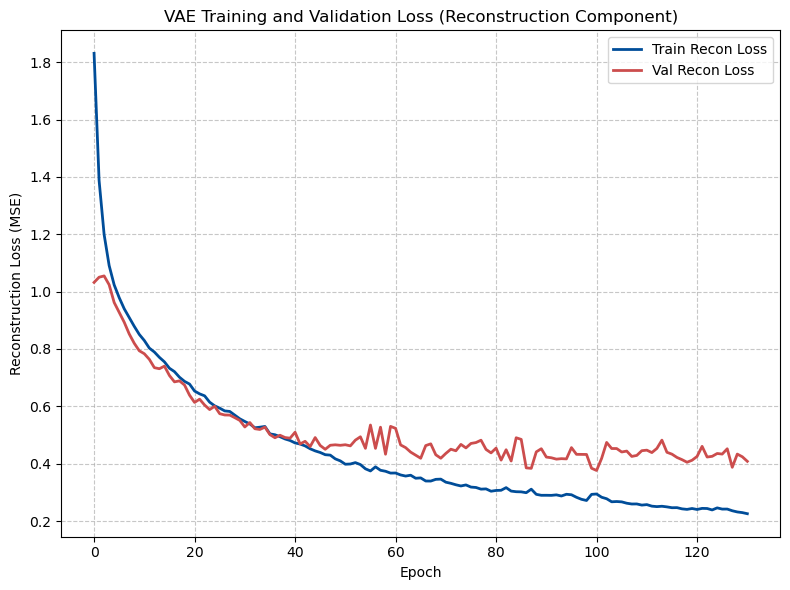

--- Evaluating VAE on Test Set ---
 1/43 ━━━━━━━━━━━━━━━━━━━━ 1:02 1s/step

2025-05-14 17:41:17.225242: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_211', 12 bytes spill stores, 12 bytes spill loads

2025-05-14 17:41:17.347742: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_211', 132 bytes spill stores, 132 bytes spill loads

2025-05-14 17:41:17.433651: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_211', 164 bytes spill stores, 168 bytes spill loads



43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step
Inverse transforming predictions...
Columns in Y_test_original: ['ParenteralAminoAcids(g)', 'Acetate(mEq)', 'Calcium(mEq)', 'Chloride(mEq)', 'Chromium(mcg)', 'Copper(mg)', 'Dextrose(g)', 'Famotidine(mg)', 'FolicAcid(mg)', 'Heparin(units)', 'Insulin(units)', 'Levocarnitine(mg)', 'Magnesium(mEq)', 'Manganese(mg)', 'Multivitamins(units)', 'Phosphate(mmol)', 'Potassium(mEq)', 'Selenium(mcg)', 'Sodium(mEq)', 'Thiamine(mg)', 'Pyridoxine(mg)', 'AscorbicAcid(VitaminC)(mg)', 'Phytonadione(mg)', 'Zinc(mg)', 'lipids(g)']
Names used for evaluation loop: ['ParenteralAminoAcids(g)', 'Acetate(mEq)', 'Calcium(mEq)', 'Chloride(mEq)', 'Chromium(mcg)', 'Copper(mg)', 'Dextrose(g)', 'Famotidine(mg)', 'FolicAcid(mg)', 'Heparin(units)', 'Insulin(units)', 'Levocarnitine(mg)', 'Magnesium(mEq)', 'Manganese(mg)', 'Multivitamins(units)', 'Phosphate(mmol)', 'Potassium(mEq)', 'Selenium(mcg)', 'Sodium(mEq)', 'Thiamine(mg)', 'Pyridoxine(mg)', 'AscorbicAcid(VitaminC)(mg)', 'Phyt

Evaluating targets: 100%|██████████| 25/25 [00:00<00:00, 1114.53it/s]

Plotting VAE Pearson R Scores...


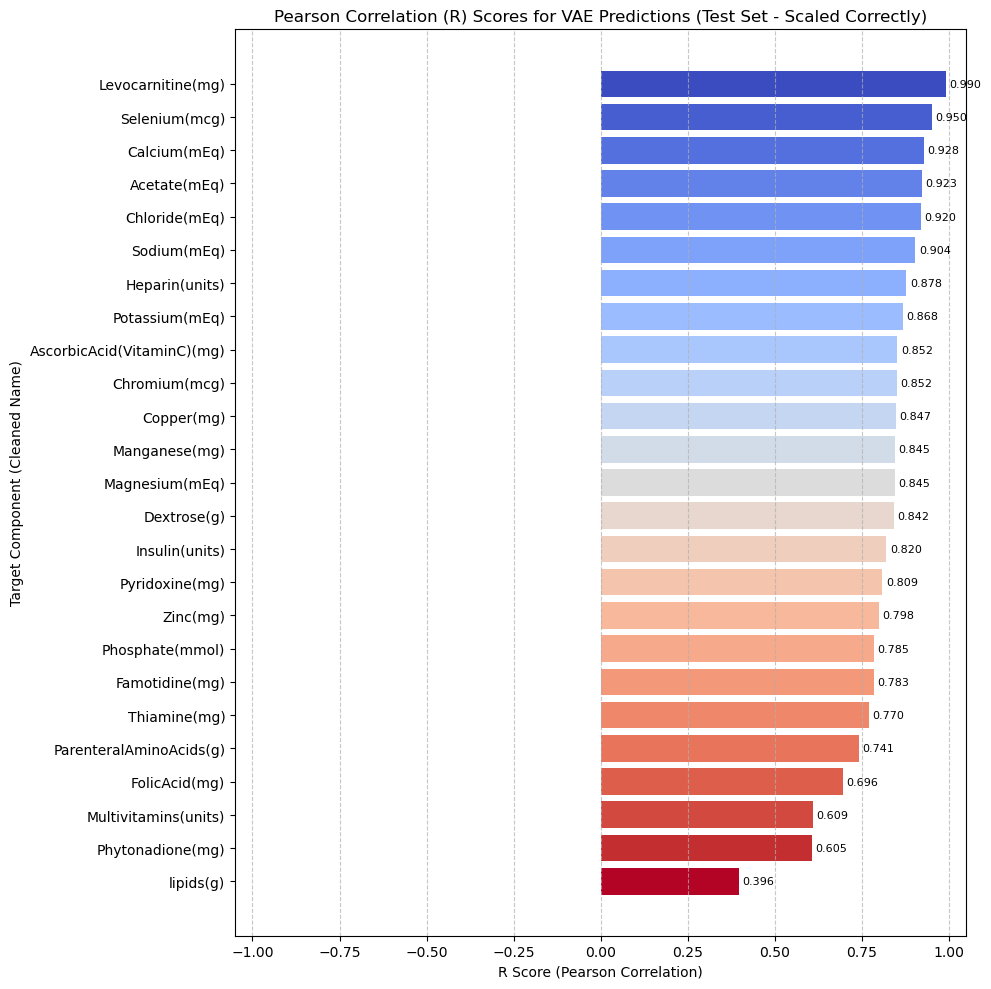

Plotting VAE RMSE Scores...


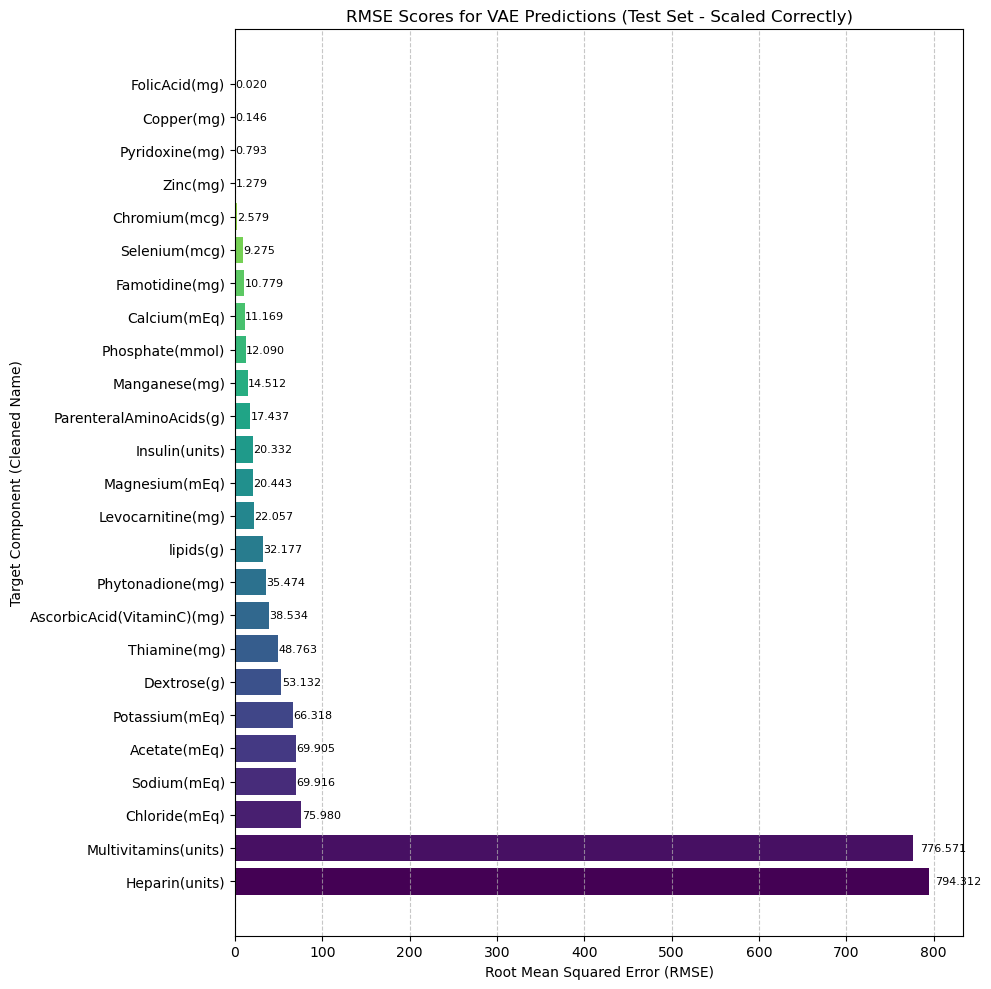


Script finished (scaling corrected, KL loss layer added).


In [1]:
import os
# Force TensorFlow to use only GPU 0 (adjust if needed)
os.environ["CUDA_VISIBLE_DEVICES"] =  "0"
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0" # Disable oneDNN if causing issues

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Keep seaborn if used for other plots

# Import necessary Keras layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Lambda, Layer, BatchNormalization # Import Layer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from scipy.stats import pearsonr
# Removed unused imports

# ------------------------------------------------------
# 1. GPU Configuration (Same as before)
# ------------------------------------------------------
gpus = tf.config.list_physical_devices("GPU")
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
        print(f"Using GPU: {gpus[0]} with memory growth enabled.")
    except RuntimeError as e:
        print("Error during GPU configuration:", e)
else:
    print("No GPU detected. Running on CPU.")


# ------------------------------------------------------
# 2. Data Preparation (Same as before)
# ------------------------------------------------------
print("--- Loading and Preparing Data ---")
data_file = '/remote/home/ariss01/TPN/cohort_tpn_data_original_cleaned__decomposed_pivoted_with_Volume_lipids_corrected_measurement_v3_motor_embeddings_FIXED_Final.csv'
df = pd.read_csv(data_file, low_memory=True)
df.drop(columns=['order_med_id'], errors='ignore', inplace=True)
df['order_inst'] = pd.to_datetime(df['order_inst'], errors='coerce')
df.dropna(subset=['order_inst'], inplace=True)
print(f"Shape after initial cleaning: {df.shape}")
# --- Define Columns (Same as before) ---
expected_feature_cols = [
    "25-Hydroxyvitamin D3+25-Hydroxyvitamin D2 [Mass/volume] in Serum or Plasma",
    "25-hydroxyvitamin D3 [Mass/volume] in Serum or Plasma",
    "Alanine aminotransferase [Enzymatic activity/volume] in Serum or Plasma",
    "Albumin [Mass/volume] in Serum or Plasma",
    "Alkaline phosphatase [Enzymatic activity/volume] in Serum or Plasma",
    "Amylase [Enzymatic activity/volume] in Serum or Plasma",
    "Anion gap in Serum or Plasma",
    "Aspartate aminotransferase [Enzymatic activity/volume] in Serum or Plasma",
    "Base excess in Blood by calculation",
    "Bicarbonate [Moles/volume] in Specimen",
    "Bicarbonate measurement",
    "Bilirubin.direct [Mass/volume] in Serum or Plasma",
    "Bilirubin.indirect [Mass/volume] in Serum or Plasma",
    "Bilirubin.total [Mass/volume] in Serum or Plasma",
    "Blood potassium measurement",
    "Body height",
    "Body mass index (BMI) [Ratio]",
    "Body surface area",
    "Body temperature",
    "Body weight",
    "Calciferol (Vit D2) [Mass/volume] in Serum or Plasma",
    "Calcium [Mass/volume] in Serum or Plasma",
    "Calcium.ionized [Mass/volume] in Serum or Plasma",
    "Calcium.ionized [Moles/volume] in Serum or Plasma",
    "Carbon dioxide [Partial pressure] adjusted to patient's actual temperature in Blood",
    "Carbon dioxide [Partial pressure] in Venous blood",
    "Carbon dioxide, total [Moles/volume] in Serum or Plasma",
    "Central venous pressure (CVP)",
    "Chloride [Moles/volume] in Serum or Plasma",
    "Chloride measurement, blood",
    "Cholesterol [Mass/volume] in Serum or Plasma",
    "Cholesterol in HDL [Mass/volume] in Serum or Plasma",
    "Cholesterol.total/Cholesterol in HDL [Mass Ratio] in Serum or Plasma",
    "Cobalamin (Vitamin B12) [Mass/volume] in Serum or Plasma",
    "Creatine kinase [Enzymatic activity/volume] in Serum or Plasma",
    "Creatinine [Mass/volume] in Serum or Plasma",
    "D-dimer assay",
    "Diastolic blood pressure",
    "Ferritin [Mass/volume] in Serum or Plasma",
    "Fibrin D-dimer FEU [Mass/volume] in Platelet poor plasma",
    "Fibrinogen [Mass/volume] in Platelet poor plasma by Coagulation assay",
    "Glasgow coma scale",
    "Glomerular filtration rate/1.73 sq M.predicted [Volume Rate/Area] in Serum, Plasma or Blood by Creatinine-based formula (CKD-EPI)",
    "Glomerular filtration rate/1.73 sq M.predicted [Volume Rate/Area] in Serum, Plasma or Blood by Creatinine-based formula (MDRD)",
    "Glomerular filtration rate/1.73 sq M.predicted among blacks [Volume Rate/Area] in Serum, Plasma or Blood by Creatinine-based formula (CKD-EPI)",
    "Glucometer blood glucose",
    "Glucose [Mass/volume] in Blood",
    "Glucose [Mass/volume] in Serum or Plasma",
    "Glucose measurement, blood",
    "Heart rate",
    "INR in Platelet poor plasma by Coagulation assay",
    "Input/Output",
    "Lactate [Moles/volume] in Blood",
    "Lactate dehydrogenase [Enzymatic activity/volume] in Serum or Plasma by Lactate to pyruvate reaction",
    "Lactic acid measurement",
    "Left ventricular Ejection fraction",
    "Magnesium [Mass/volume] in Serum or Plasma",
    "Mean blood pressure",
    "Measurement of partial pressure of carbon dioxide in blood",
    "Measurement of venous partial pressure of carbon dioxide",
    "Phosphate [Mass/volume] in Serum or Plasma",
    "Potassium [Moles/volume] in Serum or Plasma",
    "Protein [Mass/volume] in Serum or Plasma",
    "Prothrombin time (PT)",
    "Pulse rate",
    "Respiratory rate",
    "Sodium [Moles/volume] in Blood",
    "Sodium [Moles/volume] in Serum or Plasma",
    "Sodium/Creatinine [Ratio] in Urine",
    "Systolic blood pressure",
    "Thrombin time",
    "Thyrotropin [Units/volume] in Serum or Plasma",
    "Thyroxine (T4) free [Mass/volume] in Serum or Plasma",
    "Triglyceride [Moles/volume] in Serum or Plasma",
    "Urate [Mass/volume] in Serum or Plasma",
    "Urea nitrogen [Mass/volume] in Serum or Plasma",
    "Venous oxygen saturation measurement",
    "Volume expired",
    "aPTT in Platelet poor plasma by Coagulation assay",
    "aPTT.inhibitor sensitive in Platelet poor plasma by Coagulation assay",
    "gender_FEMALE","gender_MALE","race_American Indian or Alaska Native |","race_Asian |","race_Asian | Asian","race_Asian | Other","race_Asian | Unknown","race_Asian | White","race_Black or African American |","race_Black or African American | Black or African American","race_Black or African American | Declines to State","race_Black or African American | Unknown","race_Black or African American | White","race_Declines to State |","race_Declines to State | Other","race_Declines to State | White","race_Native Hawaiian or Other Pacific Islander |","race_Native Hawaiian or Other Pacific Islander | Asian","race_Native Hawaiian or Other Pacific Islander | Black or African American","race_Native Hawaiian or Other Pacific Islander | Native Hawaiian or Other Pacific Islander","race_Native Hawaiian or Other Pacific Islander | Other","race_Native Hawaiian or Other Pacific Islander | Unknown","race_Other |","race_Other | American Indian or Alaska Native","race_Other | Asian","race_Other | Declines to State","race_Other | Other","race_Other | Unknown","race_Other | White","race_Unknown |","race_Unknown | Declines to State","race_Unknown | Other","race_Unknown | Unknown","race_Unknown | White","race_White |","race_White | Asian","race_White | Black or African American","race_White | Declines to State","race_White | Other","race_White | Unknown","race_White | White","race_|","race_| Asian","race_| Declines to State","race_| Other","race_| Unknown","race_| White","age"
] + [f"embedding_{i}" for i in range(768)]

target_cols = ['Parenteral Amino Acids (g)', 'Acetate (mEq)', 'Calcium (mEq)', 'Chloride (mEq)', 'Chromium (mcg)', 'Copper (mg)',
               'Dextrose (g)', 'Famotidine (mg)', 'Folic Acid (mg)', 'Heparin (units)', 'Insulin (units)', 'Levocarnitine (mg)',
               'Magnesium (mEq)', 'Manganese (mg)', 'Multivitamins (units)', 'Phosphate (mmol)', 'Potassium (mEq)',
               'Selenium (mcg)', 'Sodium (mEq)', 'Thiamine (mg)', 'Pyridoxine (mg)', 'Ascorbic Acid (Vitamin C) (mg)',
               'Phytonadione (mg)', 'Zinc (mg)', 'lipids(g)']

available_targets = [t for t in target_cols if t in df.columns]
if not available_targets: raise ValueError("No target columns found!")
meta_cols = ['person_id', 'order_inst']
feature_cols = [col for col in expected_feature_cols if col in df.columns]
missing_features = [col for col in expected_feature_cols if col not in df.columns]
if missing_features: print(f"Warning: Missing features: {missing_features}")
if not feature_cols: raise ValueError("No feature columns found!")
print(f"Selected features: {len(feature_cols)}, Available targets: {len(available_targets)}")

# --- Impute Missing Values in Features with Mean ---
# --- Convert features and targets to numeric ---
print("Converting features and targets to numeric...")
for col in feature_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
for col in available_targets:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# --- Separate Data Components without imputation ---
meta = df[meta_cols].copy()
X = df[feature_cols].copy()
Y = df[available_targets].copy()

# --- Clean Column Names ---
original_feature_names = X.columns.tolist()
original_target_names = Y.columns.tolist()
X.columns = X.columns.str.replace(r'[\[\]<>/,\s-]', '', regex=True)
Y.columns = Y.columns.str.replace(r'[\[\]<>/,\s-]', '', regex=True)
cleaned_feature_names = X.columns.tolist()
cleaned_target_names = Y.columns.tolist()
print("Cleaned column names.")
print(f"Initial Feature matrix shape: {X.shape} | Initial Target matrix shape: {Y.shape}")


# ------------------------------------------------------
# 3. Train-Test Split (Performed BEFORE Scaling) (Same as before)
# ------------------------------------------------------
print("--- Performing Train-Test Split ---")
X_train, X_test, Y_train, Y_test, meta_train, meta_test = train_test_split(
    X, Y, meta, test_size=0.2, random_state=42, shuffle=True
)

# --- Impute Missing Values in Features with Mean ONLY from training data ---
print("Filling NaN values in features with training column means...")
feature_means = {}
for col in X_train.columns:
    col_mean = X_train[col].mean()
    # If mean is NaN (all values are NaN), use 0 instead
    feature_means[col] = 0 if pd.isna(col_mean) else col_mean
    # Apply the mean from TRAINING data to both train and test
    X_train[col].fillna(feature_means[col], inplace=True)
    X_test[col].fillna(feature_means[col], inplace=True)

# --- Fill NaN values in targets with 0 ---
print("Filling NaN values in targets with 0...")
for col in Y_train.columns:
    Y_train[col].fillna(0, inplace=True)
    Y_test[col].fillna(0, inplace=True)

meta_train = meta_train.reset_index(drop=True)
meta_test = meta_test.reset_index(drop=True)
print(f"Train shapes: X={X_train.shape}, Y={Y_train.shape}")
print(f"Test shapes: X={X_test.shape}, Y={Y_test.shape}")
Y_test_original = Y_test.copy()


# ------------------------------------------------------
# 4. Scaling Features and Targets (Fit ONLY on Train, Transform Train & Test) (Same as before)
# ------------------------------------------------------
print("--- Scaling Data ---")
scaler_X = StandardScaler()
scaler_Y = StandardScaler()
print("Fitting scaler_X on X_train...")
scaler_X.fit(X_train)
print("Fitting scaler_Y on Y_train...")
scaler_Y.fit(Y_train)
print("Transforming X_train and X_test...")
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
print("Transforming Y_train...")
Y_train_scaled = scaler_Y.transform(Y_train)
print("Scaling complete.")
print(f"Scaled shapes: X_train={X_train_scaled.shape}, X_test={X_test_scaled.shape}")
print(f"Scaled shapes: Y_train={Y_train_scaled.shape}")


# ------------------------------------------------------
# 5. Build and Train VAE (Use SCALED data, include KL Loss via Custom Layer)
# ------------------------------------------------------
print("--- Building VAE Model ---")
# Ensure input_dim, latent_dim, output_dim are defined from previous steps
input_dim = X_train_scaled.shape[1]
latent_dim = 16  # adjustable
output_dim = Y_train_scaled.shape[1]

# --- Sampling function (Same as before) ---
def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.random.normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# --- VAE Reconstruction Loss (Same as before) ---
def reconstruction_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred), axis=-1)

# --- CORRECTED: Custom Layer to Calculate and Add KL Loss ---
class KLLossLayer(Layer):
    """
    Identity transform layer that adds KL divergence loss
    based on the inputs passed to it (z_mean, z_log_var).
    """
    def __init__(self, kl_weight=0.1, **kwargs):
        super(KLLossLayer, self).__init__(**kwargs)
        # Ensure kl_weight is float32 for tf operations
        self.kl_weight = tf.cast(kl_weight, dtype=tf.float32)

    def call(self, inputs):
        z_mean, z_log_var = inputs # Expects a list/tuple of [z_mean, z_log_var]
        # Calculate KL divergence loss (per sample)
        kl_batch = -0.5 * tf.reduce_sum(
            1.0 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=-1
        )
        # Add the KL loss (averaged over batch) to the model
        # REMOVED the incorrect 'inputs=inputs' argument
        self.add_loss(self.kl_weight * tf.reduce_mean(kl_batch))
        # Pass inputs through (identity function) - needed for Functional API graph
        return inputs

# --- Build Model using Functional API with Corrected KL Layer ---
# Encoder definition
# --- Build a larger, more complex VAE model ---
# Encoder definition with more capacity
inputs = Input(shape=(input_dim,), name='encoder_input')
# Add batch normalization at input
h = BatchNormalization()(inputs)
# Wider network
h = Dense(2048, activation='relu')(h)
h = BatchNormalization()(h)
h = Dropout(0.3)(h)
h = Dense(1024, activation='relu')(h)
h = BatchNormalization()(h)
h = Dropout(0.3)(h)
h = Dense(512, activation='relu')(h)
h = BatchNormalization()(h)
h = Dropout(0.3)(h)
h = Dense(256, activation='relu')(h)
h = BatchNormalization()(h)
# Smaller bottleneck to prevent information leakage
h = Dense(128, activation='relu')(h)
h = Dense(64, activation='relu')(h)
# Latent space
z_mean = Dense(latent_dim, name='z_mean')(h)
z_log_var = Dense(latent_dim, name='z_log_var')(h)

# Add KL Loss with a much smaller weight
processed_latent_vars = KLLossLayer(kl_weight=0.0001)([z_mean, z_log_var])
z = Lambda(sampling, name='z')(processed_latent_vars)

# Decoder definition with matching capacity
decoder_input_layer = Input(shape=(latent_dim,), name='z_sampling')
d = Dense(64, activation='relu')(decoder_input_layer)
d = BatchNormalization()(d) 
d = Dense(128, activation='relu')(d)
d = BatchNormalization()(d)
d = Dense(256, activation='relu')(d)
d = BatchNormalization()(d)
d = Dense(512, activation='relu')(d)
d = BatchNormalization()(d)
d = Dense(1024, activation='relu')(d)
d = BatchNormalization()(d)
d = Dense(2048, activation='relu')(d)
d = BatchNormalization()(d)
# Final output layer
decoder_outputs = Dense(output_dim, activation='linear')(d)

# Instantiate decoder model
decoder = Model(decoder_input_layer, decoder_outputs, name='decoder')

# VAE model
vae_outputs = decoder(z)
vae = Model(inputs, vae_outputs, name='vae_model_with_kl_layer')

# Compile with a lower learning rate for the larger model
vae.compile(optimizer=Adam(learning_rate=0.00005), loss=reconstruction_loss)

print("VAE Model Summary (with KL Layer):")
vae.summary()

# ---------------- Train the VAE (Same as before) ----------------
print("--- Training VAE ---")
early_stop = EarlyStopping(monitor='val_loss', patience=30,
                           restore_best_weights=True, mode='min')

history = vae.fit(
    X_train_scaled, Y_train_scaled, # Use scaled training data
    validation_split=0.2,
    epochs=1000,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)


# Plot training curves
print("--- Plotting Training Curves ---")
plt.figure(figsize=(8,6))
# history.history['loss'] tracks the compiled loss (reconstruction loss)
plt.plot(history.history['loss'], label='Train Recon Loss', color=(0.0, 0.3, 0.6, 1.0), linewidth=2)
plt.plot(history.history['val_loss'], label='Val Recon Loss', color=(0.8, 0.3, 0.3, 1.0), linewidth=2)
# Note: The KL loss added via the layer is included in optimization but not separately tracked in history dict
plt.xlabel("Epoch")
plt.ylabel("Reconstruction Loss (MSE)")
plt.title("VAE Training and Validation Loss (Reconstruction Component)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ------------------------------------------------------
# 6. Evaluate Direct VAE Predictions on Test Set (Same as before)
# ------------------------------------------------------
print("--- Evaluating VAE on Test Set ---")
Y_pred_scaled = vae.predict(X_test_scaled, batch_size=128)
print("Inverse transforming predictions...")
Y_pred = scaler_Y.inverse_transform(Y_pred_scaled)

r_scores = {}
rmse_scores = {}
eval_target_names = cleaned_target_names # Use cleaned names

print(f"Columns in Y_test_original: {Y_test_original.columns.tolist()}")
print(f"Names used for evaluation loop: {eval_target_names}")
if len(eval_target_names) != Y_test_original.shape[1]:
     print(f"ERROR: Mismatch between evaluation names ({len(eval_target_names)}) and Y_test_original columns ({Y_test_original.shape[1]})")
     eval_target_names = [f"Target_{i}" for i in range(Y_test_original.shape[1])]

for i, col_name in enumerate(tqdm(eval_target_names, desc="Evaluating targets")):
    actual_col = Y_test_original.iloc[:, i].values
    pred_col = Y_pred[:, i]
    if len(actual_col) > 1 and np.std(actual_col) > 1e-9 :
        try:
            r_val, _ = pearsonr(actual_col, pred_col)
            r_scores[col_name] = r_val if not np.isnan(r_val) else 0.0
            rmse_val = np.sqrt(mean_squared_error(actual_col, pred_col))
            rmse_scores[col_name] = rmse_val
        except ValueError as e:
             print(f"Error calculating metrics for {col_name}: {e}")
             r_scores[col_name] = 0.0; rmse_scores[col_name] = np.inf
    else:
        r_scores[col_name] = 0.0; rmse_scores[col_name] = np.inf

# --- Plotting Pearson R (Same as before) ---
if r_scores:
    print("Plotting VAE Pearson R Scores...")
    sorted_cols = sorted(r_scores.keys(), key=lambda k: r_scores[k], reverse=True)
    sorted_scores = [r_scores[col] for col in sorted_cols]
    coolwarm_colors = plt.cm.coolwarm(np.linspace(0, 1, len(sorted_cols)))
    plt.figure(figsize=(10, max(8, len(sorted_cols)*0.4)))
    barh = plt.barh(sorted_cols, sorted_scores, color=coolwarm_colors)
    plt.xlabel("R Score (Pearson Correlation)")
    plt.ylabel("Target Component (Cleaned Name)")
    plt.title("Pearson Correlation (R) Scores for VAE Predictions (Test Set - Scaled Correctly)")
    for i, b in enumerate(barh):
        w = b.get_width(); plt.text(w + 0.01 * np.sign(w) if w != 0 else 0.01, b.get_y() + b.get_height() / 2, f"{w:.3f}", va="center", ha='left' if w >= 0 else 'right', fontsize=8)
    plt.xlim(-1.05, 1.05); plt.grid(True, axis='x', linestyle='--', alpha=0.7); plt.gca().invert_yaxis(); plt.tight_layout(); plt.show()
else:
    print("No R scores calculated for VAE.")

# --- Plotting RMSE (Same as before) ---
if rmse_scores:
    print("Plotting VAE RMSE Scores...")
    sorted_cols_rmse = sorted(rmse_scores.keys(), key=lambda k: rmse_scores[k], reverse=False)
    sorted_scores_rmse = [rmse_scores[col] for col in sorted_cols_rmse]
    rmse_colors = plt.cm.viridis_r(np.linspace(0, 1, len(sorted_cols_rmse)))
    plt.figure(figsize=(10, max(8, len(sorted_cols_rmse)*0.4)))
    barh_rmse = plt.barh(sorted_cols_rmse, sorted_scores_rmse, color=rmse_colors)
    plt.xlabel("Root Mean Squared Error (RMSE)")
    plt.ylabel("Target Component (Cleaned Name)")
    plt.title("RMSE Scores for VAE Predictions (Test Set - Scaled Correctly)")
    for i, b in enumerate(barh_rmse):
        w = b.get_width(); plt.text(w * 1.01 if w > 0 else 0.01 , b.get_y() + b.get_height() / 2, f"{w:.3f}", va="center", ha='left', fontsize=8)
    plt.grid(True, axis='x', linestyle='--', alpha=0.7); plt.gca().invert_yaxis(); plt.tight_layout(); plt.show()
else:
    print("No RMSE scores calculated for VAE.")

print("\nScript finished (scaling corrected, KL loss layer added).")



Generating latent representations using SCALED data...


2025-05-14 17:41:27.289371: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_147', 4 bytes spill stores, 4 bytes spill loads

2025-05-14 17:41:27.345229: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_147', 12 bytes spill stores, 12 bytes spill loads



687/687 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step
124/172 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step

2025-05-14 17:41:33.150107: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_131', 4 bytes spill stores, 4 bytes spill loads

2025-05-14 17:41:33.173189: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_131', 12 bytes spill stores, 12 bytes spill loads



172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
Generated latent_train shape: (21956, 16)
Generated latent_test shape: (5490, 16)

===== PART A: K=100 Iterative Merging with K=30 Target =====

Performing initial KMeans clustering with 100 clusters...
Initial average correlation: 0.7442, RMSE: 720.1159
Will merge clusters until reaching 1 clusters
No correlation threshold applied - will merge until K=1
Current number of clusters: 100
Evaluating 100 merge candidates...
Merged clusters 12 and 52: combined score improved by 0.0144
New correlation: 0.7586, RMSE: 713.8436, clusters=99
Current number of clusters: 99
Evaluating 100 merge candidates...
Merged clusters 61 and 81: combined score improved by 0.0001
New correlation: 0.7587, RMSE: 713.8430, clusters=98
Current number of clusters: 98
Evaluating 100 merge candidates...
Merged clusters 36 and 91: combined score improved by 0.0001
New correlation: 0.7588, RMSE: 713.8425, clusters=97
Current number of clusters: 97
Evaluating 100 merge candidat

/tmp/ipykernel_542469/3280435027.py:637: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(bbox_to_anchor=(1.05,1), loc="upper left", fontsize=10)


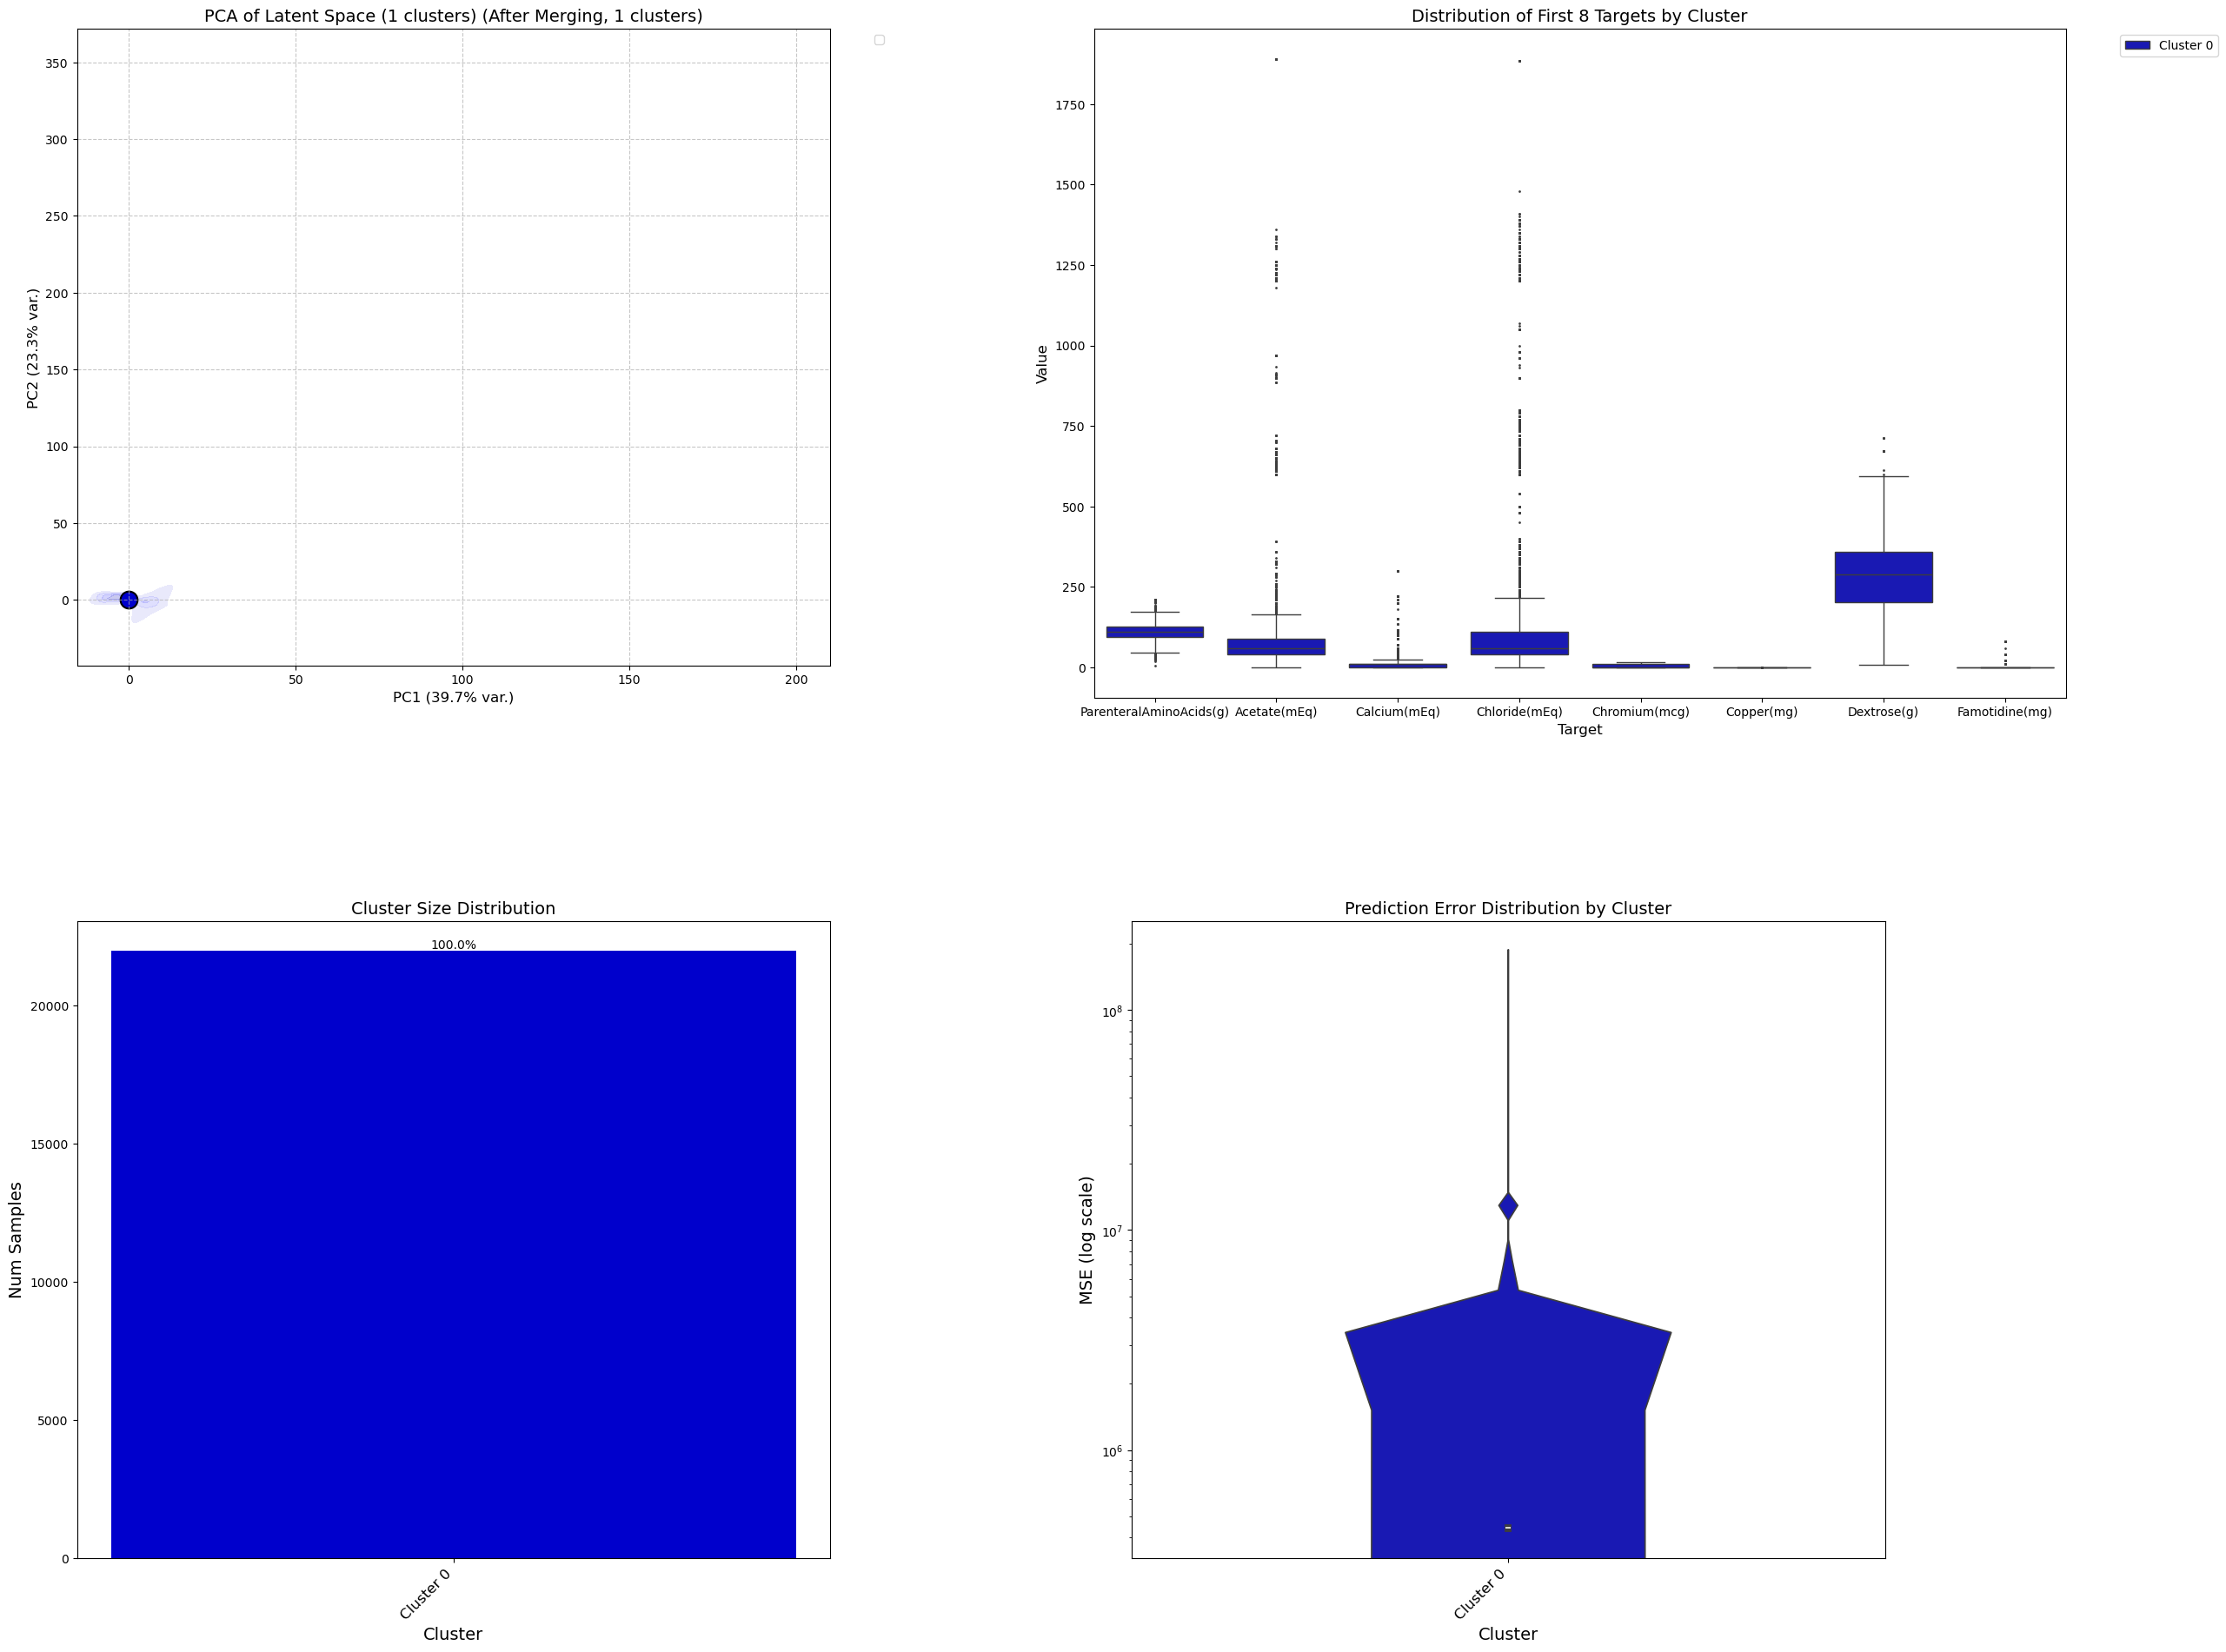

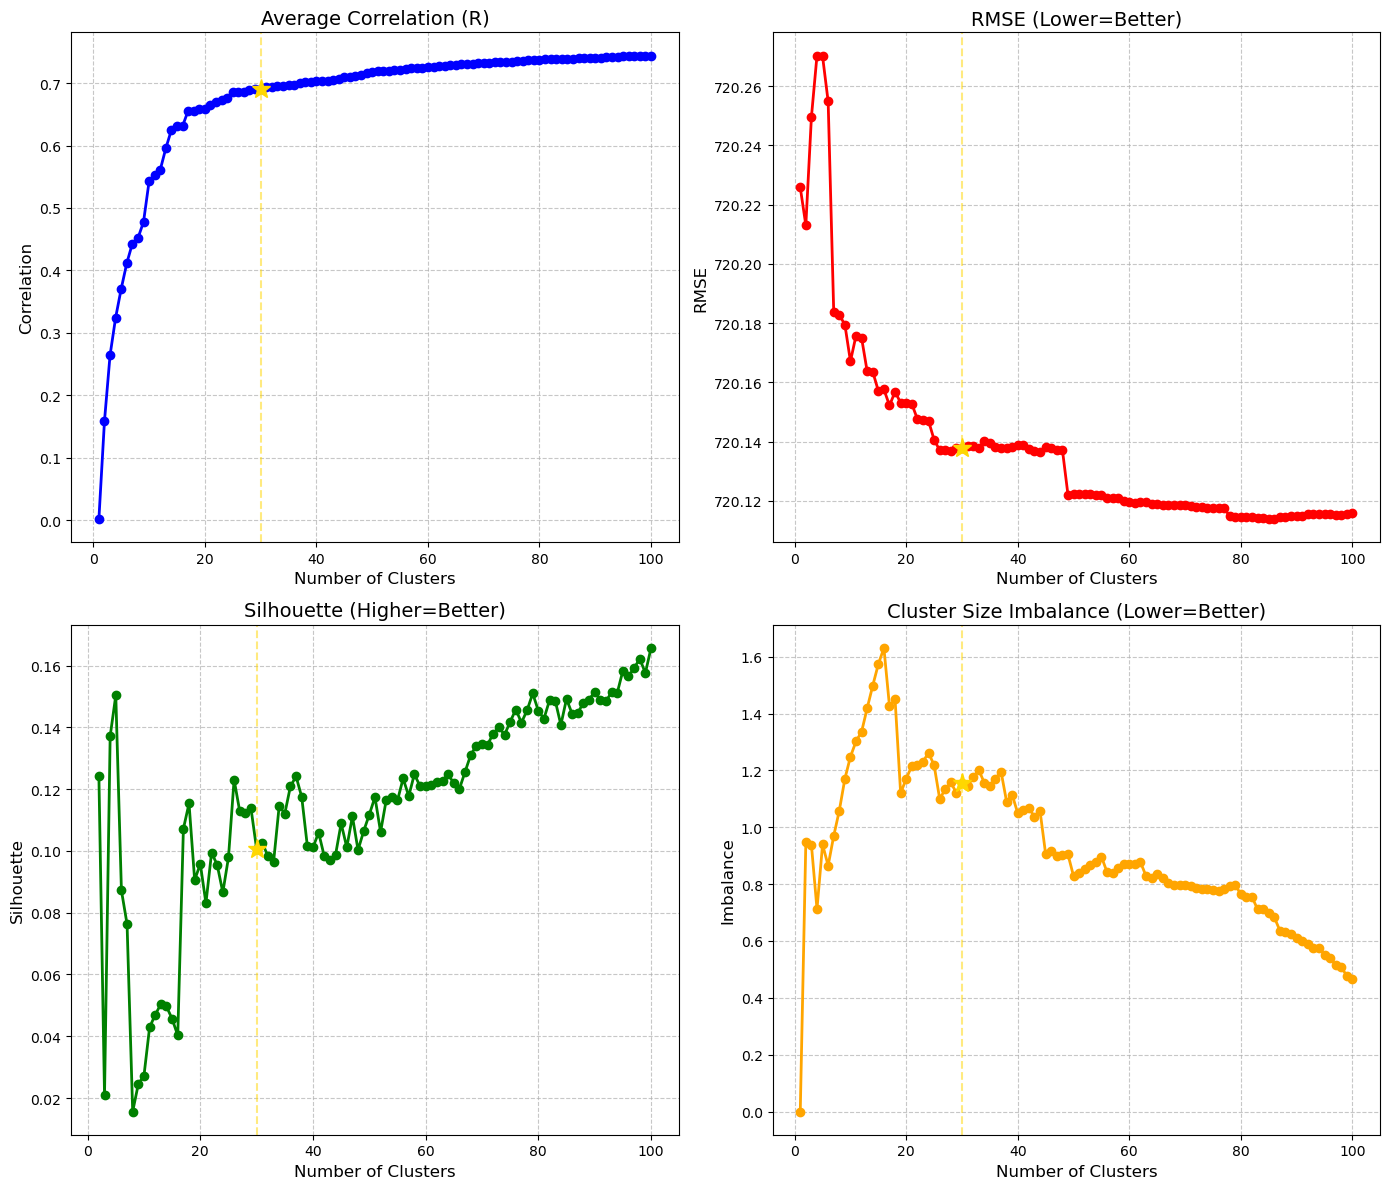


===== PART B: Direct Comparison at K=30 =====


===== Comparing Clustering Approaches at K=30 =====

Semi-supervised approach (K=30):
  Training correlation: 0.6909
  Training RMSE: 720.1379
  Test average R: 0.6770
  Test average RMSE: 265.0582

Running standard K-means with K=30...
Unsupervised approach (K=30):
  Training correlation: 0.5930
  Training RMSE: 720.1266
  Test average R: 0.5839
  Test average RMSE: 265.0880

Comparison (Semi-supervised vs. Unsupervised):
  Test R difference: 0.0931
  Test RMSE difference: 0.0298


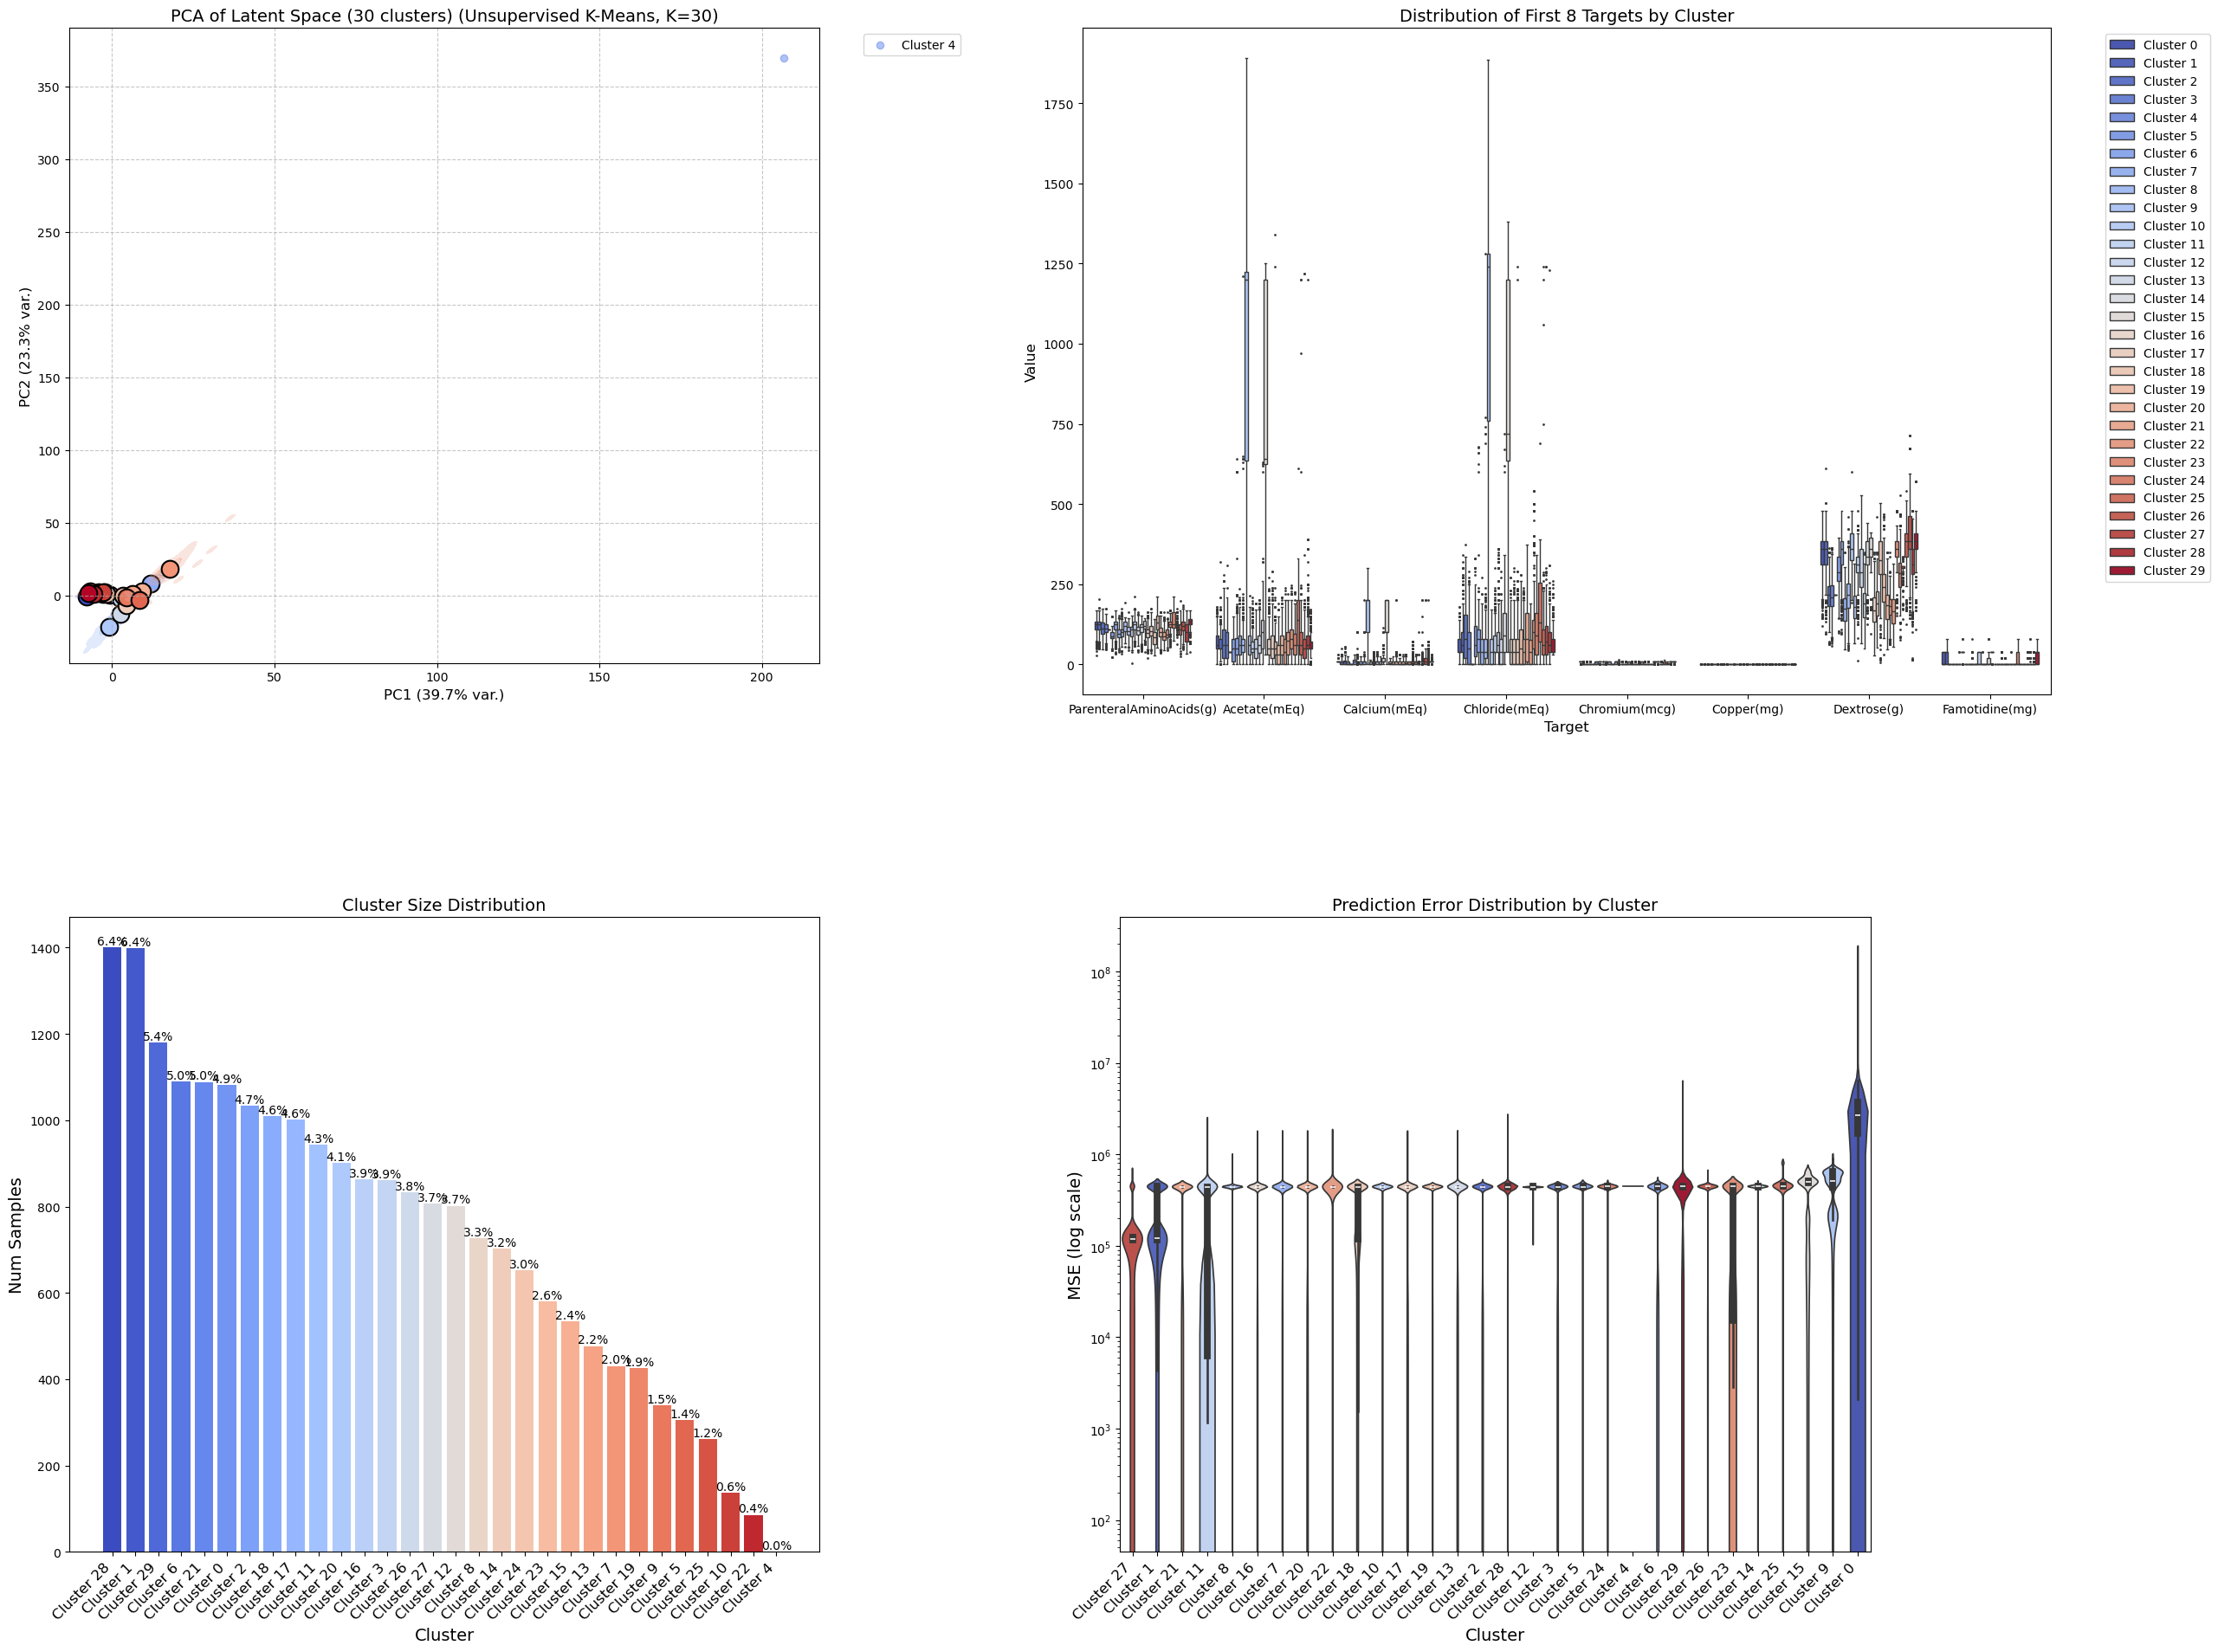

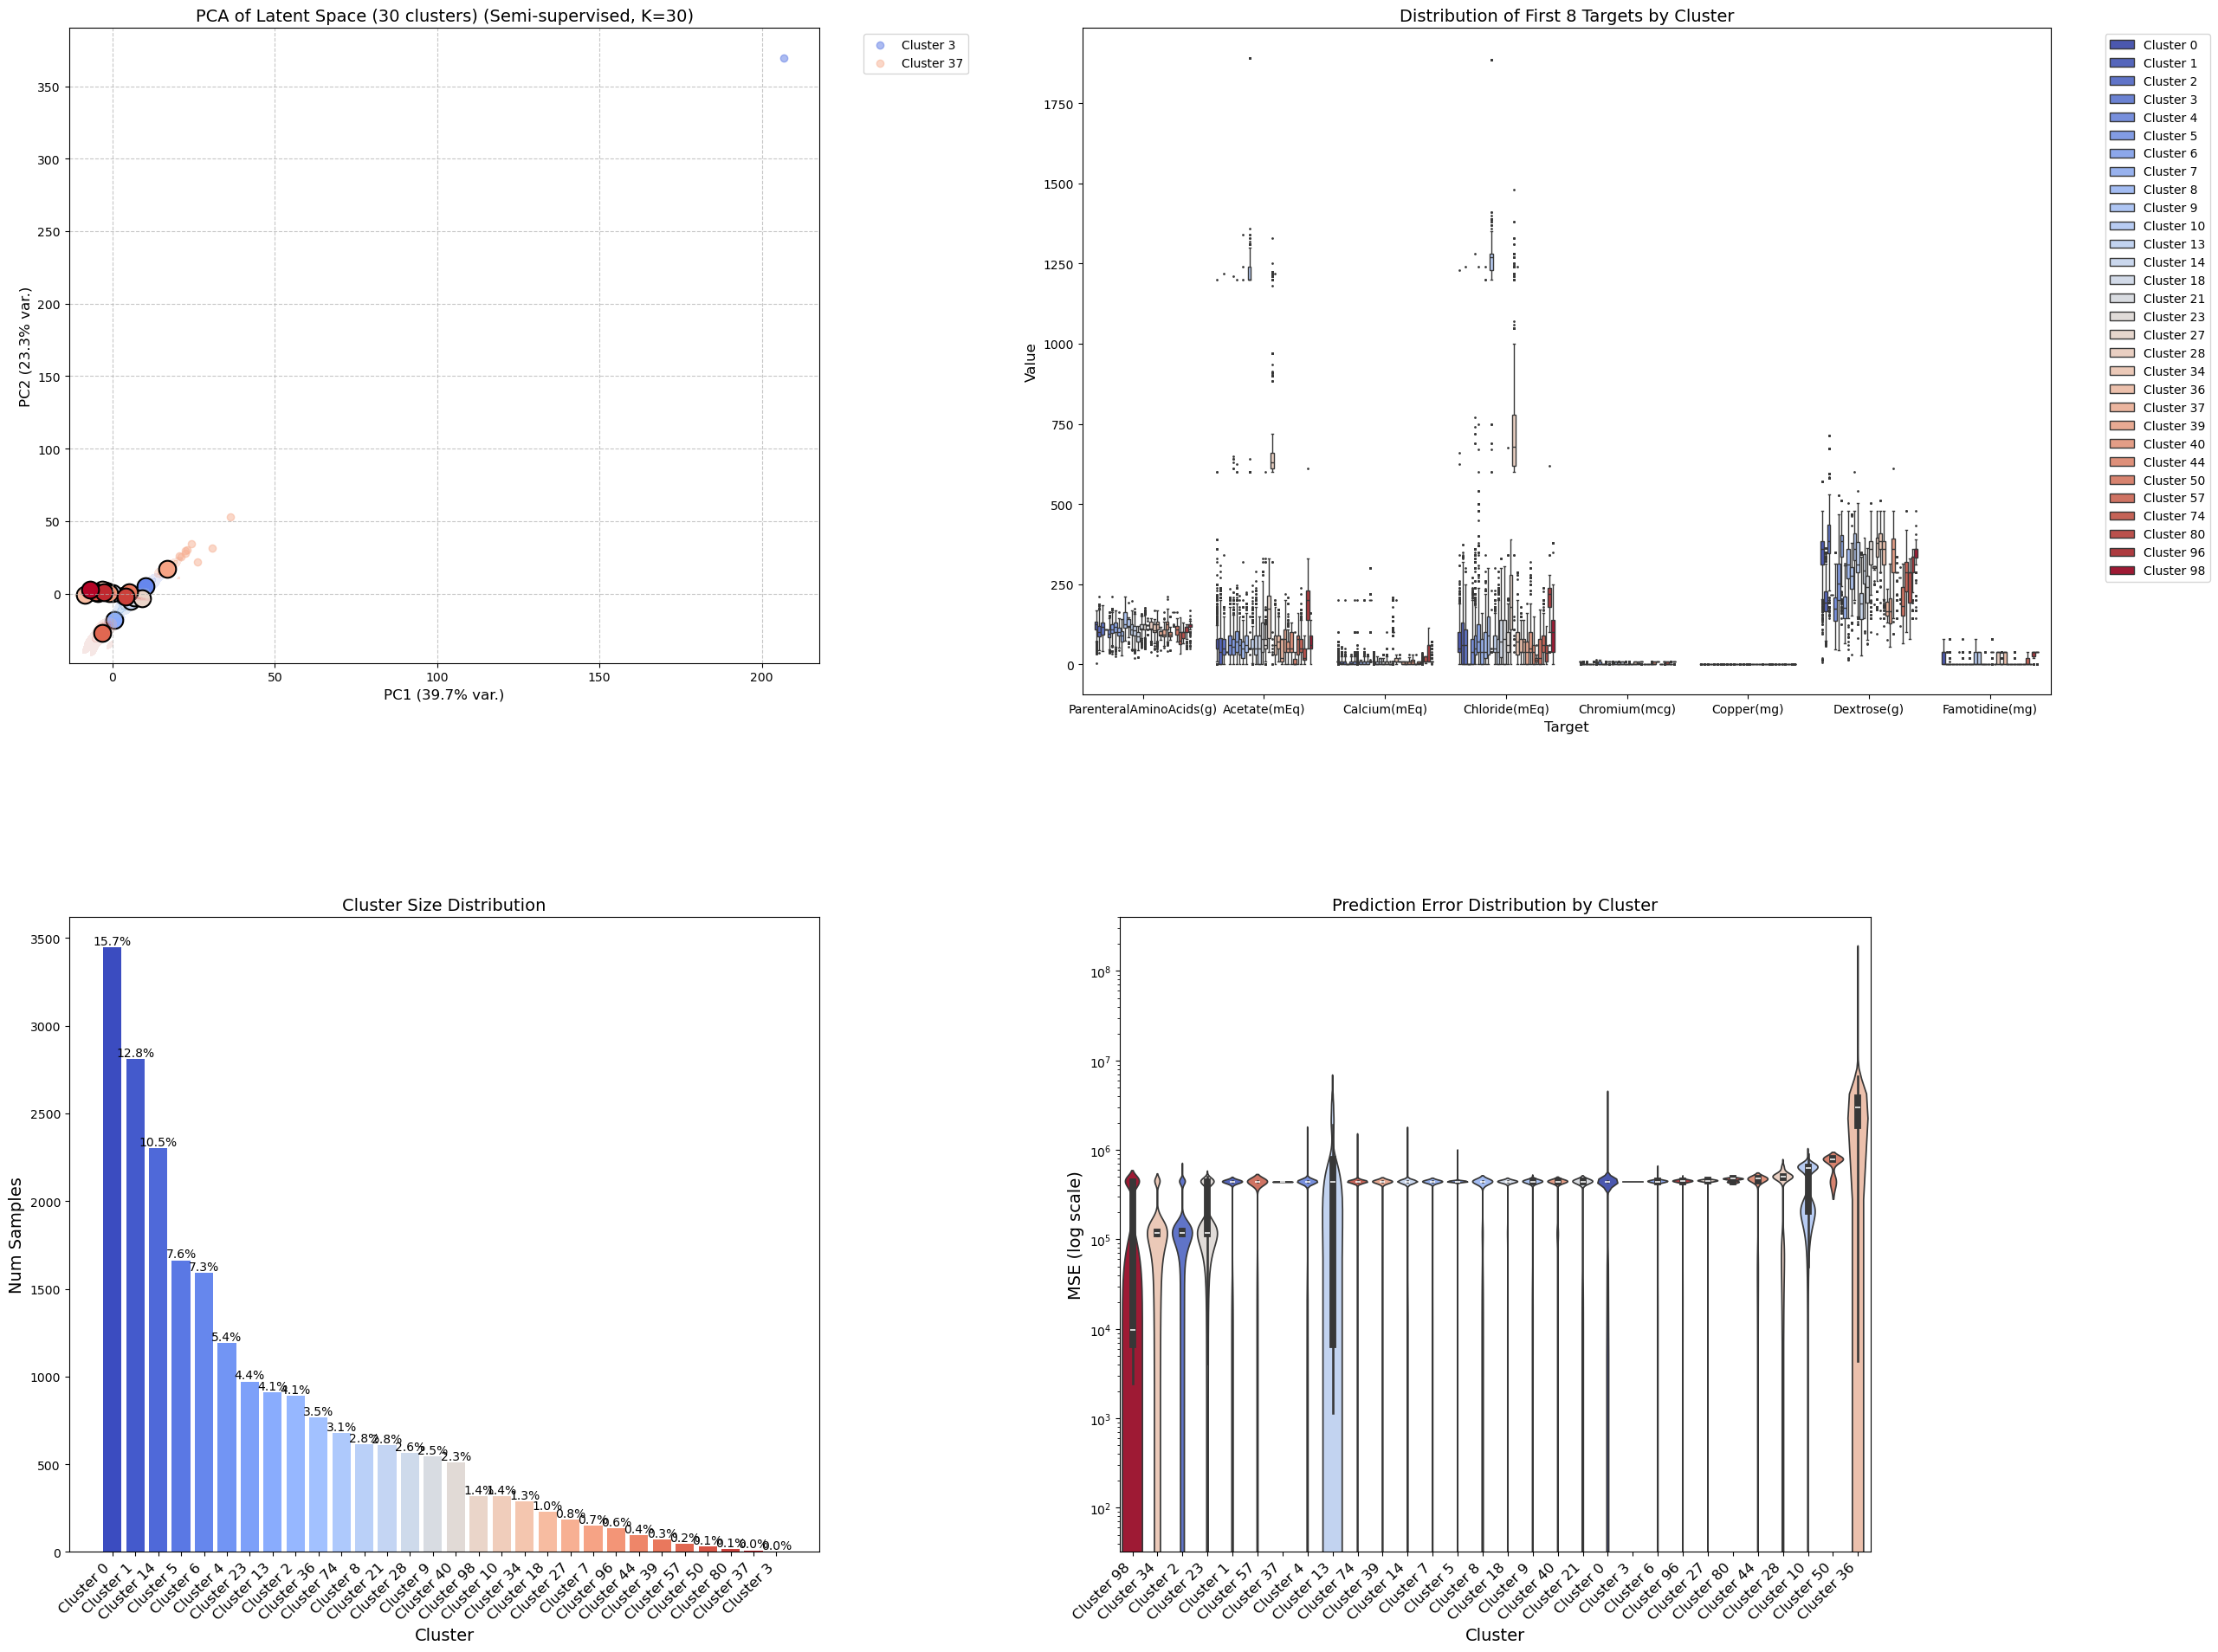


===== PART C: Detailed Visualization of K=30 Results =====



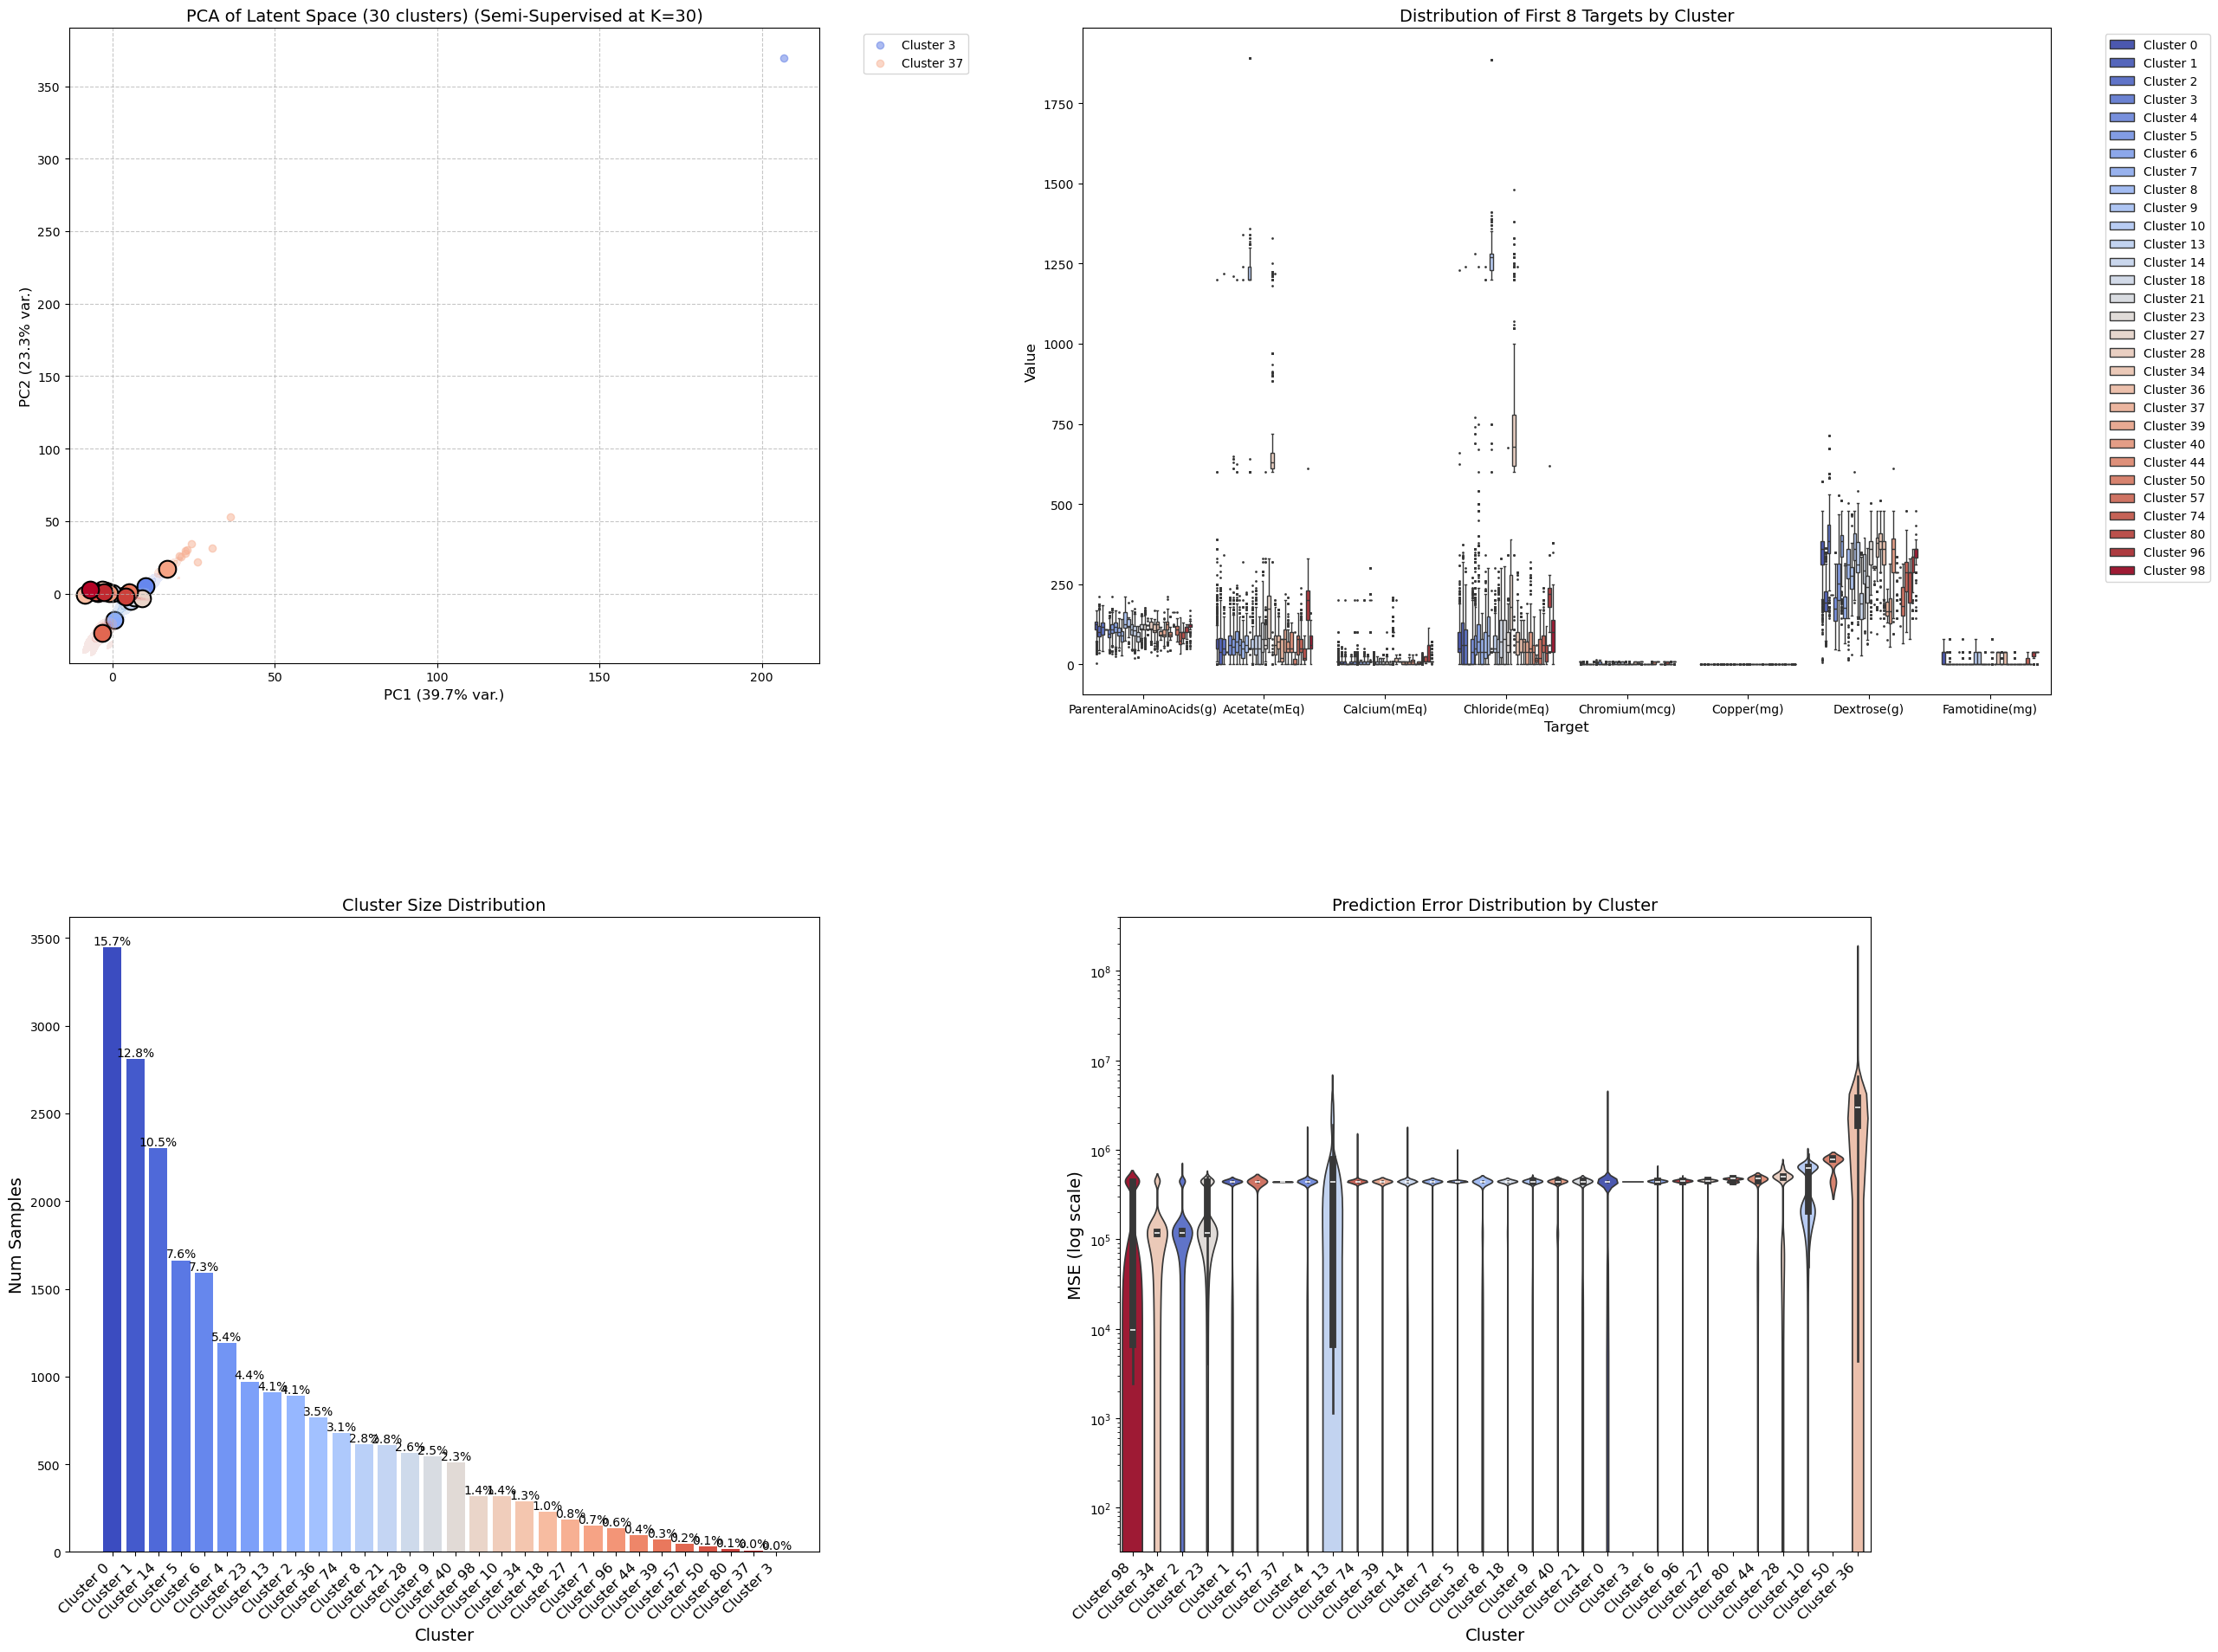

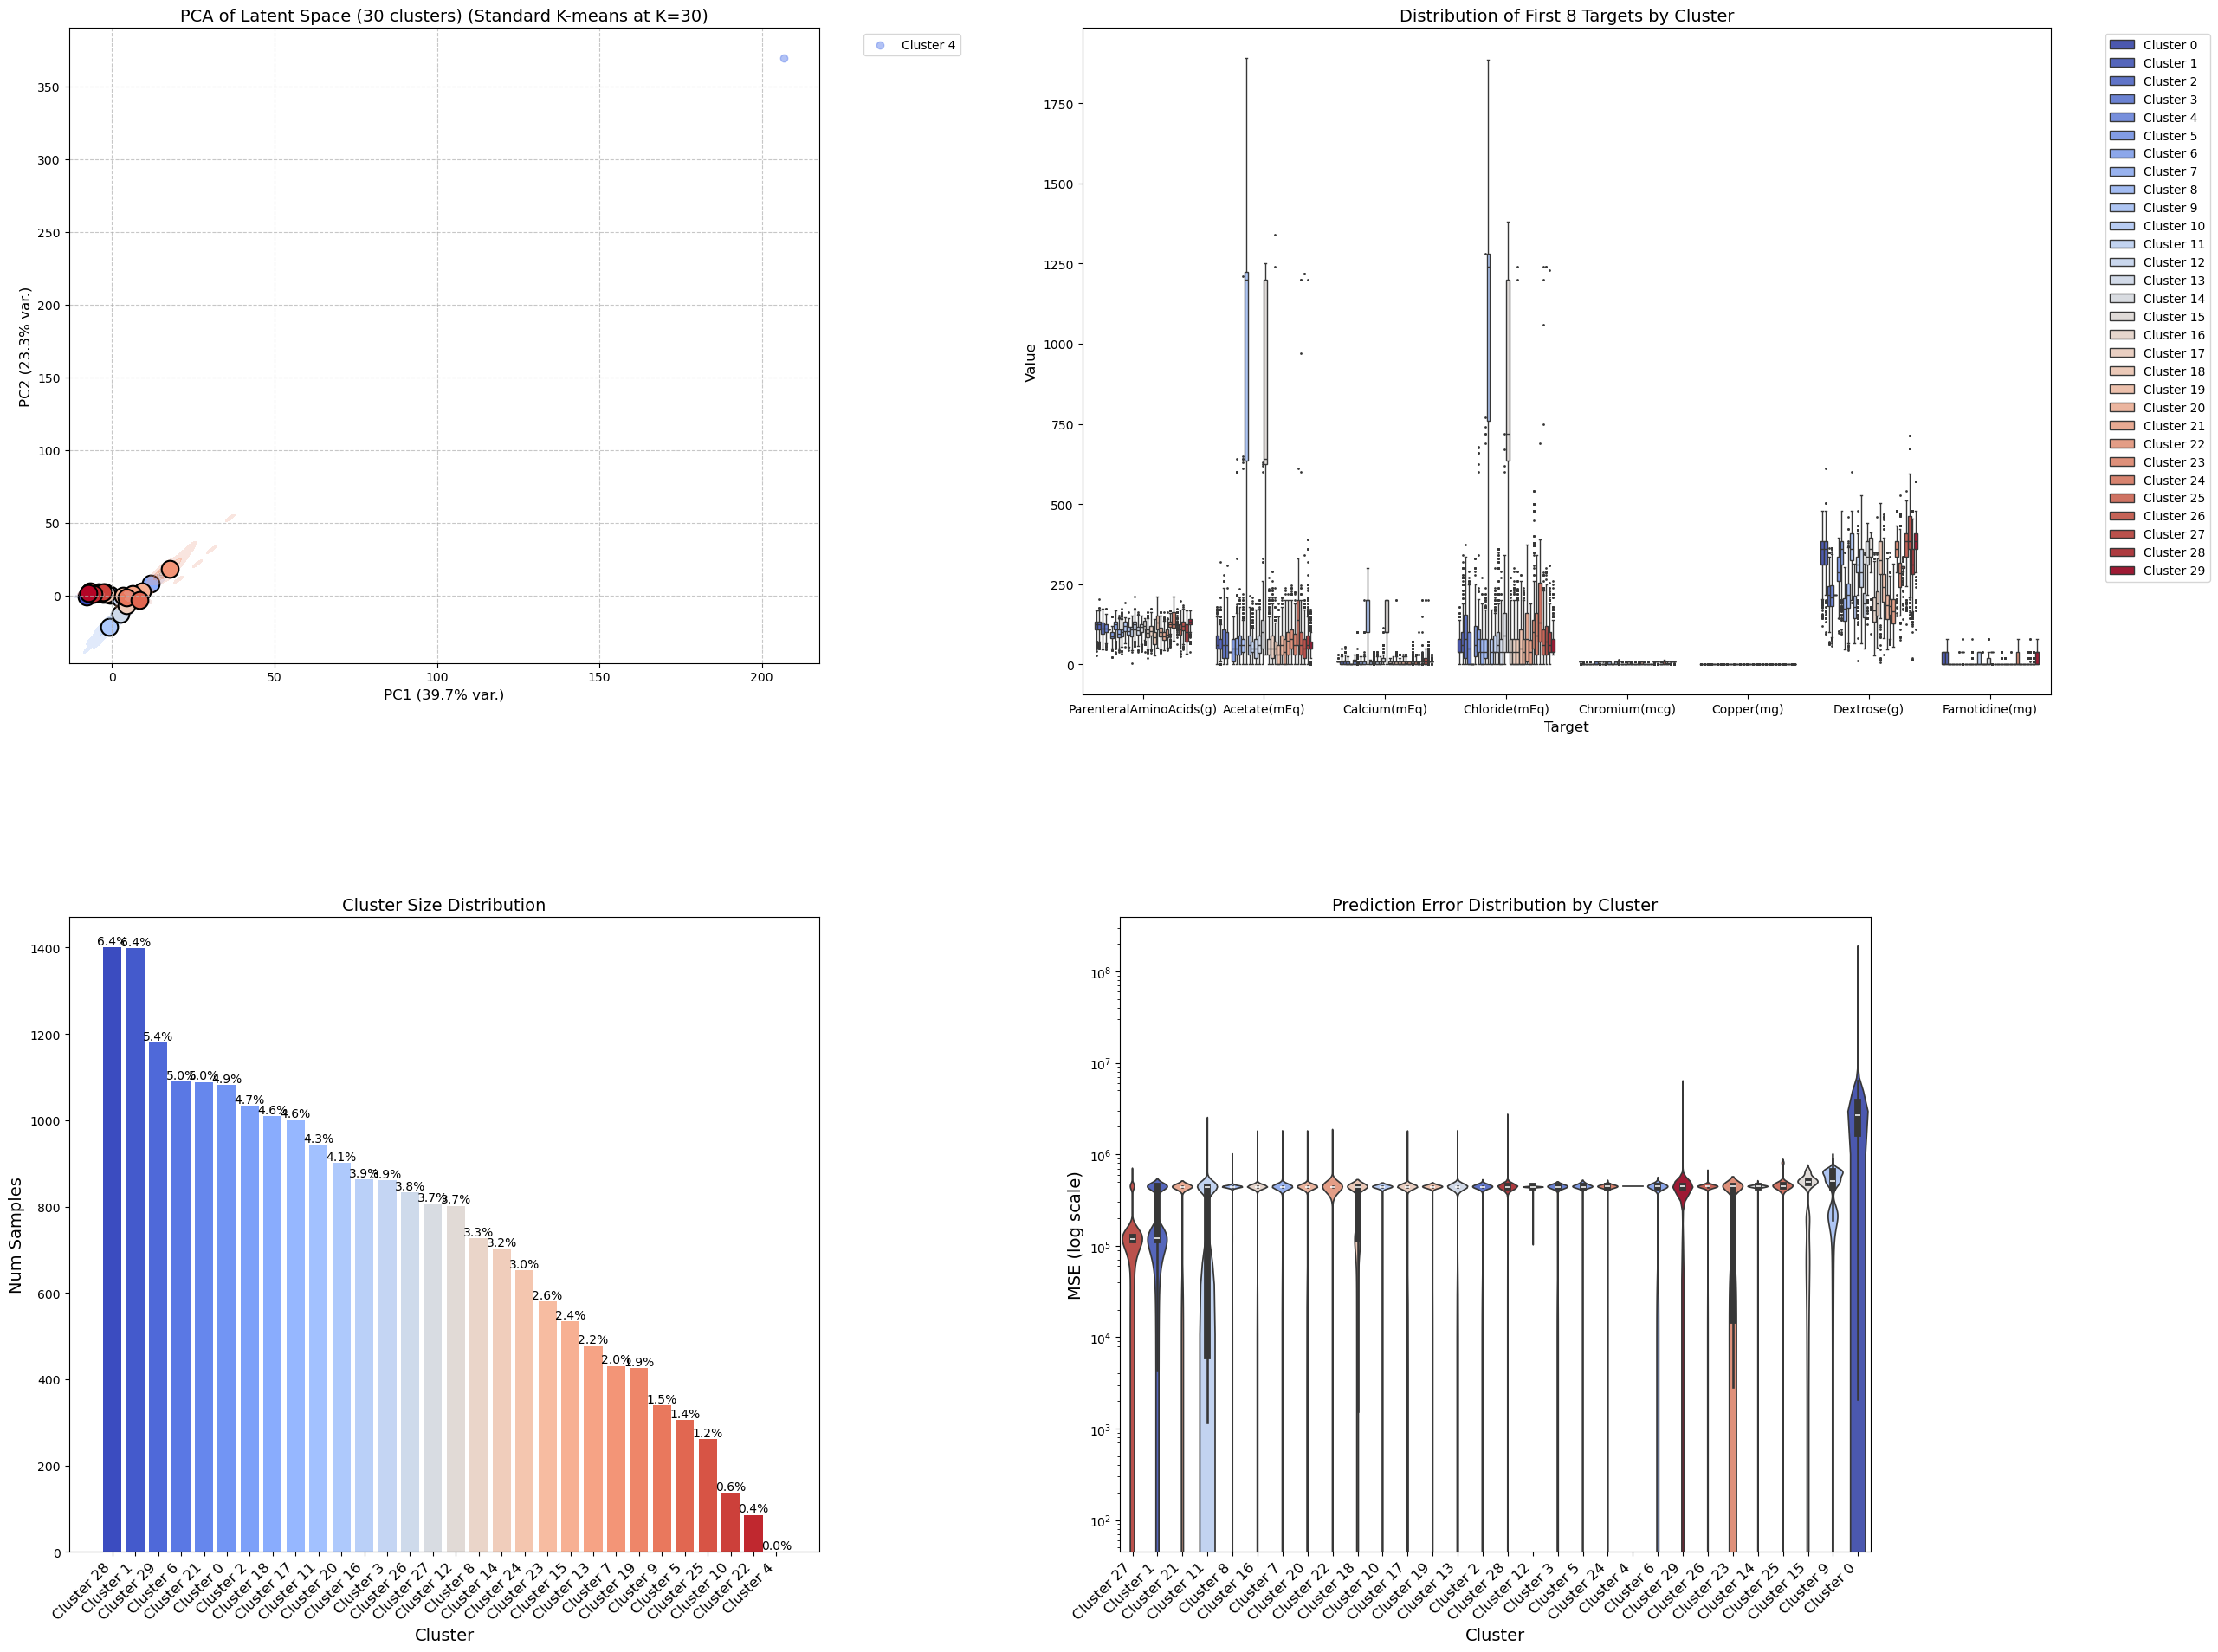


===== Summary Comparison at K=30 =====
Semi-supervised approach:
  Training correlation: 0.6909
  Training RMSE: 720.1379

Standard K-means approach:
  Training correlation: 0.5930
  Training RMSE: 720.1266

===== PART D: Correlation (R) Comparison Between Approaches =====



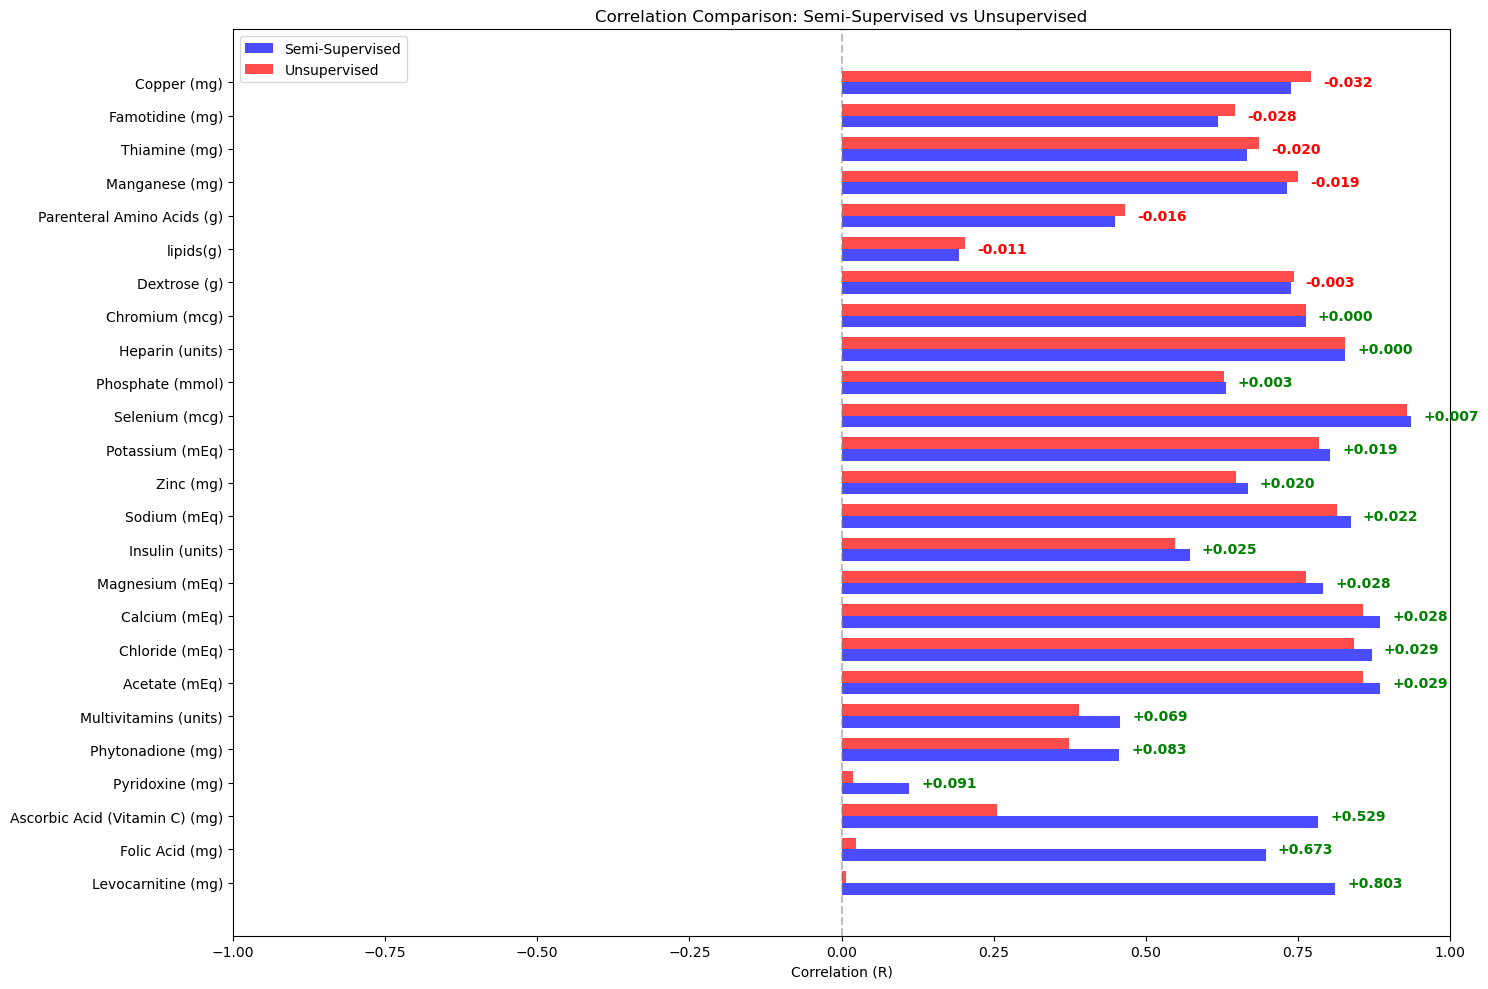


===== Summary Metrics Comparison =====
Metric          Semi-Supervised Unsupervised    Difference     
------------------------------------------------------------
Average R               0.6770         0.5839        +0.0931
Average RMSE          265.0582       265.0880        +0.0298


In [2]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from tqdm import tqdm
import keras.backend as K
import umap  # For UMAP projection
from scipy.stats import pearsonr
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cdist
import threading
import time
import warnings
import copy
from joblib import Parallel, delayed
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from sklearn.metrics import pairwise_distances, mean_squared_error, r2_score, silhouette_score
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from scipy.stats import pearsonr
from functools import lru_cache
import threading
import time
import warnings
import copy
from joblib import Parallel, delayed
# ---------------------------------------------



import threading
global_decoder_lock = threading.Lock()

# Create an encoder model that outputs the latent representation
encoder = Model(inputs, z, name='encoder')

# Extract latent representations for the training and test sets
# Extract latent representations using SCALED data
print("Generating latent representations using SCALED data...")
latent_train = encoder.predict(X_train_scaled) # Use scaled data
latent_test = encoder.predict(X_test_scaled)   # Use scaled data
print(f"Generated latent_train shape: {latent_train.shape}")
print(f"Generated latent_test shape: {latent_test.shape}")

# Set the global decoder to your trained decoder
decoder_global = decoder



# ================================
# 3. CORRELATION & EVALUATION
# ================================
def get_custom_colors(num_clusters):
    """
    Returns a color palette with formal, cool-toned colors suitable for publication.
    Fixed to handle the case when num_clusters = 1
    """
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Handle special case when num_clusters is 1
    if num_clusters <= 1:
        return [(0.0, 0.0, 0.8, 1.0)]  # Return a single blue color
    
    # Generate colors using a coolwarm colormap for consistency
    cmap = plt.cm.coolwarm
    all_colors = [cmap(i / (num_clusters - 1)) for i in range(num_clusters)]
    
    # If the requested number of colors is less than the available palette, return the subset
    if num_clusters <= len(all_colors):
        return all_colors[:num_clusters]
    else:
        # If more colors are needed, interpolate between the generated colors
        colors = all_colors.copy()
        while len(colors) < num_clusters:
            new_colors = []
            for i in range(len(colors) - 1):
                c1 = np.array(colors[i])
                c2 = np.array(colors[i + 1])
                new_color = tuple((c1 + c2) / 2)
                new_colors.append(new_color)
            
            for c in new_colors:
                colors.append(c)
                if len(colors) >= num_clusters:
                    break
        
        return colors[:num_clusters]

def vectorized_r(y_true, y_pred):
    """
    Compute Pearson correlation coefficient for each column of y_true and y_pred.
    Returns a numpy array of correlation coefficients.
    (Modified to ensure NumPy inputs)
    """
    # --- Explicitly convert inputs to NumPy arrays ---
    if isinstance(y_true, pd.DataFrame) or isinstance(y_true, pd.Series):
        y_true_np = y_true.values
    elif hasattr(y_true, 'detach') and hasattr(y_true, 'cpu') and hasattr(y_true, 'numpy'): # Basic check for PyTorch tensor
         y_true_np = y_true.detach().cpu().numpy()
    else:
        # Attempt conversion, hoping it's array-like
        try:
            y_true_np = np.array(y_true)
        except Exception as e:
             print(f"[Error vectorized_r] Could not convert y_true to NumPy array: {e}")
             return np.array([]) # Return empty on failure

    if isinstance(y_pred, pd.DataFrame) or isinstance(y_pred, pd.Series):
        y_pred_np = y_pred.values
    elif hasattr(y_pred, 'detach') and hasattr(y_pred, 'cpu') and hasattr(y_pred, 'numpy'): # Basic check for PyTorch tensor
        y_pred_np = y_pred.detach().cpu().numpy()
    else:
         # Attempt conversion, hoping it's array-like
        try:
            y_pred_np = np.array(y_pred)
        except Exception as e:
             print(f"[Error vectorized_r] Could not convert y_pred to NumPy array: {e}")
             return np.array([]) # Return empty on failure
    # --- End NumPy conversion ---

    # --- Shape Validation after conversion ---
    if y_true_np.ndim != 2 or y_pred_np.ndim != 2:
        print(f"[Error Shape vectorized_r] Inputs must be 2D after conversion. Got y_true: {y_true_np.shape}, y_pred: {y_pred_np.shape}")
        return np.array([])
    if y_true_np.shape != y_pred_np.shape:
        print(f"[Error Shape vectorized_r] Mismatched shapes after conversion: y_true {y_true_np.shape}, y_pred {y_pred_np.shape}")
        return np.array([])
    if y_true_np.shape[0] <= 1: # Check if there are enough samples
         print(f"[Warning vectorized_r] Input arrays have length {y_true_np.shape[0]}, too short for correlation.")
         return np.array([0.0] * y_true_np.shape[1]) # Return zeros if too short
    # --- End Shape Validation ---

    n_targets = y_true_np.shape[1]
    correlations = []

    for i in range(n_targets):
        # Now indexing NumPy arrays, should be safe
        y_true_i = y_true_np[:, i]
        y_pred_i = y_pred_np[:, i]

        # Check for sufficient variance
        # Use a tolerance for std check
        std_true = np.std(y_true_i)
        std_pred = np.std(y_pred_i)
        if std_true > 1e-8 and std_pred > 1e-8:
            try:
                # Ensure inputs are 1D for pearsonr (should be already)
                corr, _ = pearsonr(y_true_i, y_pred_i)
                if not np.isnan(corr):
                    correlations.append(corr)
                else:
                    # print(f"[Debug vectorized_r] NaN correlation for column {i}") # Optional
                    correlations.append(0.0) # Treat NaN correlation as 0
            except ValueError as ve: # Catches errors like length mismatch if any somehow occurred
                 print(f"[Warning vectorized_r] ValueError for column {i}: {ve}")
                 correlations.append(0.0)
            except Exception as e: # Catch any other unexpected error during pearsonr
                 print(f"[Warning vectorized_r] Unexpected error in pearsonr for column {i}: {type(e).__name__} - {e}")
                 correlations.append(0.0)
        else:
            # Append 0 if variance is too low in either true or pred
            # print(f"[Debug vectorized_r] Zero variance or insufficient data in column {i}") # Optional
            correlations.append(0.0)

    # Return correlations, ensuring it's never empty if n_targets > 0
    return np.array(correlations) if correlations else np.array([0.0] * n_targets)


def compute_combined_score(r_val, rmse_val, baseline_rmse=1.0, alpha=0.7):
    """
    Compute a combined score that considers both correlation and RMSE.
    Higher is better.
    
    Parameters:
        r_val: Correlation value (higher is better)
        rmse_val: RMSE value (lower is better)
        baseline_rmse: Reference RMSE value for normalization
        alpha: Weight for correlation (1-alpha is weight for RMSE)
        
    Returns:
        Combined score (higher is better)
    """
    # Normalize RMSE (inverse so higher is better)
    normalized_rmse = baseline_rmse / (rmse_val + 1e-10)
    
    # Combined score (weighted average)
    return alpha * r_val + (1 - alpha) * normalized_rmse

def compute_avg_correlation_fixed(assignments, centers_dict, latents, Y, max_retries=5):
    """
    Decode all cluster centers for their respective samples, then compute a global
    Pearson correlation between these decoded predictions and the true target values.
    Returns the average correlation across all target dimensions.
    """
    if decoder_global is None:
        print("[Warning] No decoder provided; returning default correlation 0.0.")
        return 0.0
    
    # Prepare arrays for all predictions and all true values
    all_preds = np.zeros_like(Y)
    
    # For each sample, use its assigned cluster center for prediction
    unique_labels = np.unique(assignments)
    for lbl in unique_labels:
        idx = np.where(assignments == lbl)[0]
        if len(idx) == 0:
            continue
            
        # Get the center for this cluster
        center = centers_dict[lbl]
        repeated_center = np.tile(center, (len(idx), 1))
        
        # Decode using VAE decoder directly
        try:
            with global_decoder_lock:
                decoded = decoder_global.predict(repeated_center, verbose=0)
            all_preds[idx] = decoded
        except Exception as e:
            print(f"[Warning] Failed to decode cluster {lbl}: {e}")
    
    # Calculate correlations for each target dimension
    return np.mean(vectorized_r(Y, all_preds))

compute_avg_correlation = compute_avg_correlation_fixed

def get_true_and_predicted_values(Y_pred_scaled, Y_test, scaler_Y=None, Y_test_original=None):
    """
    Get true and predicted values, with optional inverse scaling.
    """
    if scaler_Y is not None and Y_test_original is not None:
        Y_pred = scaler_Y.inverse_transform(Y_pred_scaled)
        Y_true = Y_test_original
    else:
        Y_pred = Y_pred_scaled
        Y_true = Y_test
    return Y_true, Y_pred

def merge_clusters(assignments, label1, label2):
    """
    Merge two clusters by assigning all points from label2 to label1.
    """
    new_label = min(label1, label2)
    old_label = max(label1, label2)
    mask = (assignments == old_label)
    if np.any(mask):
        new_assign = assignments.copy()
        new_assign[mask] = new_label
        return new_assign
    return assignments

def compute_cluster_centers(latents, assignments):
    """
    Compute cluster centers as the mean of all points in each cluster.
    Returns a dictionary mapping cluster labels to centers.
    """
    unique_labels, inv = np.unique(assignments, return_inverse=True)
    centers_dict = {}
    centers_mat = np.zeros((len(unique_labels), latents.shape[1]))
    counts = np.zeros(len(unique_labels), dtype=int)
    for i, idx in enumerate(inv):
        centers_mat[idx] += latents[i]
        counts[idx] += 1
    for i, lbl in enumerate(unique_labels):
        if counts[i] > 0:
            centers_dict[lbl] = centers_mat[i] / counts[i]
        else:
            centers_dict[lbl] = np.zeros(latents.shape[1])
    return centers_dict

def assign_test_data_to_clusters(latent_test, cluster_centers_dict):
    """
    Assign test data points to the nearest cluster center.
    
    Parameters:
        latent_test: Test data in the latent space
        cluster_centers_dict: Dictionary mapping cluster labels to centers
        
    Returns:
        Array of cluster assignments for test data
    """
    if latent_test is None or len(latent_test) == 0:
        raise ValueError("latent_test is empty or None.")
    if not cluster_centers_dict:
        raise ValueError("cluster_centers_dict is empty or None.")
    
    # Convert centers dict to array
    labels = np.array(list(cluster_centers_dict.keys()))
    centers = np.array([cluster_centers_dict[l] for l in labels])
    
    # Compute distances to all centers
    dmat = cdist(latent_test, centers, metric="euclidean")
    idx_min = np.argmin(dmat, axis=1)
    
    # Return assigned labels
    return labels[idx_min]

def evaluate_cluster_metrics(assignments, centers_dict, latents, Y):
    """
    Compute both correlation and RMSE for a clustering solution.
    (Modified for debugging)
    """
    if decoder_global is None:
        return 0.0, float('inf')

    # Prepare arrays for predictions
    pred_lat = np.zeros_like(latents)
    for lbl, center in centers_dict.items():
        idx = np.where(assignments == lbl)[0]
        if len(idx) > 0: # Ensure cluster is not empty
             pred_lat[idx] = center
        # Else: pred_lat[idx] remains zeros, decoder will predict something

    # Get predictions using decoder
    try:
        with global_decoder_lock:
            # Ensure input to decoder is correctly shaped
            if pred_lat.shape[1] != decoder_global.input_shape[-1]:
                 print(f"[Error Shape] Input to decoder 'pred_lat' has wrong dimension: {pred_lat.shape}, expected latent dim: {decoder_global.input_shape[-1]}")
                 # Handle error appropriately, maybe return default values or raise
                 return 0.0, float('inf') # Or raise ValueError

            decoded = decoder_global.predict(pred_lat, verbose=0)

        

        # Ensure Y and decoded have compatible shapes for metrics
        if not (hasattr(Y, 'shape') and hasattr(decoded, 'shape') and Y.shape == decoded.shape):
             print(f"[Error Shape] Mismatch between Y shape ({Y.shape if hasattr(Y, 'shape') else type(Y)}) and decoded shape ({decoded.shape if hasattr(decoded, 'shape') else type(decoded)})")
             return 0.0, float('inf') # Or raise ValueError

        # Calculate correlation
        corr = np.mean(vectorized_r(Y, decoded))

        # Calculate RMSE
        # Make sure inputs to mean_squared_error are valid
        Y_np = Y.values if isinstance(Y, pd.DataFrame) else np.array(Y) # Ensure NumPy array
        rmse = np.sqrt(mean_squared_error(Y_np, decoded))

        # Check for NaN/inf results
        if np.isnan(corr) or np.isinf(corr):
            print(f"[Warning] Correlation calculation resulted in NaN/inf. Setting to 0.0")
            corr = 0.0
        if np.isnan(rmse) or np.isinf(rmse):
            print(f"[Warning] RMSE calculation resulted in NaN/inf. Setting to inf")
            rmse = float('inf')

        return corr, rmse

    except Exception as e:
        import traceback # Import here or globally
        print(f"[Warning] Error details in evaluate_cluster_metrics:")
        print(f"  Exception Type: {type(e)}")
        # Print the arguments passed to the exception
        print(f"  Exception Args: {e.args}")
        # Optionally print the full traceback to see the exact line
        # print(" Traceback:")
        # traceback.print_exc()
        return 0.0, float('inf') # Return default error values

def evaluate_cluster_solution(assignments, latent_train, Y_train):
    """
    Computes metrics for the given clustering:
      - Number of clusters,
      - Average correlation (from decoded cluster centers),
      - Mean squared error (MSE) comparing decoded predictions with true Y,
      - Silhouette score,
      - Cluster size statistics.
    """
    if decoder_global is None:
        unl, cnts = np.unique(assignments, return_counts=True)
        return {
            "num_clusters": len(unl),
            "correlation": 0.0,
            "mse": 0.0,
            "silhouette": -1,
            "size_mean": np.mean(cnts),
            "size_std": np.std(cnts),
            "size_min": np.min(cnts),
            "size_max": np.max(cnts),
            "size_imbalance": np.std(cnts)/(np.mean(cnts)+1e-10)
        }
    
    centers_dict = compute_cluster_centers(latent_train, assignments)
    corr, rmse = evaluate_cluster_metrics(assignments, centers_dict, latent_train, Y_train)
    mse_val = rmse * rmse  # Square the RMSE to get MSE
    
    silhouette_val = -1
    try:
        if len(assignments) <= 10000:
            silhouette_val = silhouette_score(latent_train, assignments)
        else:
            n_sample = min(5000, len(assignments))
            sidx = np.random.choice(len(assignments), n_sample, replace=False)
            silhouette_val = silhouette_score(latent_train[sidx], assignments[sidx])
    except Exception as e:
        print(f"[Warning] Error calculating silhouette score: {e}")
    
    unl, cnts = np.unique(assignments, return_counts=True)
    size_mean = np.mean(cnts)
    size_std = np.std(cnts)
    size_min = np.min(cnts)
    size_max = np.max(cnts)
    imbalance = size_std/(size_mean+1e-10)
    
    return {
        "num_clusters": len(unl),
        "correlation": corr,
        "mse": mse_val,
        "rmse": rmse,
        "silhouette": silhouette_val,
        "size_mean": size_mean,
        "size_std": size_std,
        "size_min": size_min,
        "size_max": size_max,
        "size_imbalance": imbalance
    }

def evaluate_test_predictions(test_assignments, latent_test, Y_test, cluster_centers_dict,
                              decoder_global=None, scaler_Y=None, Y_test_original=None,
                              target_names=None, visualize=True):
    """
    Evaluate clustering on test data by computing metrics and optionally visualizing results.

    (Code modified to ensure NumPy arrays before slicing)
    """
    if decoder_global is None:
        raise ValueError("decoder_global is None. Provide a decoder to decode test data.")

    # Apply cluster centers to test data
    pred_lat_test = np.zeros_like(latent_test)
    # Use mean of centers as fallback ONLY if needed (should generally not happen if centers are valid)
    fallback_center = np.mean(list(cluster_centers_dict.values()), axis=0) if cluster_centers_dict else np.zeros(latent_test.shape[1])
    for i, lbl in enumerate(test_assignments):
         pred_lat_test[i] = cluster_centers_dict.get(lbl, fallback_center) # Use .get for safety

    # Get predictions from decoder
    with global_decoder_lock:
        Y_pred_scaled = decoder_global.predict(pred_lat_test, verbose=0)

    # Inverse transform if needed
    Y_true, Y_pred = get_true_and_predicted_values(Y_pred_scaled, Y_test, scaler_Y=scaler_Y, Y_test_original=Y_test_original)

    # ***** FIX: Ensure Y_true and Y_pred are NumPy arrays *****
    # Check for Y_true
    if isinstance(Y_true, pd.DataFrame):
        Y_true_np = Y_true.values
    # Check if it's a TensorFlow tensor (or similar object with .numpy())
    elif hasattr(Y_true, 'numpy') and callable(Y_true.numpy):
        Y_true_np = Y_true.numpy()
    else:
        Y_true_np = np.array(Y_true) # General conversion

    # Check for Y_pred
    if isinstance(Y_pred, pd.DataFrame):
        Y_pred_np = Y_pred.values
    # Check if it's a TensorFlow tensor (or similar object with .numpy())
    elif hasattr(Y_pred, 'numpy') and callable(Y_pred.numpy):
        Y_pred_np = Y_pred.numpy()
    else:
        Y_pred_np = np.array(Y_pred) # General conversion
    # **********************************************************

    # Use target names if provided, otherwise create placeholders
    if target_names is None:
        # Check shape after conversion
        if Y_true_np.ndim == 2:
             target_names = [f"Target_{i}" for i in range(Y_true_np.shape[1])]
        else:
             print("[Warning] Y_true_np is not 2D after conversion, cannot generate target names.")
             target_names = [] # Avoid error later if shape is wrong

    # Calculate performance metrics
    r_scores = {}
    rmse_scores = {}

    # Check if target_names were successfully generated
    if target_names:
        for i, col in enumerate(target_names):
            # Calculate Pearson correlation (R) using NumPy arrays
            try:
                # Use NumPy arrays for slicing
                if Y_true_np.shape[0] > 1 and Y_pred_np.shape[0] > 1: # Need more than 1 sample for correlation
                    r_val, _ = pearsonr(Y_true_np[:, i], Y_pred_np[:, i])
                    if np.isnan(r_val): # Handle NaN correlation (e.g., zero variance)
                        r_val = 0.0
                else:
                    r_val = 0.0 # Not enough data for correlation
            except Exception as e: # Catch any other errors during calculation
                print(f"[Warning] PearsonR failed for column {i} ('{col}'): {e}")
                r_val = 0.0

            # Calculate RMSE using NumPy arrays
            try:
                 # Use NumPy arrays for slicing
                rmse_val = np.sqrt(mean_squared_error(Y_true_np[:, i], Y_pred_np[:, i]))
                if np.isnan(rmse_val) or np.isinf(rmse_val): # Handle NaN/inf RMSE
                    print(f"[Warning] RMSE calculation resulted in NaN/inf for column {i} ('{col}'). Setting to inf.")
                    rmse_val = float('inf')
            except Exception as e:
                print(f"[Warning] MSE calculation failed for column {i} ('{col}'): {e}")
                rmse_val = float('inf') # Assign infinity if calculation fails

            r_scores[col] = r_val
            rmse_scores[col] = rmse_val
            # print(f"[Test] {col}: R = {r_val:.3f}, RMSE = {rmse_val:.3f}") # Optional print

    # Visualize results if requested
    if visualize and r_scores: # Check if scores were actually calculated
        # Sort targets by R
        sorted_cols = sorted(r_scores.keys(), key=lambda k: r_scores[k], reverse=True)
        # Use custom colors
        palette = get_custom_colors(len(sorted_cols))

        # R plot
        plt.figure(figsize=(10, max(6, len(sorted_cols)*0.4)))
        barh = plt.barh([str(k) for k in sorted_cols],
                        [r_scores[k] for k in sorted_cols],
                        color=palette)
        plt.title("Pearson's Correlation of K-Means Clustering Results on Test Set", fontsize=14)
        plt.xlabel("Correlation (R)")
        plt.xlim(-1.05, 1.05) # R can range from -1 to 1
        for i, b in enumerate(barh):
            w = b.get_width()
            plt.text(w + (0.01 * np.sign(w) if w != 0 else 0.01), b.get_y()+b.get_height()/2, f"{w:.3f}", va="center", ha="left" if w>=0 else "right", fontsize=9)
        plt.tight_layout()
        plt.show()

        # RMSE plot
        plt.figure(figsize=(10, max(6, len(sorted_cols)*0.4)))
        # Filter out infinite RMSE values for plotting limits, but plot them
        finite_rmse = [rmse_scores[k] for k in sorted_cols if np.isfinite(rmse_scores[k])]
        max_rmse = max(finite_rmse) if finite_rmse else 1.0 # Handle case where all are inf

        barh = plt.barh([str(k) for k in sorted_cols],
                        # Replace inf with a large number for plotting if needed, or handle scale
                        [rmse_scores[k] if np.isfinite(rmse_scores[k]) else max_rmse * 1.1 for k in sorted_cols],
                        color=palette)
        plt.title("Error Analysis of K-Means Clustering on Test Set Using RMSE", fontsize=14)
        plt.xlabel("RMSE")
        # Adjust xlim based on finite values
        plt.xlim(0, max_rmse * 1.15)

        for i, b in enumerate(barh):
            w = b.get_width()
            score = rmse_scores[sorted_cols[i]] # Get original score
            label = f"{score:.3f}" if np.isfinite(score) else "Inf"
            # Adjust text position slightly beyond the bar
            plt.text(w + max_rmse * 0.01, b.get_y()+b.get_height()/2, label, va="center", fontsize=9)
        plt.tight_layout()
        plt.show()

    return r_scores, rmse_scores

def improved_visualize_clusters(latent_train, assignments, decoder=None, Y_train=None, title_suffix=""):
    """
    Create comprehensive visualizations for clustering results.
    
    Parameters:
        latent_train: Latent representations
        assignments: Cluster assignments
        decoder: Decoder model for predictions (uses decoder_global if None)
        Y_train: Target values (optional)
        title_suffix: Additional text to add to the plot title
    
    Returns:
        Figure object
    """
    from sklearn.decomposition import PCA
    import seaborn as sns
    from matplotlib.gridspec import GridSpec
    
    if decoder is None and decoder_global is not None:
        decoder = decoder_global
    
    if decoder is None:
        raise ValueError("No decoder provided (decoder_global is None).")
    
    # Determine target names based on Y_train type
    if isinstance(Y_train, pd.DataFrame):
        target_names = list(Y_train.columns)
        Y_array = Y_train.values
    elif Y_train is not None:
        # If target names are not provided, use placeholders or available_targets if set
        if available_targets is not None:
            target_names = available_targets[:Y_train.shape[1]]
        else:
            possible_names = ["Calcium","Protein","Phosphorus","VitaminD","Iron","Fiber","Zinc","Etc"]
            target_names = possible_names[:Y_train.shape[1]]
        Y_array = Y_train
    else:
        target_names = []
        Y_array = None
    
    # Create figure with multiple subplots
    fig = plt.figure(figsize=(26,22))
    
    # 2D PCA Plot
    ax1 = fig.add_subplot(2,2,1)
    pca = PCA(n_components=2)
    lat2d = pca.fit_transform(latent_train)
    unl = np.unique(assignments)
    
    # Use custom colors for visualization
    colors = get_custom_colors(len(unl))
    
    for i, c in enumerate(unl):
        idx = np.where(assignments==c)[0]
        if len(idx) > 10:
            try:
                # Kernel density estimate plot for clusters with sufficient points
                sns.kdeplot(x=lat2d[idx,0], y=lat2d[idx,1],
                            levels=5, color=colors[i], fill=True, alpha=0.3,
                            label=f"Cluster {c}", ax=ax1)
                
                # Plot cluster center
                center = latent_train[idx].mean(axis=0)
                center_2d = pca.transform(center.reshape(1,-1))
                ax1.scatter(center_2d[0,0], center_2d[0,1],
                            s=200, color=colors[i], marker="o",
                            edgecolor="black", linewidth=1.5)
            except:
                # Fallback to scatter plot if KDE fails
                ax1.scatter(lat2d[idx,0], lat2d[idx,1],
                            color=colors[i], label=f"Cluster {c}", alpha=0.5)
        else:
            # Simple scatter for small clusters
            ax1.scatter(lat2d[idx,0], lat2d[idx,1],
                        color=colors[i], label=f"Cluster {c}", alpha=0.5)
    
    # Add PCA explained variance to plot
    var1 = pca.explained_variance_ratio_[0]*100
    var2 = pca.explained_variance_ratio_[1]*100
    ax1.set_title(f"PCA of Latent Space ({len(unl)} clusters) {title_suffix}", fontsize=14)
    ax1.set_xlabel(f"PC1 ({var1:.1f}% var.)", fontsize=12)
    ax1.set_ylabel(f"PC2 ({var2:.1f}% var.)", fontsize=12)
    ax1.legend(bbox_to_anchor=(1.05,1), loc="upper left", fontsize=10)
    ax1.grid(True, linestyle="--", alpha=0.7)
    
    # Setup layout for target distribution plot
    gs = GridSpec(2,2, figure=fig)
    if hasattr(fig,"axes") and len(fig.axes)>=2:
        fig.delaxes(fig.axes[1])
    
    targets_gs = GridSpec(1,1, figure=fig)
    targets_gs.update(left=0.55, right=0.98, top=0.9, bottom=0.55)
    ax2 = fig.add_subplot(targets_gs[0,0])
    
    # Target distribution plot
    if Y_array is None:
        ax2.text(0.5,0.5,"No target data", ha="center", va="center", fontsize=14)
    else:
        # Create records for each cluster-target combination
        data_recs = []
        num_targets = Y_array.shape[1]
        for c in unl:
            idx = np.where(assignments==c)[0]
            for j in range(num_targets):
                tname = target_names[j] if j<len(target_names) else f"Target_{j}"
                for val in Y_array[idx,j]:
                    data_recs.append({"Cluster":f"Cluster {c}","Target":tname,"Value":val})
        
        df_targets = pd.DataFrame(data_recs)
        max_show = min(8, num_targets)  # Show up to 8 targets
        show_names = target_names[:max_show]
        sub_df = df_targets[df_targets["Target"].isin(show_names)]
        
        # Create boxplot of targets by cluster
        sns.boxplot(x="Target", y="Value", hue="Cluster", data=sub_df,
                    ax=ax2, palette=colors[:len(unl)], fliersize=1)
        ax2.set_title(f"Distribution of First {max_show} Targets by Cluster", fontsize=14)
        ax2.set_xlabel("Target", fontsize=12)
        ax2.set_ylabel("Value", fontsize=12)
        ax2.legend(bbox_to_anchor=(1.05,1), loc="upper left", fontsize=10)
    
    # Cluster size distribution plot
    ax3 = fig.add_subplot(2,2,3)
    cluster_sizes = [np.sum(assignments==c) for c in unl]
    size_df = pd.DataFrame({"Cluster":[f"Cluster {c}" for c in unl],
                            "Size":cluster_sizes})
    size_df["Percentage"] = size_df["Size"]/len(assignments)*100
    size_df.sort_values("Size", ascending=False, inplace=True)
    
    # Bar chart of cluster sizes
    bars = ax3.bar(size_df["Cluster"], size_df["Size"], color=colors[:len(size_df)])
    ax3.set_title("Cluster Size Distribution", fontsize=14)
    ax3.set_xlabel("Cluster", fontsize=14)
    ax3.set_ylabel("Num Samples", fontsize=14)
    # Fix for the set_ticklabels warning
    ax3.set_xticks(range(len(size_df["Cluster"])))
    ax3.set_xticklabels(size_df["Cluster"], rotation=45, ha="right", fontsize=12)
    
    # Add percentage labels
    for bar, pct in zip(bars, size_df["Percentage"]):
        h = bar.get_height()
        ax3.text(bar.get_x()+bar.get_width()/2., h+0.1,
                 f"{pct:.1f}%", ha="center", va="bottom", fontsize=10)
    
    # Prediction error distribution plot
    ax4 = fig.add_subplot(2,2,4)
    if decoder is None or Y_array is None:
        ax4.text(0.5,0.5,"Cannot compute errors (missing decoder or Y_train).", 
                 ha="center", va="center", fontsize=12)
    else:
        # Calculate prediction error for each sample
        error_data = []
        for c in unl:
            idx = np.where(assignments==c)[0]
            if len(idx)==0:
                continue
            
            # Get cluster center and repeat for all members
            center = latent_train[idx].mean(axis=0)
            repeated_center = np.tile(center, (len(idx),1))
            
            try:
                # Predict using decoder
                with global_decoder_lock:
                    preds = decoder.predict(repeated_center, verbose=0)
                
                # Calculate MSE for each sample
                for i, ridx in enumerate(idx):
                    mse_val = np.mean((preds[i]-Y_array[ridx])**2)
                    error_data.append({"Cluster":f"Cluster {c}","MSE":mse_val})
            except Exception as e:
                print(f"[Warning] Error computing MSE for cluster {c}: {e}")
        
        # Create violin plot of prediction errors by cluster
        if error_data:
            edf = pd.DataFrame(error_data)
            cluster_order = edf.groupby("Cluster")["MSE"].median().sort_values().index
            
            # Use custom colors for violin plot
            # Fix for the violin plot warning
            sns.violinplot(x="Cluster", y="MSE", data=edf, order=cluster_order,
                        hue="Cluster", palette=colors[:len(cluster_order)], 
                        legend=False, ax=ax4, inner="box")
            ax4.set_title("Prediction Error Distribution by Cluster", fontsize=14)
            ax4.set_xlabel("Cluster", fontsize=14)
            ax4.set_ylabel("Mean Squared Error", fontsize=14)
            # Fix for the second set_ticklabels warning
            ax4.set_xticks(range(len(cluster_order)))
            ax4.set_xticklabels(cluster_order, rotation=45, ha="right", fontsize=12)
            
            # Use log scale for wide-ranging errors
            if edf["MSE"].max()/(edf["MSE"].min()+1e-10) > 100:
                ax4.set_yscale("log")
                ax4.set_ylabel("MSE (log scale)", fontsize=14)
        else:
            ax4.text(0.5,0.5,"No MSE data computed", ha="center", va="center", fontsize=12)
    
            # Fix for tight_layout warning
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
    plt.show()
    
    return fig

# ================================
# 4. ITERATIVE MERGING WITH MINIMAL CORRELATION REDUCTION
# ================================
def evaluate_merge_pair(lblA, lblB, assignments, latent_train, Y_train, centers_dict, current_metrics):
    """
    Simulate merging cluster lblB into lblA and evaluate based on the CHANGE in correlation.

    Parameters:
        lblA, lblB: Labels of clusters to merge
        assignments: Current cluster assignments
        latent_train: Latent representations
        Y_train: Target values
        centers_dict: Dictionary of current cluster centers
        current_metrics: Tuple of (current_correlation, current_rmse) for the current clustering

    Returns:
        Tuple of (lblA, lblB, new_metrics, corr_change, new_assignments)
        where new_metrics is (new_corr, new_rmse) and corr_change is (new_corr - current_corr)
    """
    # Extract current correlation
    current_corr, _ = current_metrics

    # Simulate merge
    new_assign = merge_clusters(assignments, lblA, lblB)

    # Create new centers dictionary with merged cluster
    new_centers_dict = centers_dict.copy()

    # Recalculate center for the merged cluster
    merged_indices = np.where((assignments == lblA) | (assignments == lblB))[0]
    if len(merged_indices) > 0:
        # Ensure lblA exists and assign the new center
        new_centers_dict[lblA] = np.mean(latent_train[merged_indices], axis=0)
    # If lblA didn't exist initially (e.g., if merging two clusters not previously present, though unlikely here)
    # This logic assumes lblA is the label to keep.

    # Remove the old cluster center lblB
    if lblB in new_centers_dict:
        del new_centers_dict[lblB]

    # Compute new metrics (correlation and RMSE after merge)
    new_corr, new_rmse = evaluate_cluster_metrics(new_assign, new_centers_dict, latent_train, Y_train)

    # Calculate the CHANGE in correlation (New Correlation - Current Correlation)
    # A positive value means correlation improved, negative means it dropped.
    corr_change = new_corr - current_corr

    # Return the results including the correlation change
    return (lblA, lblB, (new_corr, new_rmse), corr_change, new_assign)

def evaluate_merge_with_validation(lblA, lblB, assignments, latent_train, Y_train, centers_dict, current_metrics):
    """
    Evaluate merge using a validation split, focusing on the change in validation correlation.
    (Modified for debugging and correlation change assessment)
    """
    # Extract current overall correlation (used as baseline)
    current_corr, _ = current_metrics # Using overall current correlation as the reference point

    # Split data into training (80%) and validation (20%) sets
    from sklearn.model_selection import train_test_split
    indices = np.arange(len(latent_train))

    # Ensure stratification if applicable (though likely less critical here)
    # Consider stratifying by 'assignments' if cluster sizes are very uneven
    try:
      train_idx, val_idx = train_test_split(indices, test_size=0.2, random_state=42, stratify=assignments)
    except ValueError: # Handle cases where stratification is not possible (e.g., small clusters)
      
      train_idx, val_idx = train_test_split(indices, test_size=0.2, random_state=42)


    # Check if validation set is empty
    if len(val_idx) == 0:
        print("[Warning] Validation set is empty after split. Cannot evaluate merge.")
        # Return indicating failure or use a different strategy
        # Return no change, effectively disqualifying this merge candidate
        return (lblA, lblB, (current_corr, current_metrics[1]), 0.0, assignments)

    lat_train_subset = latent_train[train_idx]
    lat_val = latent_train[val_idx]

    # Ensure Y_train is indexable like a DataFrame or NumPy array
    if isinstance(Y_train, pd.DataFrame):
        y_train_subset = Y_train.iloc[train_idx]
        y_val = Y_train.iloc[val_idx]
    elif isinstance(Y_train, np.ndarray):
        y_train_subset = Y_train[train_idx]
        y_val = Y_train[val_idx]
    else: # Attempt conversion if it's tensor or other type
        try:
             Y_train_np = np.array(Y_train)
             y_train_subset = Y_train_np[train_idx]
             y_val = Y_train_np[val_idx]
        except Exception as e:
            
            return (lblA, lblB, (0.0, float('inf')), -float('inf'), assignments) # Indicate failure

    assign_train = assignments[train_idx]

    # Simulate the merge on training data subset
    new_assign_train = merge_clusters(assign_train, lblA, lblB)

    # Compute centers using only training data subset after merge
    new_centers_dict = compute_cluster_centers(lat_train_subset, new_assign_train)

    # Check if centers dictionary is valid
    if not new_centers_dict or any(np.isnan(c).any() for c in new_centers_dict.values()):
        print("[Warning] Invalid cluster centers computed in validation split.")
        return (lblA, lblB, (0.0, float('inf')), -float('inf'), assignments) # Indicate failure

    # Assign validation points to closest *new* centers
    val_assignments = assign_test_data_to_clusters(lat_val, new_centers_dict)

    # Prepare arrays for validation predictions
    pred_lat_val = np.zeros_like(lat_val)
    fallback_center = np.mean(list(new_centers_dict.values()), axis=0) if new_centers_dict else np.zeros(latent_train.shape[1])

    for i, lbl in enumerate(val_assignments):
        pred_lat_val[i] = new_centers_dict.get(lbl, fallback_center)

    # Get predictions for validation data
    try:
        with global_decoder_lock:
             # Ensure input to decoder is correctly shaped
             if pred_lat_val.shape[1] != decoder_global.input_shape[-1]:
                 print(f"[Error Shape] Input to decoder 'pred_lat_val' has wrong dimension: {pred_lat_val.shape}, expected latent dim: {decoder_global.input_shape[-1]}")
                 return (lblA, lblB, (0.0, float('inf')), -float('inf'), assignments) # Indicate failure

             decoded_val = decoder_global.predict(pred_lat_val, verbose=0)


        # Ensure y_val and decoded_val have compatible shapes
        if not (hasattr(y_val, 'shape') and hasattr(decoded_val, 'shape') and y_val.shape == decoded_val.shape):
             print(f"[Error Shape] Mismatch between y_val shape ({y_val.shape if hasattr(y_val, 'shape') else type(y_val)}) and decoded_val shape ({decoded_val.shape if hasattr(decoded_val, 'shape') else type(decoded_val)})")
             return (lblA, lblB, (0.0, float('inf')), -float('inf'), assignments) # Indicate failure

        # Calculate validation metrics (Correlation and RMSE)
        val_corr = np.mean(vectorized_r(y_val, decoded_val)) # vectorized_r handles potential NaN internally

        # Ensure inputs to mean_squared_error are valid
        y_val_np = y_val.values if isinstance(y_val, pd.DataFrame) else np.array(y_val) # Ensure NumPy array
        val_rmse = np.sqrt(mean_squared_error(y_val_np, decoded_val))

        # Check for NaN/inf results from metrics calculation
        if np.isnan(val_corr) or np.isinf(val_corr):
            print(f"[Warning] Validation Correlation resulted in NaN/inf. Setting to 0.0")
            val_corr = 0.0
        if np.isnan(val_rmse) or np.isinf(val_rmse):
            print(f"[Warning] Validation RMSE resulted in NaN/inf. Setting to inf")
            val_rmse = float('inf')

        # Calculate the CHANGE in validation correlation relative to overall current correlation
        corr_change_val = val_corr - current_corr

        # Perform the merge on the full dataset for returning
        full_new_assign = merge_clusters(assignments, lblA, lblB)

        # Return: merge pair, validation metrics tuple, validation correlation change, full new assignments
        return (lblA, lblB, (val_corr, val_rmse), corr_change_val, full_new_assign)

    except Exception as e:
        import traceback
        print(f"[Warning] Error details in evaluate_merge_with_validation:")
        print(f"  Exception Type: {type(e)}")
        print(f"  Exception Args: {e.args}")
        # traceback.print_exc() # Uncomment for full traceback if needed
        # Return original assignments on error to avoid breaking the loop badly
        return (lblA, lblB, (0.0, float('inf')), -float('inf'), assignments) # Indicate failure


def run_clustering_pipeline_minDiff(latent_train, Y_train, n_clusters_initial=100,
                                   target_clusters=1, max_drop_ratio=None, verbose=True,
                                   use_validation=True, target_k=None):
    """
    Improved pipeline for iterative merging with correlation and RMSE optimization.
    
    Parameters:
        latent_train: Latent space embeddings
        Y_train: Target variables
        n_clusters_initial: Initial number of clusters (default=100)
        target_clusters: Number of clusters to reach (default=1)
        max_drop_ratio: Maximum allowed drop in correlation (set to None to disable)
        verbose: Whether to print progress messages
        use_validation: Whether to use validation-based evaluation for merge decisions
        target_k: If specified, will ensure this exact K is in the results
        
    Returns:
        final_assignments: Cluster assignments after merging
        metrics_history: Dictionary of metrics at each number of clusters
        ped_km_clustering: Dictionary of KMeans objects at various cluster numbers
        final_metrics: Final metrics after merging
    """
    if verbose:
        print(f"Performing initial KMeans clustering with {n_clusters_initial} clusters...")
    
    # Perform initial clustering
    kmeans = KMeans(n_clusters=n_clusters_initial, random_state=42, n_init=10)
    initial_assignments = kmeans.fit_predict(latent_train)
    initial_centers = kmeans.cluster_centers_
    
    # Save a copy of the initial KMeans model
    km_reserve = copy.deepcopy(kmeans)
    
    # Create dataframe for cluster centers to track changes
    centers_df = pd.DataFrame(initial_centers, index=range(n_clusters_initial))
    
    # Evaluate initial solution
    init_metrics = evaluate_cluster_solution(initial_assignments, latent_train, Y_train)
    initial_corr = init_metrics["correlation"]
    initial_rmse = init_metrics.get("rmse", np.sqrt(init_metrics["mse"]))
    
    # Current metrics includes both correlation and RMSE
    current_metrics = (initial_corr, initial_rmse)
    
    # Set threshold only if max_drop_ratio is specified
    if max_drop_ratio is not None:
        allowed_corr = initial_corr * (1.0 - max_drop_ratio)  # Fallback threshold
        if verbose:
            print(f"Initial average correlation: {initial_corr:.4f}, RMSE: {initial_rmse:.4f}")
            print(f"Will merge clusters until reaching {target_clusters} clusters")
            print(f"Minimum allowed correlation (emergency threshold): {allowed_corr:.4f}")
    else:
        allowed_corr = None  # No threshold
        if verbose:
            print(f"Initial average correlation: {initial_corr:.4f}, RMSE: {initial_rmse:.4f}")
            print(f"Will merge clusters until reaching {target_clusters} clusters")
            print(f"No correlation threshold applied - will merge until K={target_clusters}")
    
    # Track metrics at each cluster count
    metrics_history = {n_clusters_initial: init_metrics}
    
    # Save KMeans models at various cluster numbers for later evaluation
    ped_km_clustering = {n_clusters_initial: copy.deepcopy(kmeans)}
    
    # Track merge operations
    merge_map = {}
    
    # Initialize current state
    current_assignments = initial_assignments.copy()
    
    # Labels need to be tracked as integers for the merging process
    kmeans.labels_ = current_assignments.copy()
    
    # Begin merging process
    num_clusters = n_clusters_initial
    
    while num_clusters > target_clusters:
        if verbose:
            print(f"Current number of clusters: {num_clusters}")
            
        # If we've reached the target_k, make sure to save this model
        if target_k is not None and num_clusters == target_k:
            if verbose:
                print(f"Reached target K={target_k}, saving this model specifically")
            
            # Make sure the model is properly saved
            updated_kmeans = copy.deepcopy(kmeans)
            updated_kmeans.labels_ = current_assignments
            updated_kmeans.n_clusters = num_clusters
            centers_dict = compute_cluster_centers(latent_train, current_assignments)
            updated_kmeans.cluster_centers_ = np.array([centers_dict[label] for label in np.unique(current_assignments)])
            ped_km_clustering[num_clusters] = updated_kmeans
            
            # Continue merging if we need to reach target_clusters
            if num_clusters > target_clusters:
                if verbose:
                    print(f"Continuing merges to reach target_clusters={target_clusters}")
        
        # Compute current centers
        centers_dict = compute_cluster_centers(latent_train, current_assignments)
        
        # Get cluster labels
        unique_labels = np.unique(current_assignments)
        
        # Calculate distances between all pairs of centers
        c_array = np.array([centers_dict[c] for c in unique_labels])
        dist_mat = cdist(c_array, c_array, metric='euclidean')
        np.fill_diagonal(dist_mat, np.inf)
        
        # Create sorted list of candidate merges based on distance
        candidate_merges = []
        for i in range(len(unique_labels)):
            for j in range(i+1, len(unique_labels)):
                candidate_merges.append((unique_labels[i], unique_labels[j], dist_mat[i, j]))
        
        # Sort by distance (closest first)
        candidate_merges.sort(key=lambda x: x[2])
        
        # Take top 30 candidates (or fewer if not available)
        num_candidates = min(100, len(candidate_merges))
        top_candidates = candidate_merges[:num_candidates]
        
        if verbose:
            print(f"Evaluating {len(top_candidates)} merge candidates...")
        
        # Evaluate candidates in parallel, with or without validation
        if use_validation:
            evaluation_function = evaluate_merge_with_validation
        else:
            evaluation_function = evaluate_merge_pair
            
        results = Parallel(n_jobs=28, prefer="threads")(
            delayed(evaluation_function)(
                lblA, lblB, current_assignments, latent_train, Y_train, centers_dict, current_metrics
            ) for lblA, lblB, _ in top_candidates
        )
        
        # Filter for acceptable correlation if threshold is set
        if allowed_corr is not None:
            valid_results = [res for res in results if res[2][0] >= allowed_corr]
            
            if not valid_results:
                if verbose:
                    print(f"No valid merges found that maintain correlation above {allowed_corr:.4f}")
                    print(f"Stopping at {num_clusters} clusters")
                break
        else:
            # No threshold - all results are valid
            valid_results = results
            
            # If we somehow have no valid results, break
            if not valid_results:
                if verbose:
                    print(f"No valid merges found. This should not happen without a threshold.")
                    print(f"Stopping at {num_clusters} clusters")
                break
        
        # Find merge with best combined score improvement (highest diff value)
        best_candidate = max(valid_results, key=lambda x: x[3])
        
        # Extract merge information
        lblA, lblB, new_metrics, diff, new_assignments = best_candidate
        new_corr, new_rmse = new_metrics
        
        # Save merge information
        merge_map[num_clusters] = (lblA, lblB)
        
        # Update assignments and metrics
        current_assignments = new_assignments
        current_metrics = new_metrics
        
        # Update num_clusters
        num_clusters = len(np.unique(current_assignments))
        
        # Calculate updated centers for visualization and next iteration
        new_centers_dict = compute_cluster_centers(latent_train, current_assignments)
        
        # Update the KMeans model for tracking
        updated_kmeans = copy.deepcopy(kmeans)
        updated_kmeans.labels_ = current_assignments
        updated_kmeans.n_clusters = num_clusters
        updated_kmeans.cluster_centers_ = np.array([new_centers_dict[label] for label in np.unique(current_assignments)])
        
        # Save current state
        ped_km_clustering[num_clusters] = updated_kmeans
        metrics_history[num_clusters] = evaluate_cluster_solution(current_assignments, latent_train, Y_train)
        
        if verbose:
            if diff >= 0:
                print(f"Merged clusters {lblA} and {lblB}: combined score improved by {diff:.4f}")
                print(f"New correlation: {new_corr:.4f}, RMSE: {new_rmse:.4f}, clusters={num_clusters}")
            else:
                print(f"Merged clusters {lblA} and {lblB}: combined score reduced by {abs(diff):.4f}")
                print(f"New correlation: {new_corr:.4f}, RMSE: {new_rmse:.4f}, clusters={num_clusters}")
    
    final_metrics = metrics_history[num_clusters]
    if verbose:
        print(f"Final solution: {num_clusters} clusters with correlation = {final_metrics['correlation']:.4f}")
    
    return current_assignments, metrics_history, ped_km_clustering, final_metrics

def plot_metrics_history(metrics_history, highlight_best=None):
    """
    Plot metrics history from the clustering process.
    """
    cluster_nums = sorted(metrics_history.keys())
    corrs = [metrics_history[n].get("correlation", 0.0) for n in cluster_nums]
    mses = [metrics_history[n].get("mse", 0.0) for n in cluster_nums]
    rmses = [np.sqrt(metrics_history[n].get("mse", 0.0)) for n in cluster_nums]
    sils = [metrics_history[n].get("silhouette", -1) for n in cluster_nums]
    imbals = [metrics_history[n].get("size_imbalance", 0.0) for n in cluster_nums]
    
    fig, axes = plt.subplots(2,2, figsize=(14,12))
    axes = axes.flatten()
    
    # Correlation plot
    axes[0].plot(cluster_nums, corrs, "o-", color="blue", linewidth=2, markersize=6)
    axes[0].set_title("Average Correlation (R)", fontsize=14)
    axes[0].set_xlabel("Number of Clusters", fontsize=12)
    axes[0].set_ylabel("Correlation", fontsize=12)
    axes[0].grid(True, linestyle="--", alpha=0.7)
    
    # RMSE plot
    axes[1].plot(cluster_nums, rmses, "o-", color="red", linewidth=2, markersize=6)
    axes[1].set_title("RMSE (Lower=Better)", fontsize=14)
    axes[1].set_xlabel("Number of Clusters", fontsize=12)
    axes[1].set_ylabel("RMSE", fontsize=12)
    axes[1].grid(True, linestyle="--", alpha=0.7)
    
    # Silhouette plot
    sil_valid_idx = [i for i, v in enumerate(sils) if v >= 0]
    if sil_valid_idx:
        sub_clusters = [cluster_nums[i] for i in sil_valid_idx]
        sub_sils = [sils[i] for i in sil_valid_idx]
        axes[2].plot(sub_clusters, sub_sils, "o-", color="green", linewidth=2, markersize=6)
        axes[2].set_title("Silhouette (Higher=Better)", fontsize=14)
        axes[2].set_xlabel("Number of Clusters", fontsize=12)
        axes[2].set_ylabel("Silhouette", fontsize=12)
        axes[2].grid(True, linestyle="--", alpha=0.7)
    else:
        axes[2].text(0.5, 0.5, "No valid silhouette scores", ha="center", va="center", fontsize=12)
    
    # Imbalance plot
    axes[3].plot(cluster_nums, imbals, "o-", color="orange", linewidth=2, markersize=6)
    axes[3].set_title("Cluster Size Imbalance (Lower=Better)", fontsize=14)
    axes[3].set_xlabel("Number of Clusters", fontsize=12)
    axes[3].set_ylabel("Imbalance", fontsize=12)
    axes[3].grid(True, linestyle="--", alpha=0.7)
    
    # Highlight best if provided
    if highlight_best is not None and highlight_best in cluster_nums:
        idx = cluster_nums.index(highlight_best)
        axes[0].plot([highlight_best], [corrs[idx]], marker="*", markersize=14, color="gold")
        axes[1].plot([highlight_best], [rmses[idx]], marker="*", markersize=14, color="gold")
        if highlight_best in sub_clusters:
            s2 = sub_clusters.index(highlight_best)
            axes[2].plot([highlight_best], [sub_sils[s2]], marker="*", markersize=14, color="gold")
        axes[3].plot([highlight_best], [imbals[idx]], marker="*", markersize=14, color="gold")
        
        # Add a vertical line at highlight_best
        for ax in axes:
            ax.axvline(x=highlight_best, color='gold', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()
    return fig

def plot_correlation_comparison(semi_results, unsup_results, target_names=None):
    """
    Plot side-by-side comparison of correlation values for semi-supervised and unsupervised approaches.
    """
    if semi_results is None or unsup_results is None:
        print("Missing results for comparison")
        return
    
    # Extract correlation scores
    semi_scores = semi_results["r_scores"]
    unsup_scores = unsup_results["r_scores"]
    
    # Create a DataFrame for plotting
    comparison_data = []
    for target in semi_scores.keys():
        comparison_data.append({
            "Target": target,
            "Semi-Supervised R": semi_scores[target],
            "Unsupervised R": unsup_scores[target],
            "Difference": semi_scores[target] - unsup_scores[target]
        })
    
    df_comparison = pd.DataFrame(comparison_data)
    
    # Sort by difference (largest improvement first)
    df_comparison = df_comparison.sort_values("Difference", ascending=False)
    
    # Create side-by-side bar plot
    plt.figure(figsize=(15, 10))
    
    targets = df_comparison["Target"]
    semi_r = df_comparison["Semi-Supervised R"]
    unsup_r = df_comparison["Unsupervised R"]
    diff = df_comparison["Difference"]
    
    # Set positions and width for bars
    pos = np.arange(len(targets))
    width = 0.35
    
    # Create bars
    plt.barh(pos, semi_r, width, color='blue', alpha=0.7, label='Semi-Supervised')
    plt.barh(pos + width, unsup_r, width, color='red', alpha=0.7, label='Unsupervised')
    
    # Add labels and title
    plt.yticks(pos + width/2, targets)
    plt.xlabel('Correlation (R)')
    plt.title('Correlation Comparison: Semi-Supervised vs Unsupervised')
    plt.legend()
    
    # Add difference values
    for i, (s, u, d) in enumerate(zip(semi_r, unsup_r, diff)):
        if d > 0:
            color = 'green'
            text = f"+{d:.3f}"
        else:
            color = 'red'
            text = f"{d:.3f}"
        
        plt.text(max(s, u) + 0.02, i + width/2, text, va='center', color=color, fontweight='bold')
    
    plt.xlim(-1, 1)  # Set x-axis limits for correlation
    plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)  # Add a vertical line at 0
    plt.tight_layout()
    plt.show()

def compare_clustering_approaches(latent_train, latent_test, Y_train, Y_test, target_k=30, 
                                  ped_km_clustering=None, decoder_model=None, scaler_Y=None, 
                                  Y_test_original=None, target_names=None, visualize=True):
    """
    Compare semi-supervised and standard K-means approaches at the same K value.
    
    Parameters:
        latent_train: Training set latent representations
        latent_test: Test set latent representations
        Y_train: Training set target values
        Y_test: Test set target values
        target_k: Target number of clusters (default=30)
        ped_km_clustering: Dictionary of KMeans models from iterative clustering
        decoder_model: Decoder model for predictions
        scaler_Y: Scaler for Y values (optional)
        Y_test_original: Original unscaled Y_test (optional)
        target_names: Names of target variables (optional)
        visualize: Whether to create visualizations
        
    Returns:
        Dictionary of results for both approaches
    """
    if decoder_model is None and decoder_global is not None:
        decoder_model = decoder_global
    
    if decoder_model is None:
        print("[Error] No decoder model provided.")
        return None
    
    if ped_km_clustering is None:
        print("[Error] No ped_km_clustering dictionary provided.")
        return None
        
    # Available cluster numbers from iterative clustering
    available_clusters = sorted(ped_km_clustering.keys())
    
    # Find the closest available K to target_k
    if target_k in available_clusters:
        closest_k = target_k
    else:
        closest_k = min(available_clusters, key=lambda x: abs(x - target_k))
        print(f"Warning: K={target_k} not found. Using closest available K={closest_k}")
    
    print(f"\n===== Comparing Clustering Approaches at K={closest_k} =====\n")
    
    # 1. Evaluate semi-supervised approach
    if closest_k in ped_km_clustering:
        semi_kmeans = ped_km_clustering[closest_k]
        semi_assignments = semi_kmeans.labels_
        semi_centers = compute_cluster_centers(latent_train, semi_assignments)
        
        semi_metrics_train = evaluate_cluster_solution(semi_assignments, latent_train, Y_train)
        
        # Evaluate on test data
        test_assignments_semi = assign_test_data_to_clusters(latent_test, semi_centers)
        r_scores_semi, rmse_scores_semi = evaluate_test_predictions(
            test_assignments_semi, latent_test, Y_test, semi_centers,
            decoder_global=decoder_model, scaler_Y=scaler_Y, Y_test_original=Y_test_original,
            target_names=target_names, visualize=False
        )
        
        avg_r_semi = np.mean(list(r_scores_semi.values()))
        avg_rmse_semi = np.mean(list(rmse_scores_semi.values()))
        
        print(f"Semi-supervised approach (K={closest_k}):")
        print(f"  Training correlation: {semi_metrics_train['correlation']:.4f}")
        print(f"  Training RMSE: {semi_metrics_train.get('rmse', np.sqrt(semi_metrics_train['mse'])):.4f}")
        print(f"  Test average R: {avg_r_semi:.4f}")
        print(f"  Test average RMSE: {avg_rmse_semi:.4f}")
    else:
        print(f"No semi-supervised model found for K={closest_k}")
        semi_assignments = None
        r_scores_semi = None
        rmse_scores_semi = None
        avg_r_semi = None
        avg_rmse_semi = None
    
    # 2. Standard K-means (unsupervised)
    print(f"\nRunning standard K-means with K={closest_k}...")
    kmeans_standard = KMeans(n_clusters=closest_k, random_state=42, n_init=50)
    kmeans_standard.fit(latent_train)
    
    unsup_assignments = kmeans_standard.labels_
    unsup_centers = compute_cluster_centers(latent_train, unsup_assignments)
    
    unsup_metrics_train = evaluate_cluster_solution(unsup_assignments, latent_train, Y_train)
    
    # Evaluate on test data
    test_assignments_unsup = assign_test_data_to_clusters(latent_test, unsup_centers)
    r_scores_unsup, rmse_scores_unsup = evaluate_test_predictions(
        test_assignments_unsup, latent_test, Y_test, unsup_centers,
        decoder_global=decoder_model, scaler_Y=scaler_Y, Y_test_original=Y_test_original,
        target_names=target_names, visualize=False
    )
    
    avg_r_unsup = np.mean(list(r_scores_unsup.values()))
    avg_rmse_unsup = np.mean(list(rmse_scores_unsup.values()))
    
    print(f"Unsupervised approach (K={closest_k}):")
    print(f"  Training correlation: {unsup_metrics_train['correlation']:.4f}")
    print(f"  Training RMSE: {unsup_metrics_train.get('rmse', np.sqrt(unsup_metrics_train['mse'])):.4f}")
    print(f"  Test average R: {avg_r_unsup:.4f}")
    print(f"  Test average RMSE: {avg_rmse_unsup:.4f}")
    
    # Compare results if semi-supervised approach is available
    if semi_assignments is not None:
        print(f"\nComparison (Semi-supervised vs. Unsupervised):")
        print(f"  Test R difference: {avg_r_semi - avg_r_unsup:.4f}")
        print(f"  Test RMSE difference: {avg_rmse_unsup - avg_rmse_semi:.4f}")
    
    # Visualize results if requested
    if visualize:
        improved_visualize_clusters(latent_train, unsup_assignments, decoder=decoder_model, Y_train=Y_train,
                                  title_suffix=f"(Unsupervised K-Means, K={closest_k})")
        
        if semi_assignments is not None:
            improved_visualize_clusters(latent_train, semi_assignments, decoder=decoder_model, Y_train=Y_train,
                                      title_suffix=f"(Semi-supervised, K={closest_k})")
    
    return {
        "semi": {
            "assignments": semi_assignments,
            "r_scores": r_scores_semi,
            "rmse_scores": rmse_scores_semi,
            "avg_r": avg_r_semi,
            "avg_rmse": avg_rmse_semi,
            "train_metrics": semi_metrics_train if semi_assignments is not None else None
        },
        "unsup": {
            "assignments": unsup_assignments,
            "r_scores": r_scores_unsup,
            "rmse_scores": rmse_scores_unsup,
            "avg_r": avg_r_unsup,
            "avg_rmse": avg_rmse_unsup,
            "train_metrics": unsup_metrics_train
        }
    }

# ================================
# 6. MAIN PIPELINE
# ================================
if __name__ == "__main__":
    if "latent_train" not in globals() or "Y_train" not in globals():
        print("[Error] Please define `latent_train` and `Y_train` before running this script.")
        import sys; sys.exit(1)
    
    # PART A: Iterative Merging Pipeline starting from K=100
    print("\n===== PART A: K=100 Iterative Merging with K=30 Target =====\n")
    
    final_assignments, metrics_history, ped_km_clustering, final_metrics = run_clustering_pipeline_minDiff(
        latent_train=latent_train,
        Y_train=Y_train,
        n_clusters_initial=100,
        target_clusters=1,  # Target number of clusters is 1
        max_drop_ratio=None,  # Set to None to disable correlation threshold
        verbose=True,
        use_validation=True,  # Enable validation-based evaluation
        target_k=30  # Make sure K=30 exists in our results
    )
    
    print("\n[K=100 to K=1 Iterative Merging] Final Results:")
    print(f"  Final number of clusters: {len(np.unique(final_assignments))}")
    print(f"  Final average correlation (R): {final_metrics['correlation']:.4f}")
    print(f"  Final RMSE: {final_metrics.get('rmse', np.sqrt(final_metrics['mse'])):.4f}")
    
    # Visualize the final clustering after merging
    improved_visualize_clusters(latent_train, final_assignments, decoder=decoder_global, Y_train=Y_train,
                              title_suffix=f"(After Merging, {len(np.unique(final_assignments))} clusters)")
    
    plot_metrics_history(metrics_history, highlight_best=30)  # Highlight K=30
    
    # PART B: Compare semi-supervised and unsupervised approaches at K=30
    print("\n===== PART B: Direct Comparison at K=30 =====\n")
    
    # Run the comparison
    comparison_results = compare_clustering_approaches(
        latent_train=latent_train,
        latent_test=latent_test,
        Y_train=Y_train,
        Y_test=Y_test,
        target_k=30,
        ped_km_clustering=ped_km_clustering,
        decoder_model=decoder_global,
        scaler_Y=None,
        Y_test_original=None,
        target_names=available_targets,
        visualize=True
    )
    
    # For completeness, visualize the detailed results for K=30
    if 30 in ped_km_clustering:
        semi_k30 = ped_km_clustering[30]
        semi_assignments_k30 = semi_k30.labels_
        centers_semi_k30 = compute_cluster_centers(latent_train, semi_assignments_k30)
        
        # Compare to standard K-means
        kmeans_k30 = KMeans(n_clusters=30, random_state=42, n_init=50)
        kmeans_k30.fit(latent_train)
        standard_assignments_k30 = kmeans_k30.labels_
        centers_standard_k30 = compute_cluster_centers(latent_train, standard_assignments_k30)
        
        print("\n===== PART C: Detailed Visualization of K=30 Results =====\n")
        
        # Visualize semi-supervised clusters
        improved_visualize_clusters(latent_train, semi_assignments_k30, decoder=decoder_global, Y_train=Y_train,
                                  title_suffix=f"(Semi-Supervised at K=30)")
        
        # Visualize standard K-means clusters
        improved_visualize_clusters(latent_train, standard_assignments_k30, decoder=decoder_global, Y_train=Y_train,
                                  title_suffix=f"(Standard K-means at K=30)")
        #

        # Print summary comparison
        print("\n===== Summary Comparison at K=30 =====")
        print("Semi-supervised approach:")
        metrics_semi = evaluate_cluster_solution(semi_assignments_k30, latent_train, Y_train)
        print(f"  Training correlation: {metrics_semi['correlation']:.4f}")
        print(f"  Training RMSE: {metrics_semi.get('rmse', np.sqrt(metrics_semi['mse'])):.4f}")
        
        print("\nStandard K-means approach:")
        metrics_standard = evaluate_cluster_solution(standard_assignments_k30, latent_train, Y_train)
        print(f"  Training correlation: {metrics_standard['correlation']:.4f}")
        print(f"  Training RMSE: {metrics_standard.get('rmse', np.sqrt(metrics_standard['mse'])):.4f}")


        print("\n===== PART D: Correlation (R) Comparison Between Approaches =====\n")
        plot_correlation_comparison(
            comparison_results["semi"], 
            comparison_results["unsup"],
            target_names=available_targets
        )

        # Also create a summary table
        semi_avg_r = comparison_results["semi"]["avg_r"]
        unsup_avg_r = comparison_results["unsup"]["avg_r"]
        semi_avg_rmse = comparison_results["semi"]["avg_rmse"]
        unsup_avg_rmse = comparison_results["unsup"]["avg_rmse"]

        print("\n===== Summary Metrics Comparison =====")
        print(f"{'Metric':<15} {'Semi-Supervised':<15} {'Unsupervised':<15} {'Difference':<15}")
        print(f"{'-'*60}")
        print(f"{'Average R':<15} {semi_avg_r:>14.4f} {unsup_avg_r:>14.4f} {semi_avg_r - unsup_avg_r:>+14.4f}")
        print(f"{'Average RMSE':<15} {semi_avg_rmse:>14.4f} {unsup_avg_rmse:>14.4f} {unsup_avg_rmse - semi_avg_rmse:>+14.4f}")

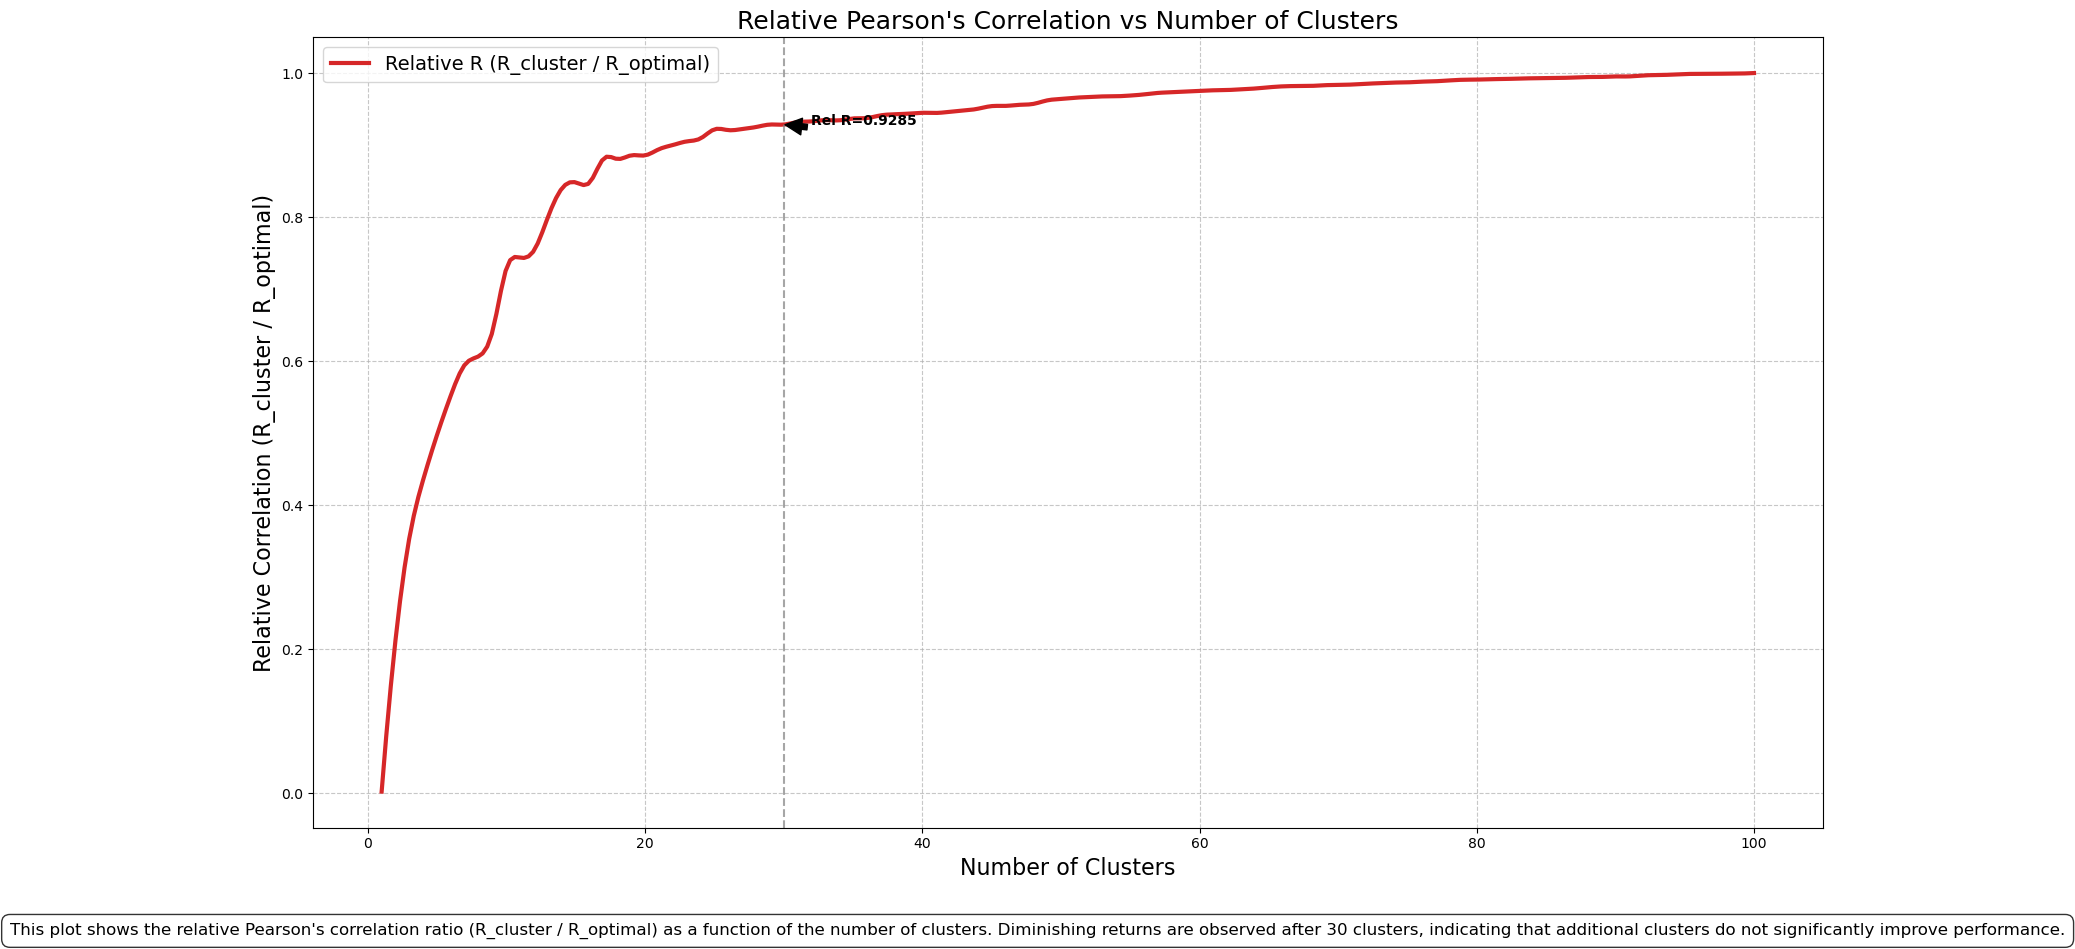

In [3]:
def plot_relative_correlation(metrics_history, figsize=(16, 10)):
    """
    This plot visualizes the relative Pearson’s correlation ratio (R_cluster / R_optimal) 
    as a function of the number of clusters. It demonstrates diminishing returns after 30 clusters, 
    where higher numbers of clusters did not result in substantial performance gains to justify the decrease in practicality.
    
    Parameters:
        metrics_history: Dictionary with metrics at each cluster number.
         Keys are the cluster counts and values are dictionaries that include at least the key "correlation".
        figsize: Size of the figure.
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.interpolate import make_interp_spline

    # Extract correlation values and cluster numbers
    cluster_numbers = sorted(metrics_history.keys())
    correlations = np.array([metrics_history[n]["correlation"] for n in cluster_numbers])
    
    # Compute optimal correlation and relative ratios (R_cluster / R_optimal)
    optimal_corr = correlations.max()
    relative_ratios = correlations / optimal_corr

    # Smoothing: Use cubic spline interpolation for the relative ratios
    x = np.array(cluster_numbers)
    x_smooth = np.linspace(x.min(), x.max(), 300)
    spline = make_interp_spline(x, relative_ratios, k=3)
    relative_smooth = spline(x_smooth)

    # Create the figure
    fig, ax = plt.subplots(figsize=figsize)

    # Plot the smooth line for the relative ratio
    color = 'tab:red'
    ax.plot(x_smooth, relative_smooth, '-', color=color, linewidth=3, label='Relative R (R_cluster / R_optimal)')
    
    # Add a vertical line at 30 clusters to indicate diminishing returns
    if x.min() <= 30 <= x.max():
        ax.axvline(x=30, color='gray', linestyle='--', alpha=0.7)
        idx = np.argmin(np.abs(x - 30))
        ratio30 = relative_ratios[idx]
        ax.annotate(f'Rel R={ratio30:.4f}', xy=(30, ratio30), xytext=(32, ratio30),
                    textcoords='data', color='black', fontweight='bold',
                    arrowprops=dict(facecolor='black', shrink=0.05))
    
    # Set labels and title
    ax.set_xlabel('Number of Clusters', fontsize=16)
    ax.set_ylabel('Relative Correlation (R_cluster / R_optimal)', fontsize=16)
    ax.set_title("Relative Pearson's Correlation vs Number of Clusters", fontsize=18)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(fontsize=14)
    
    # Explanatory text at the bottom of the figure
    plt.figtext(0.5, 0.01, 
                "This plot shows the relative Pearson's correlation ratio (R_cluster / R_optimal) as a function of the number of clusters. "
                "Diminishing returns are observed after 30 clusters, indicating that additional clusters do not significantly improve performance.",
                ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    return fig
    plt.show()
# Usage example:
if 'metrics_history' in globals():
    fig = plot_relative_correlation(metrics_history=metrics_history, figsize=(16, 10))
    plt.show()
    # Optionally save the figure
    # fig.savefig('relative_correlation_vs_clusters.png', dpi=300, bbox_inches='tight')



===== PART E: Visualizing Cluster Compositions =====

Generating Semi-Supervised K=30 Cluster Distribution...


Generating Unsupervised K=30 Cluster Distribution...
K=30 cluster visualizations complete!


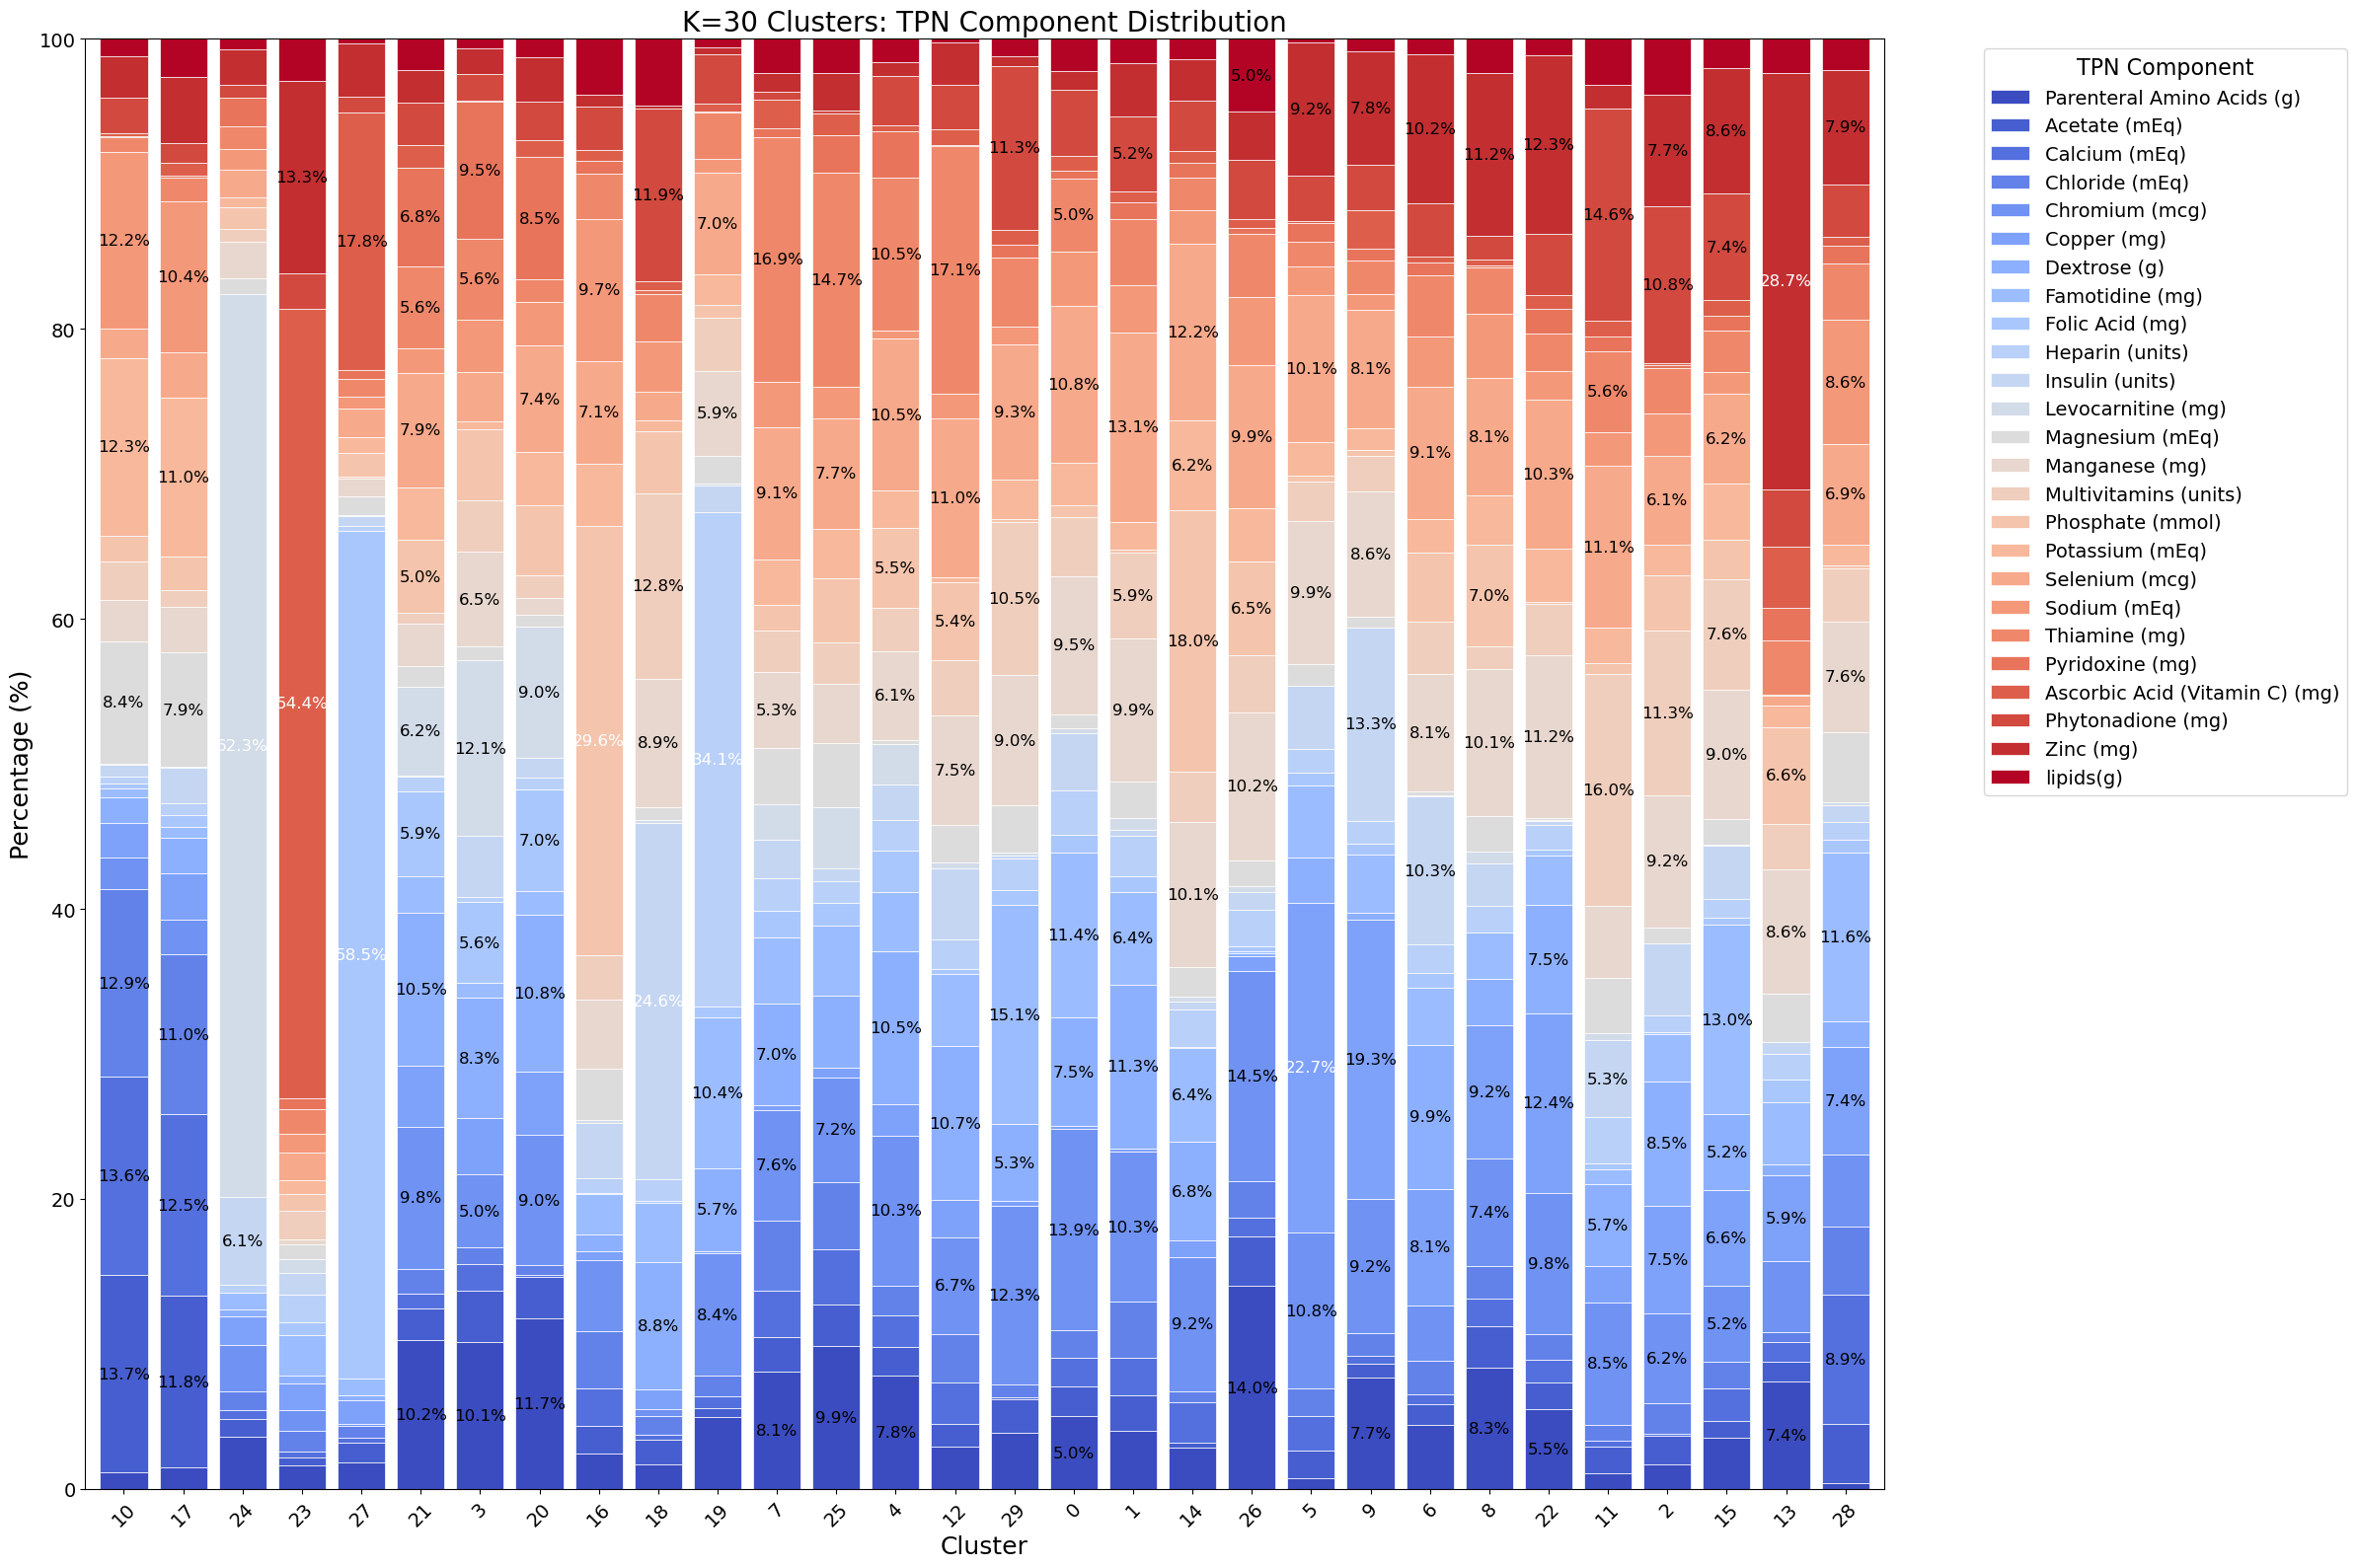

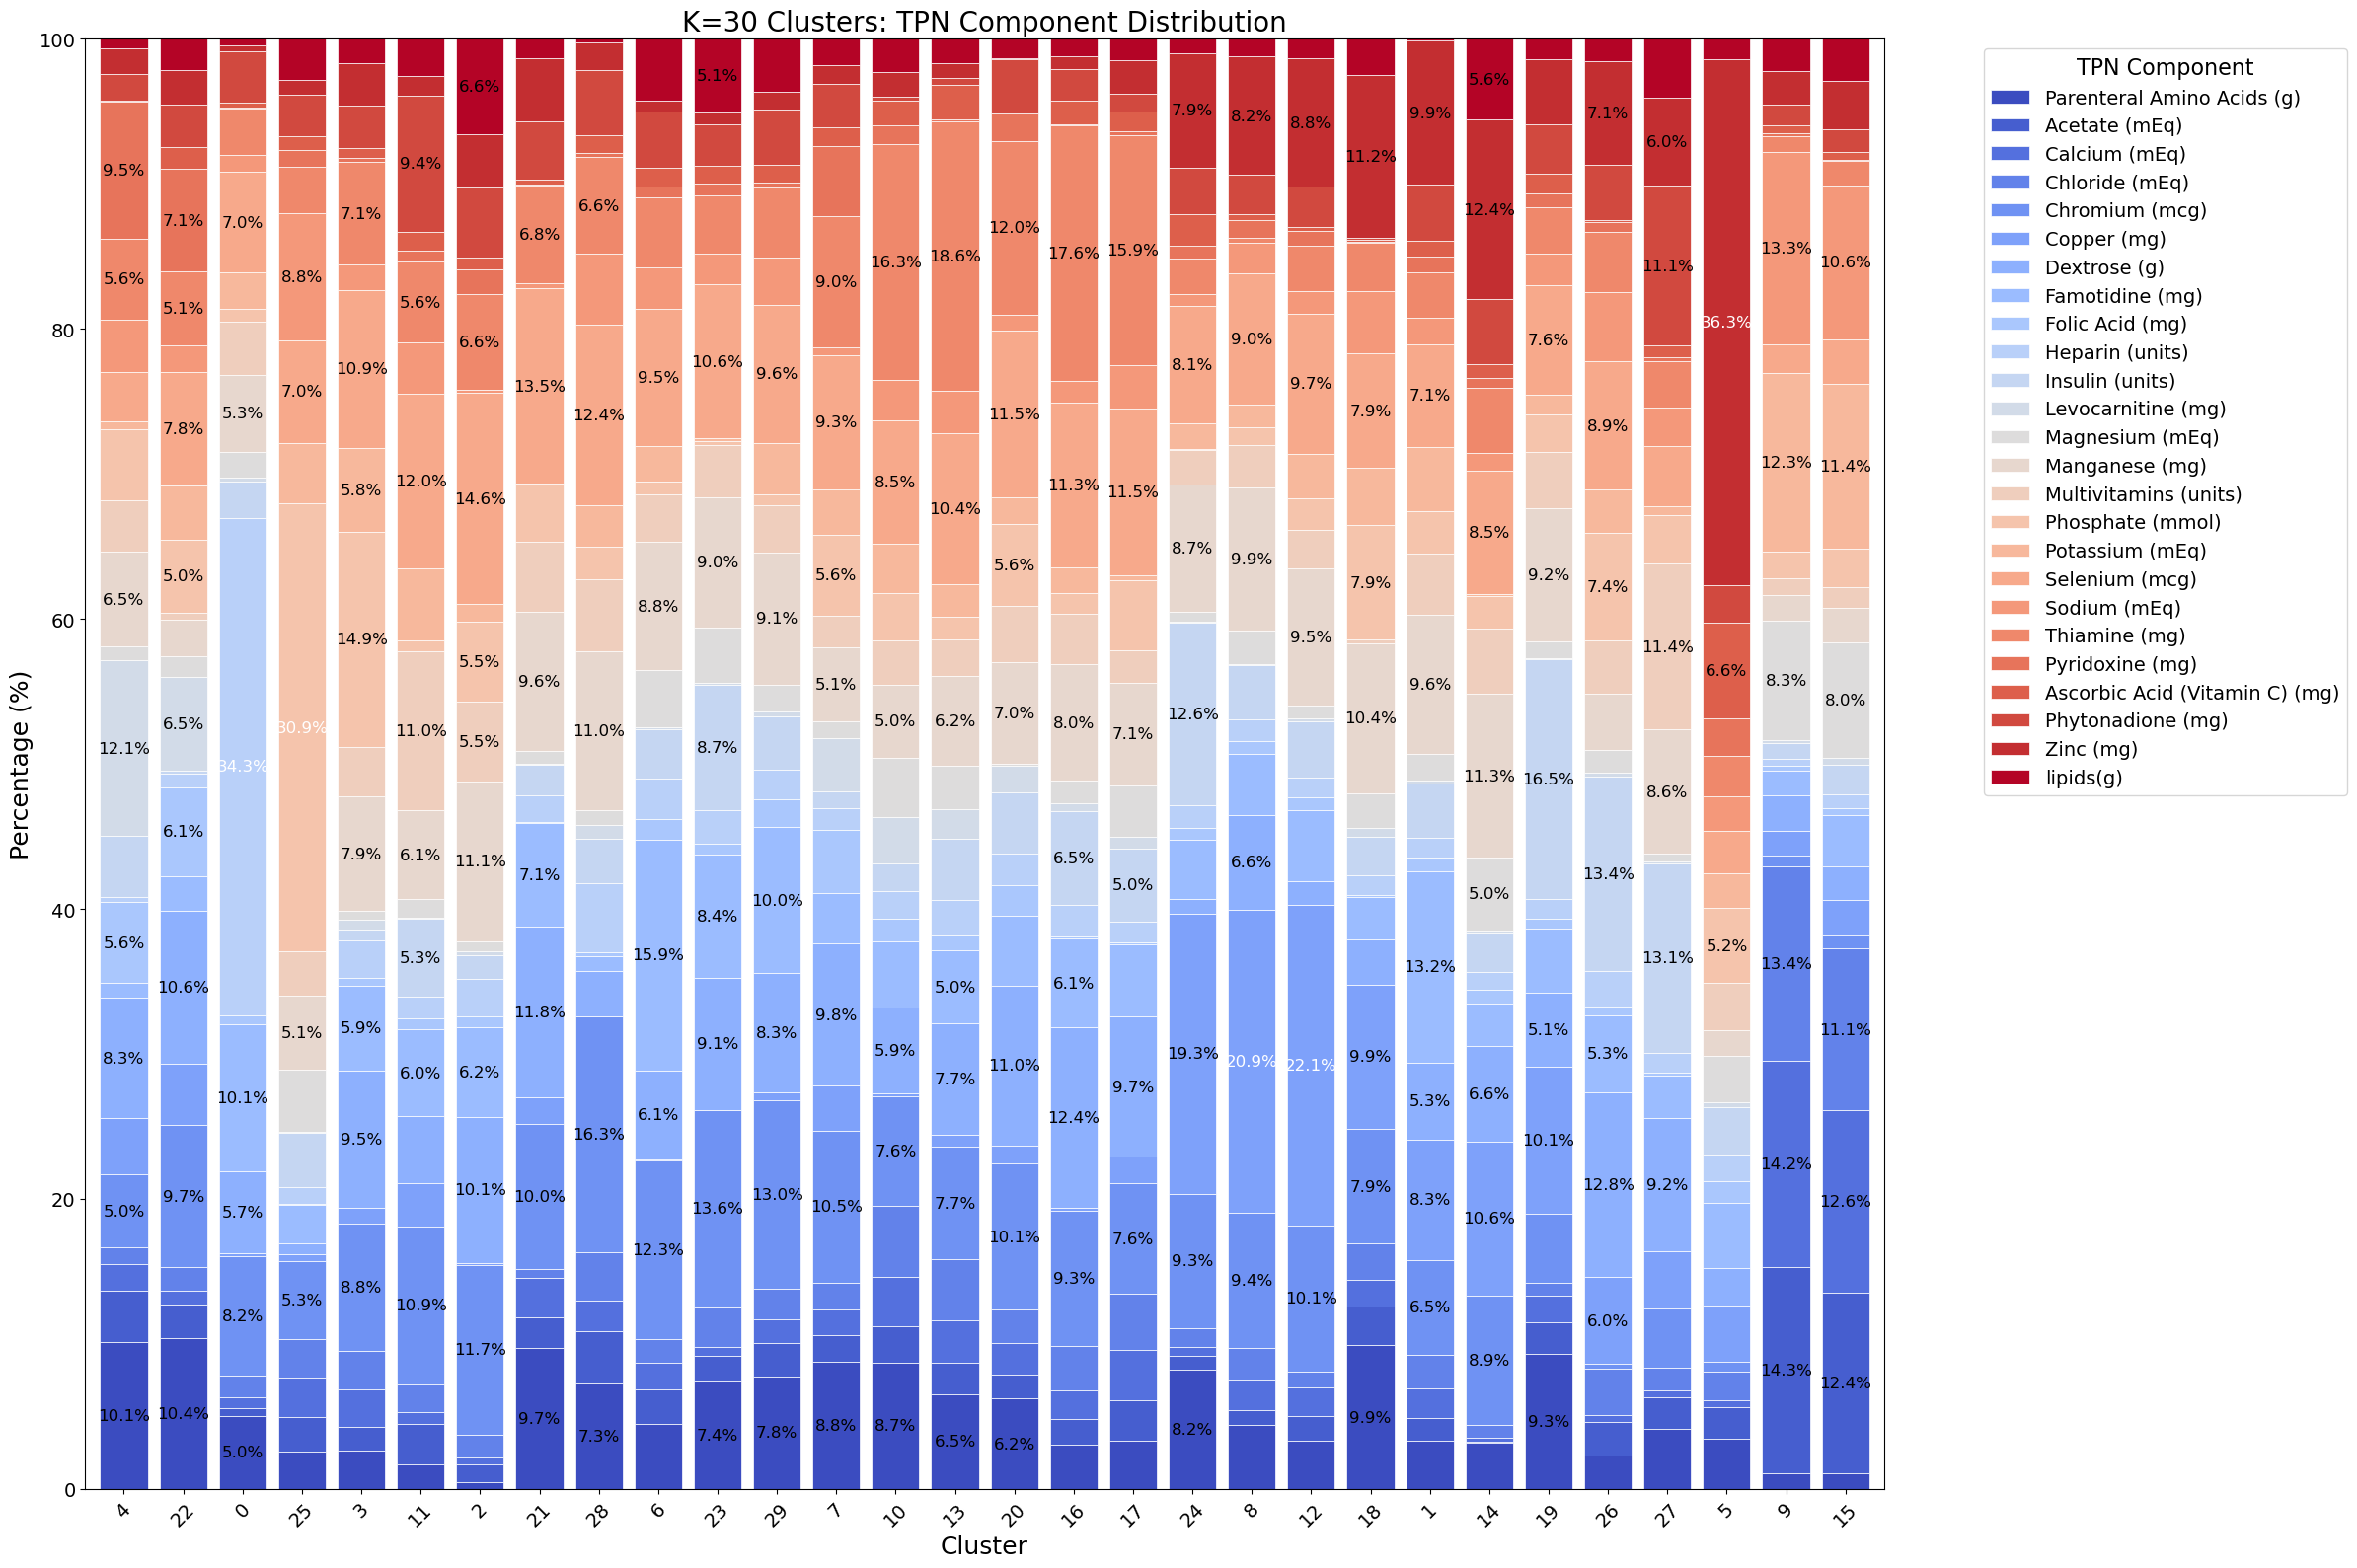

In [4]:
def plot_k30_clusters(centers_dict, decoder, target_names, num_clusters=30):
    """Create stacked bar plot for K=30 clusters, ensuring Lipids(g) is shown"""
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    
    # Decode cluster centers
    decoded_centers = {}
    
    # Adjust how centers are accessed
    if isinstance(centers_dict, dict):
        # If centers_dict is a dictionary
        for cluster, centroid in centers_dict.items():
            latent_vector = np.array(centroid).reshape(1, -1)
            with global_decoder_lock:  # Add lock for thread safety
                decoded = decoder.predict(latent_vector, verbose=0)
            decoded_centers[cluster] = decoded.squeeze()
    elif isinstance(centers_dict, np.ndarray):
        # If centers_dict is a numpy array (from KMeans model)
        for i, centroid in enumerate(centers_dict):
            latent_vector = centroid.reshape(1, -1)
            with global_decoder_lock:  # Add lock for thread safety
                decoded = decoder.predict(latent_vector, verbose=0)
            decoded_centers[i] = decoded.squeeze()
    else:
        raise ValueError(f"Unexpected type for centers_dict: {type(centers_dict)}")
    
    # Convert to DataFrame
    clusters = []
    data = []
    for cluster, centroid in decoded_centers.items():
        clusters.append(cluster)
        data.append(centroid)
    
    df_centers = pd.DataFrame(data, index=clusters, columns=target_names)
    df_centers = df_centers.abs()  # Ensure all values are positive
    
    # Convert to percentages
    df_pct = df_centers.div(df_centers.sum(axis=1), axis=0) * 100
    
    # Sort clusters if there are more than 1
    if len(df_pct) > 1:
        try:
            from scipy.cluster.hierarchy import linkage, dendrogram
            corr = df_pct.T.corr()
            Z = linkage(corr, 'average')
            dendro = dendrogram(Z, no_plot=True)
            sorted_idx = dendro['leaves']
            df_pct = df_pct.iloc[sorted_idx]
        except Exception as e:
            print(f"Warning: Could not sort clusters. Error: {e}")
    
    # Limit number of clusters to display if needed
    if num_clusters < len(df_pct):
        indices = np.linspace(0, len(df_pct) - 1, num_clusters, dtype=int)
        df_pct = df_pct.iloc[indices]
    
    # Create figure with increased size
    fig, ax = plt.subplots(figsize=(24, 16))
    
    # Use cool-warm diverging palette (Option 2)
    colors = plt.cm.coolwarm(np.linspace(0, 1, len(target_names)))
    
    # Create stacked bar plot
    df_pct.plot(kind='bar', stacked=True, ax=ax, color=colors, width=0.8,
               edgecolor='white', linewidth=0.5)
    
    # Force y-axis from 0 to 100
    ax.set_ylim(0, 100)
    
    # Customize plot
    ax.set_title('K=30 Clusters: TPN Component Distribution', fontsize=20)
    ax.set_xlabel('Cluster', fontsize=18)
    ax.set_ylabel('Percentage (%)', fontsize=18)
    ax.tick_params(axis='x', labelrotation=45, labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    
    # Get legend handles and labels
    handles, labels = ax.get_legend_handles_labels()
    
    # Create legend
    ax.legend(handles, labels, title='TPN Component', 
              bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14,
              title_fontsize=16)
    
    # Add percentage labels for segments above threshold
    threshold = 5.0  # Only label segments >= 5%
    for i, cluster in enumerate(df_pct.index):
        y_offset = 0
        for component in df_pct.columns:
            height = df_pct.loc[cluster, component]
            if height >= threshold:
                ax.text(i, y_offset + height/2, f'{height:.1f}%',
                       ha='center', va='center',
                       color='white' if height > 20 else 'black',
                       fontsize=12,
                       fontweight='normal')
            y_offset += height
    
    plt.tight_layout()
    return fig

# Add this after your comparison code
print("\n===== PART E: Visualizing Cluster Compositions =====\n")

# For semi-supervised approach
if 30 in ped_km_clustering:
    # Get the K=30 model
    semi_k30_model = ped_km_clustering[30]
    
    # Plot semi-supervised clusters
    print("Generating Semi-Supervised K=30 Cluster Distribution...")
    fig_semi_k30 = plot_k30_clusters(
        centers_dict=semi_k30_model.cluster_centers_,
        decoder=decoder_global,
        target_names=available_targets,
        num_clusters=30
    )
    
    # Plot unsupervised clusters
   
    # Create standard K-means with K=30
    kmeans_standard_k30 = KMeans(n_clusters=30, random_state=42, n_init=50)
    kmeans_standard_k30.fit(latent_train)
    
    fig_unsup_k30 = plot_k30_clusters(
        centers_dict=kmeans_standard_k30.cluster_centers_,
        decoder=decoder_global,
        target_names=available_targets,
        num_clusters=30
    )
    print("Generating Unsupervised K=30 Cluster Distribution...")
    print("K=30 cluster visualizations complete!")
else:
    print("[Warning] No model with K=30 found. Visualization skipped.")

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import time

def visualize_k35_clustering(X_data, encoder_model, meta_train, 
                            k=30, perplexity=30, n_iter=1000, 
                            max_samples=None):
    """
    Create a visualization of the k=35 clustering with the original color scheme.
    
    Args:
        X_data: Input data matrix
        encoder_model: Trained encoder model
        meta_train: DataFrame with metadata
        k: Number of clusters (default: 35)
        perplexity: t-SNE perplexity parameter
        n_iter: Number of t-SNE iterations
        max_samples: Maximum samples for t-SNE
    """
    # 1. Extract latent representations
    print("Extracting latent representations...")
    latent_matrix = encoder_model.predict(X_data)
    print(f"Created latent matrix with shape: {latent_matrix.shape}")
    
    # 2. Run k-means with k=35
    print(f"Running KMeans with k={k}...")
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_assignments = kmeans.fit_predict(latent_matrix)
    
    # 3. Apply t-SNE for visualization
    if max_samples is not None and len(latent_matrix) > max_samples:
        print(f"Subsampling {max_samples} points from {latent_matrix.shape[0]} total points")
        indices = np.random.choice(len(latent_matrix), max_samples, replace=False)
        latent_subset = latent_matrix[indices]
    else:
        indices = np.arange(latent_matrix.shape[0])
        latent_subset = latent_matrix
    
    print(f"Applying t-SNE with perplexity={perplexity}, n_iter={n_iter}...")
    start_time = time.time()
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter, random_state=42)
    tsne_results = tsne.fit_transform(latent_subset)
    print(f"t-SNE completed in {time.time() - start_time:.2f} seconds")
    
    # 4. Prepare the cluster assignments for the visualized points
    if len(indices) < len(cluster_assignments):
        plot_assignments = cluster_assignments[indices]
    else:
        plot_assignments = cluster_assignments
    
    # 5. Create the visualization
    plt.figure(figsize=(16, 14))
    
    # Use the original coolwarm colormap
    colors = plt.cm.coolwarm(np.linspace(0, 1, k))
    
    # Plot each cluster with the original style
    for cluster in range(k):
        mask = plot_assignments == cluster
        plt.scatter(
            tsne_results[mask, 0], 
            tsne_results[mask, 1],
            s=30,  # Size of dots
            c=[colors[cluster]],  # Color from coolwarm palette
            label=f'Cluster {cluster}' if cluster < 5 else "",  # Only show first 5 in legend
            alpha=0.5,  # Semi-transparent
            edgecolors='none'
        )
    
    # Calculate and plot cluster centers
    centers = []
    for cluster in range(k):
        mask = plot_assignments == cluster
        if np.sum(mask) > 0:  # Only calculate if there are points in this cluster
            center_x = np.mean(tsne_results[mask, 0])
            center_y = np.mean(tsne_results[mask, 1])
            centers.append((center_x, center_y, cluster))
    
    for center_x, center_y, cluster in centers:
        plt.scatter(
            center_x, center_y,
            s=100,  # Size of cluster centers
            c=[colors[cluster]],
            marker='o',
            edgecolors='black',
            linewidth=1,
            alpha=1.0
        )
        plt.text(
            center_x, center_y,
            str(cluster),
            fontsize=10,
            ha='center',
            va='center',
            color='white',
            weight='bold'
        )
    
    # Add plot details
    plt.title(f't-SNE Visualization of TPN Latent Space (k={k})', fontsize=18)
    plt.xlabel('t-SNE Dimension 1', fontsize=14)
    plt.ylabel('t-SNE Dimension 2', fontsize=14)
    
    # Add a legend for a few example clusters
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(
        handles[:5],  # Only show first 5 clusters in legend
        labels[:5],
        title='Example Clusters',
        title_fontsize=12,
        loc='best',
        fontsize=10
    )
    
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    return tsne_results, plot_assignments, kmeans

def run_k35_visualization():
    k = 30
    print(f"Creating visualization for k={k} clustering...")
    
    results = visualize_k35_clustering(
        X_train, 
        encoder, 
        meta_train, 
        k=k,
        perplexity=30,
        n_iter=1000,
        max_samples=50000
    )
    
    print("Visualization complete!")
    return results

# Run the k=35 visualization
if __name__ == "__main__":
    tsne_results, plot_assignments, kmeans = run_k35_visualization()

Creating visualization for k=30 clustering...
Extracting latent representations...
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Created latent matrix with shape: (21956, 16)
Running KMeans with k=30...


/home/ariss01/miniconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input X contains infinity or a value too large for dtype('float32').

Starting cluster transition analysis...
Python version: 3.12.2 | packaged by conda-forge | (main, Feb 16 2024, 20:50:58) [GCC 12.3.0]
Current working directory: /remote/home/ariss01/TPN
Matplotlib backend: module://matplotlib_inline.backend_inline
Finding and tracking a patient that switched clusters from k=100 to k=30...
Starting visualization function...
Extracting latent representations...
146/687 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step

687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 754us/step
Created latent matrix with shape: (21956, 16)
Running KMeans with k=100...
Running KMeans with k=30...
Finding patients who switched clusters...
Found 21700 patients that switched clusters
Selected patient 3637678 who moved from cluster 63 (k=100) to cluster 9 (k=30)
Preparing data for t-SNE...
Subsampling 20000 points for visualization
Patient index in subset: 0
Patient's clusters in visualized data: source=63, target=9
Applying t-SNE with perplexity=100, max_iter=1000...
t-SNE completed in 41.60 seconds
Creating visualization...
Displaying figure...


<Figure size 2000x900 with 0 Axes>

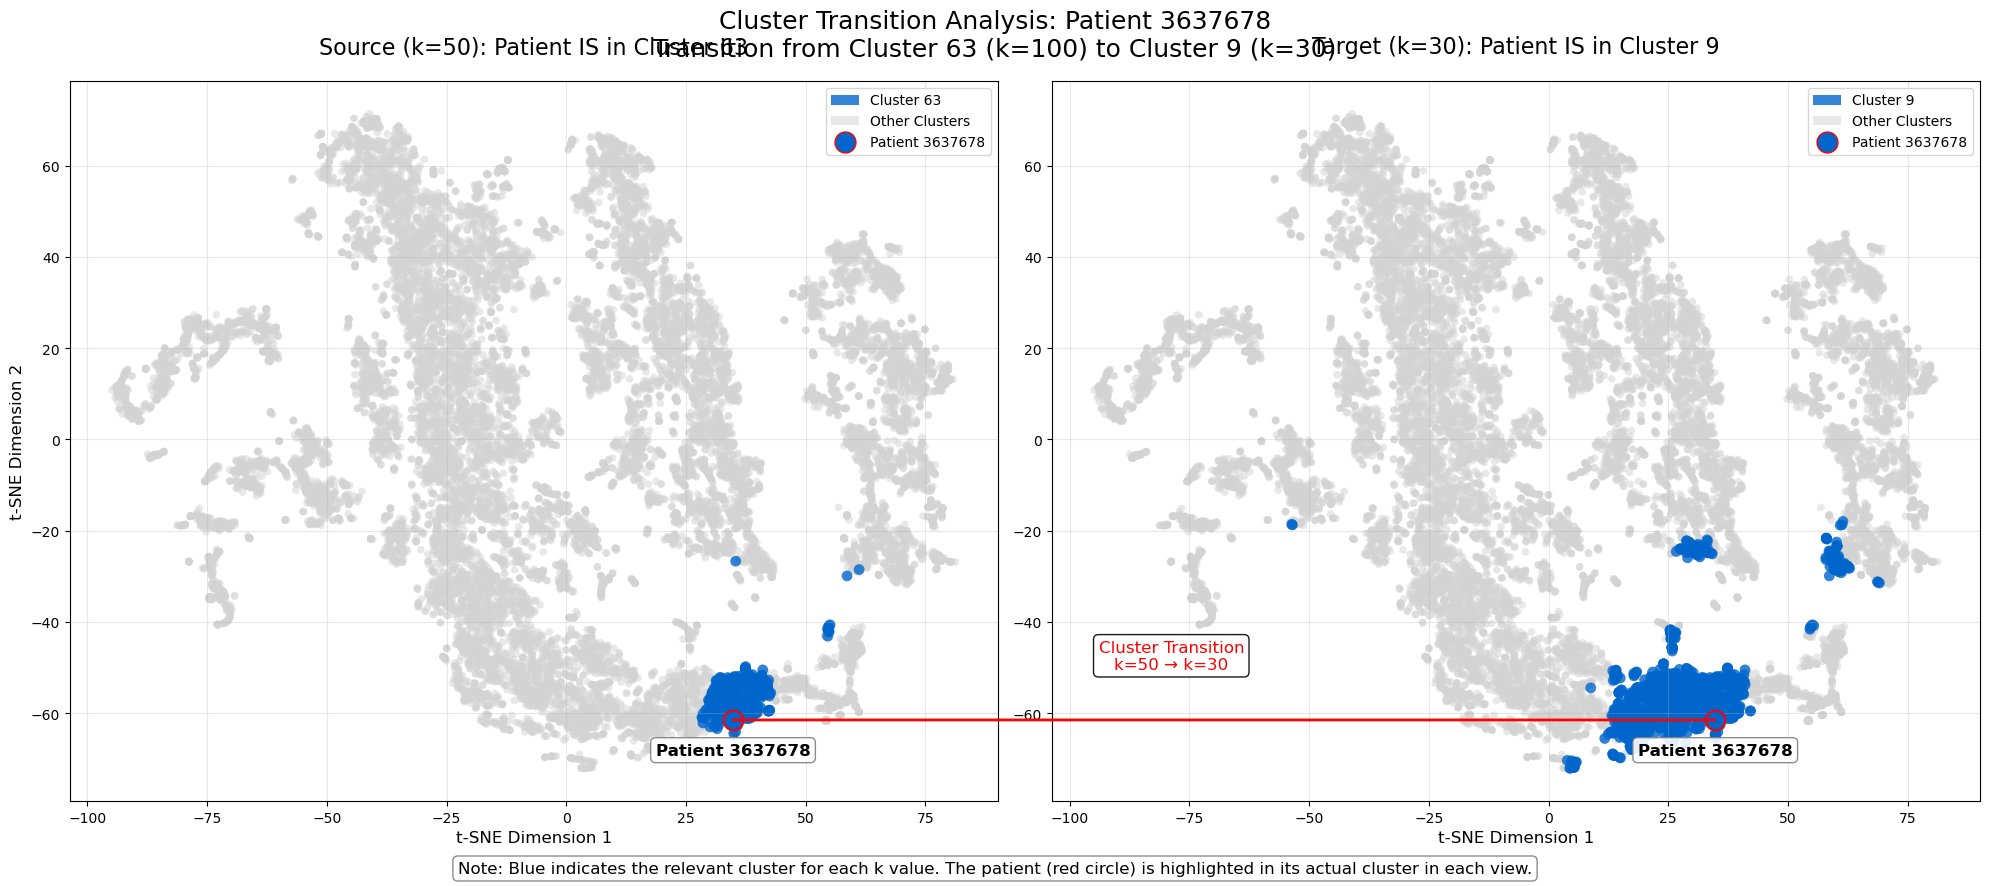

Patient cluster tracking complete!
Results: {'patient_id': 3637678, 'source_k': 100, 'target_k': 30, 'source_cluster': 63, 'target_cluster': 9}
Analysis complete!


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from matplotlib.patches import Patch, ConnectionPatch
import time
import matplotlib as mpl
import os
import sys

def track_patient_cluster_transition_simplified(X_data, encoder_model, meta_train, 
                                               source_k=50, target_k=30, 
                                               perplexity=30, n_iter=1000, 
                                               max_samples=None):
    """
    Create a simplified visualization of patient cluster transitions.
    
    Args:
        X_data: Input data matrix
        encoder_model: Trained encoder model
        meta_train: DataFrame with metadata
        source_k: Initial k value (default: 50)
        target_k: Target k value (default: 30)
        perplexity: t-SNE perplexity parameter
        n_iter: Number of t-SNE iterations
        max_samples: Maximum samples for t-SNE
    """
    try:
        print("Starting visualization function...")
        
        # Use default fonts to avoid font errors
        plt.rcParams.update(plt.rcParamsDefault)
        
        # 1. Extract latent representations
        print("Extracting latent representations...")
        latent_matrix = encoder_model.predict(X_data)
        print(f"Created latent matrix with shape: {latent_matrix.shape}")
        
        # 2. Run k-means with the source k value (e.g., k=50)
        print(f"Running KMeans with k={source_k}...")
        kmeans_source = KMeans(n_clusters=source_k, random_state=42, n_init=50)
        source_assignments = kmeans_source.fit_predict(latent_matrix)
        
        # 3. Run k-means with the target k value (e.g., k=30)
        print(f"Running KMeans with k={target_k}...")
        kmeans_target = KMeans(n_clusters=target_k, random_state=42, n_init=50)
        target_assignments = kmeans_target.fit_predict(latent_matrix)
        
        # 4. Find patients who switched clusters
        print("Finding patients who switched clusters...")
        patient_data = []
        for i, person_id in enumerate(meta_train['person_id']):
            source_cluster = source_assignments[i]
            target_cluster = target_assignments[i]
            patient_data.append((person_id, source_cluster, target_cluster))
        
        # Create a DataFrame for easier analysis
        patient_df = pd.DataFrame(patient_data, columns=['person_id', f'cluster_k{source_k}', f'cluster_k{target_k}'])
        
        # Find patients that switched clusters
        switched_patients = patient_df[patient_df[f'cluster_k{source_k}'] != patient_df[f'cluster_k{target_k}']]
        print(f"Found {len(switched_patients)} patients that switched clusters")
        
        if len(switched_patients) == 0:
            print("No patients switched clusters!")
            return None
        
        # 5. Select a random patient that switched clusters
        selected_row = switched_patients.sample(n=1).iloc[0]
        patient_id = selected_row['person_id']
        source_cluster = selected_row[f'cluster_k{source_k}']
        target_cluster = selected_row[f'cluster_k{target_k}']
        
        print(f"Selected patient {patient_id} who moved from cluster {source_cluster} (k={source_k}) to cluster {target_cluster} (k={target_k})")
        
        # 6. Find the index of this patient in the data
        patient_indices = np.where(meta_train['person_id'] == patient_id)[0]
        if len(patient_indices) == 0:
            print(f"Patient with ID {patient_id} not found in meta_train!")
            return None
        
        # Use first occurrence of the patient
        patient_index = patient_indices[0]
        
        # 7. Prepare for a single t-SNE visualization
        print("Preparing data for t-SNE...")
        if max_samples is not None and len(latent_matrix) > max_samples:
            print(f"Subsampling {max_samples} points for visualization")
            
            # Create indices with the patient of interest
            indices = [patient_index]
            
            # Get source and target cluster indices
            source_cluster_indices = np.where(source_assignments == source_cluster)[0]
            target_cluster_indices = np.where(target_assignments == target_cluster)[0]
            
            # Combine and deduplicate
            cluster_indices = list(set(np.concatenate([source_cluster_indices, target_cluster_indices])))
            
            # Remove patient index to avoid duplication
            if patient_index in cluster_indices:
                cluster_indices.remove(patient_index)
                
            # Sample from these clusters
            max_cluster_samples = min(len(cluster_indices), max_samples // 2)
            if max_cluster_samples < len(cluster_indices):
                cluster_sample = np.random.choice(cluster_indices, max_cluster_samples, replace=False)
                indices.extend(cluster_sample)
            else:
                indices.extend(cluster_indices)
                
            # Fill the rest with random samples
            remaining_indices = list(set(range(len(latent_matrix))) - set(indices))
            remaining_sample_size = min(max_samples - len(indices), len(remaining_indices))
            
            if remaining_sample_size > 0:
                remaining_sample = np.random.choice(remaining_indices, remaining_sample_size, replace=False)
                indices.extend(remaining_sample)
        else:
            indices = np.arange(len(latent_matrix))
        
        # 8. Extract the subset for t-SNE
        latent_subset = latent_matrix[indices]
        
        # Get the corresponding cluster assignments for the subset
        source_subset_assignments = source_assignments[indices]
        target_subset_assignments = target_assignments[indices]
        
        # 9. Find patient's position in the subset
        subset_patient_index = np.where(np.array(indices) == patient_index)[0][0]
        print(f"Patient index in subset: {subset_patient_index}")
        
        # Get the patient's actual clusters in the subsampled data
        patient_source_cluster = source_subset_assignments[subset_patient_index]
        patient_target_cluster = target_subset_assignments[subset_patient_index]
        
        print(f"Patient's clusters in visualized data: source={patient_source_cluster}, target={patient_target_cluster}")
        
        # 10. Perform t-SNE on the subset (only once)
        print(f"Applying t-SNE with perplexity={perplexity}, max_iter={n_iter}...")
        start_time = time.time()
        tsne = TSNE(n_components=2, perplexity=perplexity, max_iter=n_iter, random_state=42)
        tsne_results = tsne.fit_transform(latent_subset)
        print(f"t-SNE completed in {time.time() - start_time:.2f} seconds")
        
        # 11. Create a figure with side-by-side plots
        print("Creating visualization...")
        plt.figure(figsize=(20, 9), dpi=100)
        fig, axes = plt.subplots(1, 2, figsize=(20, 9), dpi=100)
        
        # 12. Plot each view (source k and target k)
        for i, (ax, k, cluster_assignments, highlight_cluster) in enumerate(zip(
                axes, 
                [source_k, target_k], 
                [source_subset_assignments, target_subset_assignments],
                [patient_source_cluster, patient_target_cluster]  # Use the actual patient clusters in visualized data
            )):
            
            # Set up plot
            ax.set_facecolor('white')
            ax.grid(True, alpha=0.3)
            
            # Plot non-highlighted clusters first (gray points)
            for cluster in np.unique(cluster_assignments):
                if cluster != highlight_cluster:
                    mask = cluster_assignments == cluster
                    ax.scatter(
                        tsne_results[mask, 0],
                        tsne_results[mask, 1],
                        s=30,
                        c='lightgray',
                        alpha=0.5,
                        edgecolors='none'
                    )
            
            # Plot highlighted cluster with more emphasis (blue points)
            mask = cluster_assignments == highlight_cluster
            ax.scatter(
                tsne_results[mask, 0],
                tsne_results[mask, 1],
                s=60,
                c='#0066cc',  # Deeper blue
                alpha=0.8,
                edgecolors='none',
                label=f'Cluster {highlight_cluster}'
            )
            
            # Get patient position
            patient_x, patient_y = tsne_results[subset_patient_index]
            patient_cluster = cluster_assignments[subset_patient_index]
            
            # Use blue color for patient since it's in the highlighted cluster
            patient_color = '#0066cc'
            
            # Add a large marker for the patient - on top of cluster points
            ax.scatter(
                patient_x, patient_y,
                s=200,
                facecolor=patient_color,
                edgecolors='red',
                marker='o',
                linewidth=1.5,
                zorder=100,
                label=f'Patient {patient_id}'
            )
            
            # Add a label for the patient without yellow background
            ax.annotate(
                f"Patient {patient_id}",
                (patient_x, patient_y),
                xytext=(0, -25),
                textcoords='offset points',
                fontsize=12,
                fontweight='bold',
                color='black',
                ha='center',
                bbox=dict(facecolor='white', alpha=0.9, boxstyle='round,pad=0.3', edgecolor='gray'),
                zorder=101
            )
            
            # Update title to always show patient IS in the highlighted cluster
            label_k = "Source (k=50)" if i == 0 else "Target (k=30)"
            ax.set_title(f'{label_k}: Patient IS in Cluster {highlight_cluster}', fontsize=16, pad=20)
            
            # Add legend
            legend_elements = [
                Patch(facecolor='#0066cc', alpha=0.8, label=f'Cluster {highlight_cluster}'),
                Patch(facecolor='lightgray', alpha=0.5, label='Other Clusters'),
                plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=patient_color, 
                          markeredgecolor='red', markersize=15, label=f'Patient {patient_id}')
            ]
            ax.legend(handles=legend_elements, loc='upper right')
            
            # Set labels
            ax.set_xlabel('t-SNE Dimension 1', fontsize=12)
            if i == 0:
                ax.set_ylabel('t-SNE Dimension 2', fontsize=12)
        
        # 13. Add connection between the two views with a simple line
        con = ConnectionPatch(
            xyA=(tsne_results[subset_patient_index, 0], tsne_results[subset_patient_index, 1]),
            xyB=(tsne_results[subset_patient_index, 0], tsne_results[subset_patient_index, 1]),
            coordsA="data", coordsB="data",
            axesA=axes[0], axesB=axes[1],
            color='red',
            linewidth=2,
            linestyle='-',  # Simple line, not an arrow
            zorder=90
        )
        fig.add_artist(con)
        
        # Add a simple transition label
        midpoint_x = (fig.transFigure.inverted().transform(axes[0].transData.transform((patient_x, patient_y)))[0] + 
                     fig.transFigure.inverted().transform(axes[1].transData.transform((patient_x, patient_y)))[0]) / 2
        midpoint_y = fig.transFigure.inverted().transform(axes[0].transData.transform((patient_x, patient_y)))[1]
        
        plt.figtext(
            midpoint_x, midpoint_y + 0.05,
            "Cluster Transition\nk=50 → k=30",
            ha='center',
            fontsize=12,
            color='red',
            bbox=dict(facecolor='white', alpha=0.9, boxstyle='round'),
            zorder=101
        )
        
        # 14. Add overall title
        plt.suptitle(
            f'Cluster Transition Analysis: Patient {patient_id}\n' +
            f'Transition from Cluster {patient_source_cluster} (k={source_k}) to Cluster {patient_target_cluster} (k={target_k})',
            fontsize=18, 
            y=0.98
        )
        
        # 15. Add explanation note
        plt.figtext(
            0.5, 0.02,
            f"Note: Blue indicates the relevant cluster for each k value. The patient (red circle) is highlighted in its actual cluster in each view.",
            ha='center', 
            fontsize=12, 
            bbox=dict(facecolor='white', alpha=0.9, boxstyle='round,pad=0.3', edgecolor='gray')
        )
        
        # Apply tight layout
        plt.tight_layout()
        plt.subplots_adjust(top=0.9, bottom=0.1)
        
        # Display the figure
        print("Displaying figure...")
        plt.show()
        
        return {
            'patient_id': patient_id,
            'source_k': source_k,
            'target_k': target_k,
            'source_cluster': patient_source_cluster,  # Use the actual visualized clusters
            'target_cluster': patient_target_cluster   # Use the actual visualized clusters
        }
        
    except Exception as e:
        print(f"Error in visualization function: {str(e)}")
        import traceback
        traceback.print_exc()
        return None

def run_simplified_cluster_tracking():
    try:
        source_k = 100
        target_k = 30
        
        print(f"Finding and tracking a patient that switched clusters from k={source_k} to k={target_k}...")
        
        patient_data = track_patient_cluster_transition_simplified(
            X_train, 
            encoder, 
            meta_train, 
            source_k=source_k,
            target_k=target_k,
            perplexity=100,
            n_iter=1000,
            max_samples=20000
        )
        
        if patient_data:
            print("Patient cluster tracking complete!")
            print(f"Results: {patient_data}")
        else:
            print("Failed to find a suitable patient or generate visualization.")
        
        return patient_data
    
    except Exception as e:
        print(f"Error in tracking function: {str(e)}")
        import traceback
        traceback.print_exc()
        return None

# Run the simplified cluster tracking
if __name__ == "__main__":
    print("Starting cluster transition analysis...")
    print(f"Python version: {sys.version}")
    print(f"Current working directory: {os.getcwd()}")
    print(f"Matplotlib backend: {plt.get_backend()}")
    patient_data = run_simplified_cluster_tracking()
    print("Analysis complete!")